# Import Libraries

In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


2022-12-04 16:24:09.689063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Plot Param Initialization

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    #


# Original Data By Stratified Sampling

In [3]:
org_train_frame_x = pd.read_csv('data/original/original_x_train.csv')
org_train_frame_y = pd.read_csv('data/original/original_y_train.csv')
org_test_frame_x = pd.read_csv('data/original/original_x_test.csv')
org_test_frame_y = pd.read_csv('data/original/original_y_test.csv')

# Auxilary Custom Functions

In [4]:
"""
input: tr_x,tr_y,te_x,te_y
tr_x = Training frame 
tr_y = Training Labels
te_x = Testing frame
te_y = Testing Labels
output: train_x,train_y,test_x,test_y 
train_x = Numpy Array of training data,
train_y = Numpy Array of training labels 
test_x = Numpy Array of testing data
test_y = Numpy Array of testing labels
"""
def data_fram_to_array(tr_x,tr_y,te_x,te_y):
    train_x = np.array(tr_x)
    train_y = np.array(tr_y)

    test_x = np.array(te_x)
    test_y = np.array(te_y)
    return train_x,train_y,test_x,test_y 

In [5]:
org_train_x,org_train_y,org_test_x,org_test_y = data_fram_to_array(org_train_frame_x,org_train_frame_y,
                                                                   org_test_frame_x,org_test_frame_y)

In [6]:
input_dim = len(org_train_frame_x.columns)

# Batch Size and Epoch Tuning 

In [7]:
def create_model():
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation='relu'))
    model.add(L.Dense(input_dim, activation='relu'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model
adam_model = KerasClassifier(create_model, verbose=1)

batches = [20,50,100,150]
epochs = [5,10,15,20]
# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=adam_model, 
                    param_grid=param_grid,refit = True, 
                    cv=3)
grid_result = grid.fit(org_train_x, org_train_y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_15527/2050020479.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model = KerasClassifier(create_model, verbose=1)
2022-12-04 16:24:16.825017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
237/237 [==============================] - 0s 619us/step - loss: 1.7793 - accuracy: 0.8735
Epoch 2/5
237/237 [==============================] - 0s 585us/step - loss: 0.1548 - accuracy: 0.9670
Epoch 3/5
237/237 [==============================] - 0s 580us/step - loss: 0.1390 - accuracy: 0.9689
Epoch 4/5
237/237 [==============================] - 0s 900us/step - loss: 0.1243 - accuracy: 0.9689
Epoch 5/5
119/119 [==============================] - 0s 608us/step - loss: 0.1449 - accuracy: 0.9738
Epoch 1/5
237/237 [==============================] - 0s 609us/step - loss: 6.9857 - accuracy: 0.7601
Epoch 2/5
237/237 [==============================] - 0s 589us/step - loss: 0.3861 - accuracy: 0.9111
Epoch 3/5
237/237 [==============================] - 0s 596us/step - loss: 0.2786 - accuracy: 0.9420
Epoch 4/5
237/237 [==============================] - 0s 603us/step - loss: 0.1676 - accuracy: 0.9600
Epoch 5/5
119/119 [==============================] - 0s 576us/step - loss: 0.1116 - accurac

119/119 [==============================] - 0s 556us/step - loss: 0.1002 - accuracy: 0.9543
Epoch 1/15
237/237 [==============================] - 0s 595us/step - loss: 3.0273 - accuracy: 0.8758
Epoch 2/15
237/237 [==============================] - 0s 555us/step - loss: 0.2822 - accuracy: 0.9403
Epoch 3/15
237/237 [==============================] - 0s 552us/step - loss: 0.1361 - accuracy: 0.9640
Epoch 4/15
237/237 [==============================] - 0s 550us/step - loss: 0.1387 - accuracy: 0.9619
Epoch 5/15
237/237 [==============================] - 0s 553us/step - loss: 0.1244 - accuracy: 0.9670
Epoch 6/15
237/237 [==============================] - 0s 546us/step - loss: 0.1097 - accuracy: 0.9710
Epoch 7/15
237/237 [==============================] - 0s 549us/step - loss: 0.1475 - accuracy: 0.9666
Epoch 8/15
237/237 [==============================] - 0s 552us/step - loss: 0.1346 - accuracy: 0.9666
Epoch 9/15
237/237 [==============================] - 0s 558us/step - loss: 0.0859 - accuracy

119/119 [==============================] - 0s 580us/step - loss: 0.0792 - accuracy: 0.9873
Epoch 1/5
95/95 [==============================] - 0s 656us/step - loss: 8.9713 - accuracy: 0.8055
Epoch 2/5
95/95 [==============================] - 0s 589us/step - loss: 1.1334 - accuracy: 0.8847
Epoch 3/5
95/95 [==============================] - 0s 587us/step - loss: 0.3995 - accuracy: 0.9420
Epoch 4/5
95/95 [==============================] - 0s 586us/step - loss: 0.2647 - accuracy: 0.9672
Epoch 5/5
48/48 [==============================] - 0s 628us/step - loss: 0.2182 - accuracy: 0.9738
Epoch 1/5
95/95 [==============================] - 0s 653us/step - loss: 1.7311 - accuracy: 0.8786
Epoch 2/5
95/95 [==============================] - 0s 574us/step - loss: 0.2632 - accuracy: 0.9253
Epoch 3/5
95/95 [==============================] - 0s 574us/step - loss: 0.1980 - accuracy: 0.9497
Epoch 4/5
95/95 [==============================] - 0s 577us/step - loss: 0.1645 - accuracy: 0.9594
Epoch 5/5
48/48 [=

48/48 [==============================] - 0s 623us/step - loss: 0.0882 - accuracy: 0.9742
Epoch 1/15
95/95 [==============================] - 0s 660us/step - loss: 17.8444 - accuracy: 0.7612
Epoch 2/15
95/95 [==============================] - 0s 559us/step - loss: 1.1068 - accuracy: 0.8293
Epoch 3/15
95/95 [==============================] - 0s 571us/step - loss: 0.6184 - accuracy: 0.8847
Epoch 4/15
95/95 [==============================] - 0s 636us/step - loss: 0.3660 - accuracy: 0.9215
Epoch 5/15
95/95 [==============================] - 0s 658us/step - loss: 0.2396 - accuracy: 0.9499
Epoch 6/15
95/95 [==============================] - 0s 672us/step - loss: 0.1927 - accuracy: 0.9600
Epoch 7/15
95/95 [==============================] - 0s 659us/step - loss: 0.1763 - accuracy: 0.9651
Epoch 8/15
95/95 [==============================] - 0s 574us/step - loss: 0.1511 - accuracy: 0.9689
Epoch 9/15
95/95 [==============================] - 0s 590us/step - loss: 0.1385 - accuracy: 0.9695
Epoch 10/1

48/48 [==============================] - 0s 639us/step - loss: 2.0635 - accuracy: 0.8275
Epoch 3/5
48/48 [==============================] - 0s 577us/step - loss: 0.7460 - accuracy: 0.8879
Epoch 4/5
48/48 [==============================] - 0s 544us/step - loss: 0.4159 - accuracy: 0.9162
Epoch 5/5
24/24 [==============================] - 0s 628us/step - loss: 0.2353 - accuracy: 0.9412
Epoch 1/5
48/48 [==============================] - 0s 676us/step - loss: 40.1114 - accuracy: 0.0448
Epoch 2/5
48/48 [==============================] - 0s 616us/step - loss: 3.6166 - accuracy: 0.7305
Epoch 3/5
48/48 [==============================] - 0s 571us/step - loss: 0.8700 - accuracy: 0.8898
Epoch 4/5
48/48 [==============================] - 0s 555us/step - loss: 0.4049 - accuracy: 0.9325
Epoch 5/5
24/24 [==============================] - 0s 598us/step - loss: 0.2963 - accuracy: 0.9691
Epoch 1/5
48/48 [==============================] - 0s 676us/step - loss: 17.5573 - accuracy: 0.2864
Epoch 2/5
48/48 [=

48/48 [==============================] - 0s 874us/step - loss: 57.7851 - accuracy: 0.4866
Epoch 2/15
48/48 [==============================] - 0s 856us/step - loss: 6.4418 - accuracy: 0.8250
Epoch 3/15
48/48 [==============================] - 0s 741us/step - loss: 4.0600 - accuracy: 0.8509
Epoch 4/15
48/48 [==============================] - 0s 760us/step - loss: 2.8028 - accuracy: 0.8887
Epoch 5/15
48/48 [==============================] - 0s 820us/step - loss: 1.8687 - accuracy: 0.9061
Epoch 6/15
48/48 [==============================] - 0s 730us/step - loss: 1.3163 - accuracy: 0.9224
Epoch 7/15
48/48 [==============================] - 0s 835us/step - loss: 0.8415 - accuracy: 0.9304
Epoch 8/15
48/48 [==============================] - 0s 856us/step - loss: 0.4740 - accuracy: 0.9450
Epoch 9/15
48/48 [==============================] - 0s 833us/step - loss: 0.2686 - accuracy: 0.9482
Epoch 10/15
48/48 [==============================] - 0s 906us/step - loss: 0.1527 - accuracy: 0.9657
Epoch 11/

32/32 [==============================] - 0s 667us/step - loss: 1.0619 - accuracy: 0.9099
Epoch 5/5
16/16 [==============================] - 0s 706us/step - loss: 0.7915 - accuracy: 0.8964
Epoch 1/5
32/32 [==============================] - 0s 701us/step - loss: 9.4353 - accuracy: 0.7840
Epoch 2/5
32/32 [==============================] - 0s 682us/step - loss: 2.3142 - accuracy: 0.8115
Epoch 3/5
32/32 [==============================] - 0s 644us/step - loss: 1.3464 - accuracy: 0.8325
Epoch 4/5
32/32 [==============================] - 0s 619us/step - loss: 0.7242 - accuracy: 0.8608
Epoch 5/5
16/16 [==============================] - 0s 705us/step - loss: 0.3091 - accuracy: 0.9171
Epoch 1/5
32/32 [==============================] - 0s 757us/step - loss: 5.9311 - accuracy: 0.7705
Epoch 2/5
32/32 [==============================] - 0s 700us/step - loss: 1.1895 - accuracy: 0.8464
Epoch 3/5
32/32 [==============================] - 0s 688us/step - loss: 0.4384 - accuracy: 0.9266
Epoch 4/5
32/32 [===

32/32 [==============================] - 0s 656us/step - loss: 1.5855 - accuracy: 0.9052
Epoch 4/15
32/32 [==============================] - 0s 603us/step - loss: 0.8275 - accuracy: 0.9181
Epoch 5/15
32/32 [==============================] - 0s 581us/step - loss: 0.4612 - accuracy: 0.9416
Epoch 6/15
32/32 [==============================] - 0s 587us/step - loss: 0.3091 - accuracy: 0.9547
Epoch 7/15
32/32 [==============================] - 0s 584us/step - loss: 0.2610 - accuracy: 0.9604
Epoch 8/15
32/32 [==============================] - 0s 597us/step - loss: 0.2223 - accuracy: 0.9634
Epoch 9/15
32/32 [==============================] - 0s 577us/step - loss: 0.1977 - accuracy: 0.9693
Epoch 10/15
32/32 [==============================] - 0s 624us/step - loss: 0.1819 - accuracy: 0.9659
Epoch 11/15
32/32 [==============================] - 0s 648us/step - loss: 0.1683 - accuracy: 0.9685
Epoch 12/15
32/32 [==============================] - 0s 797us/step - loss: 0.1534 - accuracy: 0.9674
Epoch 13

Epoch 6/20
142/142 [==============================] - 0s 650us/step - loss: 0.1206 - accuracy: 0.9667
Epoch 7/20
142/142 [==============================] - 0s 634us/step - loss: 0.1078 - accuracy: 0.9695
Epoch 8/20
142/142 [==============================] - 0s 707us/step - loss: 0.0909 - accuracy: 0.9708
Epoch 9/20
142/142 [==============================] - 0s 623us/step - loss: 0.0803 - accuracy: 0.9725
Epoch 10/20
142/142 [==============================] - 0s 580us/step - loss: 0.0798 - accuracy: 0.9725
Epoch 11/20
142/142 [==============================] - 0s 576us/step - loss: 0.0753 - accuracy: 0.9731
Epoch 12/20
142/142 [==============================] - 0s 563us/step - loss: 0.0724 - accuracy: 0.9739
Epoch 13/20
142/142 [==============================] - 0s 558us/step - loss: 0.0695 - accuracy: 0.9764
Epoch 14/20
142/142 [==============================] - 0s 563us/step - loss: 0.0656 - accuracy: 0.9774
Epoch 15/20
142/142 [==============================] - 0s 562us/step - loss: 

In [8]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev,param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9862 using {'batch_size': 50, 'epochs': 20}
mean=0.9628, std=0.01137 using {'batch_size': 20, 'epochs': 5}
mean=0.9777, std=0.004661 using {'batch_size': 20, 'epochs': 10}
mean=0.9746, std=0.0144 using {'batch_size': 20, 'epochs': 15}
mean=0.9852, std=0.003604 using {'batch_size': 20, 'epochs': 20}
mean=0.9671, std=0.005727 using {'batch_size': 50, 'epochs': 5}
mean=0.9629, std=0.01526 using {'batch_size': 50, 'epochs': 10}
mean=0.97, std=0.01179 using {'batch_size': 50, 'epochs': 15}
mean=0.9862, std=0.0019 using {'batch_size': 50, 'epochs': 20}
mean=0.9532, std=0.01173 using {'batch_size': 100, 'epochs': 5}
mean=0.9702, std=0.003799 using {'batch_size': 100, 'epochs': 10}
mean=0.9609, std=0.01332 using {'batch_size': 100, 'epochs': 15}
mean=0.9795, std=0.004151 using {'batch_size': 100, 'epochs': 20}
mean=0.9244, std=0.02641 using {'batch_size': 150, 'epochs': 5}
mean=0.965, std=0.005362 using {'batch_size': 150, 'epochs': 10}
mean=0.9742, std=0.005523 using {'bat

# Activation , Optimizer, epoch, batch Tuning 

In [9]:
def create_model(optimizer='adam',activation = 'relu'):
    model = Sequential()
    model.add(L.Dense(input_dim, input_dim=input_dim, activation=activation))
    model.add(L.Dense(input_dim, activation=activation))
    model.add(L.Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer , loss = 'categorical_crossentropy' , metrics=['accuracy'])
    return model
adam_model = KerasClassifier(create_model, epochs=20, batch_size=20,verbose=1)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
batches = [20,50,100,150]
epochs = [5,10,15,20]
param_grid = dict(optimizer=optimizer,activation = activation,epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=adam_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(org_train_x, org_train_y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_15527/3147077013.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model = KerasClassifier(create_model, epochs=20, batch_size=20,verbose=1)
2022-12-04 16:25:14.089876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 16:25:14.089891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuil

Epoch 1/5
Epoch 1/5
Epoch 1/5
Epoch 1/5
Epoch 1/5
Epoch 1/5
Epoch 1/5
Epoch 1/5
237/237 [==============================] - 1s 1ms/step - loss: 1.0527 - accuracy: 0.7836
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 1.3115 - accuracy: 0.6170
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 0.9880 - accuracy: 0.8151
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 1.0383 - accuracy: 0.8151
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 1.0953 - accuracy: 0.8052
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 0.7730 - accuracy: 0.8077
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.7593 - accuracy: 0.8140
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 1.2861 - accuracy: 0.8151
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 1.2788 - accuracy: 0.8140
Epoch 3/5
237/237 [====================

237/237 [==============================] - 0s 1ms/step - loss: 0.7475 - accuracy: 0.8077
Epoch 4/5
237/237 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.8151
Epoch 4/5
237/237 [==============================] - 0s 1ms/step - loss: 0.7119 - accuracy: 0.8077
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.8140
Epoch 5/5
119/119 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8066
Epoch 1/5
 54/237 [=====>........................] - ETA: 0s - loss: 0.5997 - accuracy: 0.8157Epoch 1/10
Epoch 1/5
237/237 [==============================] - 0s 1ms/step - loss: 1.2192 - accuracy: 0.7318
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 1.2440 - accuracy: 0.6512
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 1.0563 - accuracy: 0.7429
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.9216 - accuracy: 0.8151
Epoch 3/5
237

237/237 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.8077
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.8151
Epoch 8/10
237/237 [==============================] - 1s 2ms/step - loss: 1.1119 - accuracy: 0.7933
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.8140
Epoch 10/10
237/237 [==============================] - 1s 2ms/step - loss: 1.3539 - accuracy: 0.6132
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.8140
Epoch 4/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.8151
Epoch 9/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.8077
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.7890 - accuracy: 0.8077
Epoch 3/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.8151
Epoch 4/10

237/237 [==============================] - 0s 2ms/step - loss: 1.4220 - accuracy: 0.0738
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 1.2378 - accuracy: 0.8077
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 1.4094 - accuracy: 0.0726
Epoch 6/10
237/237 [==============================] - 1s 2ms/step - loss: 1.4180 - accuracy: 0.0738
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 1.4206 - accuracy: 0.0738
Epoch 7/10
237/237 [==============================] - 0s 1ms/step - loss: 1.2271 - accuracy: 0.8077
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 1.4080 - accuracy: 0.0726
Epoch 7/10
237/237 [==============================] - 1s 2ms/step - loss: 1.1055 - accuracy: 0.8016
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 1.4191 - accuracy: 0.0738
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 0.7956 - accuracy: 0.8140
Epoch 3/10

237/237 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.8140
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.7696 - accuracy: 0.8140
Epoch 3/10
237/237 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.8151
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8934
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.8077
Epoch 5/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.8140
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.8140
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.8151
Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.8077
Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.8140
Epoch 9/10

237/237 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8830
Epoch 9/10
134/237 [===============>..............] - ETA: 0s - loss: 0.6550 - accuracy: 0.8164Epoch 10/10
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.8137 - accuracy: 0.8151
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.8140
Epoch 4/15
237/237 [==============================] - 1s 2ms/step - loss: 1.1967 - accuracy: 0.6412
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.8140
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.8077
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.8151
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 0.8056 - accuracy: 0.8077
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.8140
Epo

237/237 [==============================] - 1s 2ms/step - loss: 1.3260 - accuracy: 0.8005
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8830
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 1.1820 - accuracy: 0.8151
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.8077
Epoch 15/15
237/237 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.8650
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8887
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8830
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 1.1698 - accuracy: 0.8151
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 1.2949 - accuracy: 0.8077
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 1.2134 - accuracy: 0.8140
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 1.3339 - accuracy: 0.8151
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.8140
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 1.4193 - accuracy: 0.0753
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.8151
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 1.1739 - accuracy: 0.8077
Epoch 12/15
237/237 [==============================] - 0s 1ms/step - loss: 1.3706 - accuracy: 0.0455
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 1.3324 - accuracy: 0.8151
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.8140
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 1.4178 - accuracy: 0.0753
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 1.1652 - accuracy: 0.8077
Epoch 13/1

237/237 [==============================] - 0s 1ms/step - loss: 1.4032 - accuracy: 0.0753
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8830
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.8151
Epoch 4/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.8887
Epoch 13/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8864
Epoch 14/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.8140
Epoch 9/15
237/237 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8830
Epoch 11/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.8151
Epoch 5/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.8887
Epoch 14/15
237/237 [==============================] - 1s 2ms/step - loss: 1.1702 - accuracy: 0.7548
Epoch

237/237 [==============================] - 0s 1ms/step - loss: 0.7526 - accuracy: 0.8151
Epoch 3/20
237/237 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8843
Epoch 15/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.8457
Epoch 10/15
237/237 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.8077
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8887
Epoch 9/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.8140
Epoch 5/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.8151
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.8457
Epoch 11/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.8077
Epoch 8/15
237/237 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8077
Epoch 1

237/237 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.8151
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.8140
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.8151
Epoch 15/20
237/237 [==============================] - 0s 1ms/step - loss: 0.7861 - accuracy: 0.8077
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.8140
Epoch 7/20
237/237 [==============================] - 1s 2ms/step - loss: 1.2529 - accuracy: 0.8140
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.8151
Epoch 5/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.8140
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.8151
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.8140
Epoch 8

237/237 [==============================] - 0s 1ms/step - loss: 0.6068 - accuracy: 0.8443
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 1.1174 - accuracy: 0.8140
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.8077
Epoch 19/20
237/237 [==============================] - 0s 1ms/step - loss: 1.4679 - accuracy: 0.0753
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8513
Epoch 14/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.8140
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4601 - accuracy: 0.0726
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 1.2885 - accuracy: 0.8151
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 1.1090 - accuracy: 0.8140
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.8077
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 1.3314 - accuracy: 0.8415
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 1.3325 - accuracy: 0.0427
Epoch 6/20
237/237 [==============================] - 1s 2ms/step - loss: 1.1063 - accuracy: 0.7759
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4407 - accuracy: 0.0726
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4392 - accuracy: 0.0753
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 1.1998 - accuracy: 0.8151
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 1.3221 - accuracy: 0.8441
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 1.3311 - accuracy: 0.0427
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.7937 - accuracy: 0.8140
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4345 - accuracy: 0.0726
Epoch 1

237/237 [==============================] - 0s 1ms/step - loss: 1.3168 - accuracy: 0.8151
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8798
Epoch 9/20
237/237 [==============================] - 1s 2ms/step - loss: 1.1652 - accuracy: 0.7997
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8864
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4204 - accuracy: 0.0753
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9037
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.8140
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 1.3150 - accuracy: 0.8151
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8786
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.8860 - accuracy: 0.8151
Epoch

237/237 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8077
Epoch 11/20
237/237 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8798
Epoch 20/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.8151
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.8140
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8473
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8864
Epoch 19/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.8151
Epoch 14/20
237/237 [==============================] - 0s 1ms/step - loss: 0.5609 - accuracy: 0.8140
Epoch 5/20
237/237 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8830
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.8864
Epoc

95/95 [==============================] - 0s 2ms/step - loss: 1.2983 - accuracy: 0.5426
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8830
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9314
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 1.0952 - accuracy: 0.8151
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.8151
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8422
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9353 - accuracy: 0.8151
Epoch 4/5
95/95 [==============================] - 1s 3ms/step - loss: 1.2458 - accuracy: 0.7984
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9314
Epoch 13/20
95/95 [==============================] - 0s 3ms/step - loss: 0.8179 - accuracy: 0.8151
Epoch 5/5
95/95 [=====

95/95 [==============================] - 0s 2ms/step - loss: 1.3315 - accuracy: 0.5570
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 1.0958 - accuracy: 0.8151
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9314
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9528 - accuracy: 0.8151
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 1.1224 - accuracy: 0.8077
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 1.2641 - accuracy: 0.8140
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.8151
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.9056
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.8521 - accuracy: 0.8151
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.9666 - accuracy: 0.8077
Epoch 4/5
237/237 [=========

95/95 [==============================] - 0s 1ms/step - loss: 0.7063 - accuracy: 0.8151
Epoch 7/10
95/95 [==============================] - 0s 1ms/step - loss: 0.7831 - accuracy: 0.8077
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 0.7006 - accuracy: 0.8140
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.8151
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 0.7473 - accuracy: 0.8077
Epoch 6/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.8151
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 1.2232 - accuracy: 0.8140
Epoch 2/10
95/95 [==============================] - 0s 1ms/step - loss: 0.7277 - accuracy: 0.8077
Epoch 7/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.8140
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.8151
Epoch 10/10
95/95 [===========

95/95 [==============================] - 0s 2ms/step - loss: 1.3639 - accuracy: 0.0696
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 1.3227 - accuracy: 0.8140
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 1.3596 - accuracy: 0.0429
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 1.3559 - accuracy: 0.6402
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 1.3223 - accuracy: 0.8140
Epoch 6/10
95/95 [==============================] - 0s 1ms/step - loss: 1.3483 - accuracy: 0.8585
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 1.3218 - accuracy: 0.8140
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.8214
Epoch 2/10
95/95 [==============================] - 0s 3ms/step - loss: 1.4680 - accuracy: 0.0738
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 1.3213 - accuracy: 0.8140
Epoch 8/10
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.8151
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.9814 - accuracy: 0.8077
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.7367 - accuracy: 0.8140
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.8151
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.8077
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.8140
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.8834 - accuracy: 0.8077
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.8151
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.8140
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 0.8101 - accuracy: 0.8077
Epoch 6/10
95/95 [==========

95/95 [==============================] - 0s 1ms/step - loss: 0.7014 - accuracy: 0.8077
Epoch 9/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.8151
Epoch 10/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.8140
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.8140
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.8151
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.8140
Epoch 13/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.8140
Epoch 7/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.8151
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.8077
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.8140
Epoch 14/15
95/95 [======

95/95 [==============================] - 0s 1ms/step - loss: 1.2444 - accuracy: 0.8140
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.8077
Epoch 13/15
95/95 [==============================] - 0s 1ms/step - loss: 1.3226 - accuracy: 0.8151
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 1.3453 - accuracy: 0.8151
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.8151
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 1.3147 - accuracy: 0.8077
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 1.4326 - accuracy: 0.0709
Epoch 4/15
95/95 [==============================] - 0s 2ms/step - loss: 1.2379 - accuracy: 0.8140
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 1.3348 - accuracy: 0.8151
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.8077
Epoch 14/15
95/95 [========

95/95 [==============================] - 0s 2ms/step - loss: 0.8281 - accuracy: 0.8140
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.9041 - accuracy: 0.8077
Epoch 4/15
95/95 [==============================] - 0s 1ms/step - loss: 1.3162 - accuracy: 0.8151
Epoch 15/15
95/95 [==============================] - 0s 2ms/step - loss: 0.7931 - accuracy: 0.8151
Epoch 5/15
95/95 [==============================] - 0s 1ms/step - loss: 1.4655 - accuracy: 0.0753
Epoch 10/15
95/95 [==============================] - 0s 1ms/step - loss: 0.7503 - accuracy: 0.8140
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 0.8115 - accuracy: 0.8077
Epoch 5/15
95/95 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.8151
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 1.4649 - accuracy: 0.0753
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.8140
Epoch 7/15
95/95 [==========

95/95 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.8140
Epoch 11/15
95/95 [==============================] - 1s 2ms/step - loss: 1.2646 - accuracy: 0.6943
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.8151
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.8140
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.8077
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.8140
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 1.0745 - accuracy: 0.8151
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.8151
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.8077
Epoch 10/15
95/95 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.8140
Epoch 13/15
95/95 [=======

95/95 [==============================] - 0s 1ms/step - loss: 0.8295 - accuracy: 0.8077
Epoch 4/20
95/95 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8597
Epoch 15/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.8140
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.8077
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.8151
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9025 - accuracy: 0.8140
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9990 - accuracy: 0.8151
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.8140
Epoch 14/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.8151
Epoch 13/20
95/95 [==============================] - 0s 1ms/step - loss: 0.7876 - accuracy: 0.8140
Epoch 5/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8140
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.8077
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.8151
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.8077
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 1.2696 - accuracy: 0.8140
Epoch 5/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.8077
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8443
Epoch 17/20
95/95 [==============================] - 0s 3ms/step - loss: 1.3679 - accuracy: 0.7745
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.8077
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 1.2599 - accuracy: 0.8140
Epoch 6/20
95/95 [========

95/95 [==============================] - 0s 1ms/step - loss: 1.2581 - accuracy: 0.8077
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1841 - accuracy: 0.8140
Epoch 18/20
95/95 [==============================] - 0s 3ms/step - loss: 1.3068 - accuracy: 0.8077
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 1.4197 - accuracy: 0.0455
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3245 - accuracy: 0.8151
Epoch 6/20
95/95 [==============================] - 0s 1ms/step - loss: 1.2520 - accuracy: 0.8077
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 1.2384 - accuracy: 0.8151
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3065 - accuracy: 0.8077
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1794 - accuracy: 0.8140
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 1.4192 - accuracy: 0.0455
Epoch 9/20
95/95 [========

95/95 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.8151
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.8140
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3175 - accuracy: 0.8151
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 1.4122 - accuracy: 0.0455
Epoch 20/20
95/95 [==============================] - 0s 3ms/step - loss: 1.3122 - accuracy: 0.5935
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.8151
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.7506 - accuracy: 0.8077
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8140
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 1.2997 - accuracy: 0.8077
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3168 - accuracy: 0.8151
Epoch 19/20
95/95 [======

95/95 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.8140
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.8077
Epoch 18/20
95/95 [==============================] - 0s 1ms/step - loss: 1.1154 - accuracy: 0.8151
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.7225 - accuracy: 0.8077
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 0.8120 - accuracy: 0.8140
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.8151
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.8140
Epoch 14/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.8077
Epoch 9/20
95/95 [==============================] - 0s 1ms/step - loss: 0.7432 - accuracy: 0.8140
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9507 - accuracy: 0.8151
Epoch 4/20
95/95 [=========

95/95 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.8077
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8648
Epoch 15/20
48/48 [==============================] - 0s 4ms/step - loss: 1.1693 - accuracy: 0.8077
Epoch 3/5
48/48 [==============================] - 0s 892us/step - loss: 1.0382 - accuracy: 0.8077
Epoch 4/5
48/48 [==============================] - 0s 847us/step - loss: 0.9439 - accuracy: 0.8077
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8077
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.8077
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8648
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8151
Epoch 14/20
48/48 [==============================] - 0s 3ms/step - loss: 1.3484 - accuracy: 0.3997
Epoch 2/5
95/95 [=======

48/48 [==============================] - 0s 2ms/step - loss: 1.4306 - accuracy: 0.0969
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8830
Epoch 19/20
48/48 [==============================] - 0s 750us/step - loss: 1.4304 - accuracy: 0.0971
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 1.4302 - accuracy: 0.0971
Epoch 4/5
48/48 [==============================] - 0s 1ms/step - loss: 1.3786 - accuracy: 0.0681
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 1.4300 - accuracy: 0.0971
Epoch 5/5
48/48 [==============================] - 0s 1ms/step - loss: 1.3785 - accuracy: 0.0681
Epoch 3/5
95/95 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8830
Epoch 20/20
48/48 [==============================] - 0s 1ms/step - loss: 1.3485 - accuracy: 0.0753
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 1.3783 - accuracy: 0.0681
Epoch 4/5
48/48 [=================

Epoch 4/10
48/48 [==============================] - 0s 1ms/step - loss: 0.8452 - accuracy: 0.8151
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 1.2974 - accuracy: 0.8159
Epoch 2/10
48/48 [==============================] - 0s 1ms/step - loss: 0.8468 - accuracy: 0.8140
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 0.9040 - accuracy: 0.8077
Epoch 5/10
48/48 [==============================] - 0s 1ms/step - loss: 0.8019 - accuracy: 0.8151
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 0.8474 - accuracy: 0.8077
Epoch 7/10
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 1.1833 - accuracy: 0.8140
Epoch 3/10
48/48 [==============================] - 0s 1ms/step - loss: 0.7711 - accuracy: 0.8151
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 0.7696 - accuracy: 0.8140
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 0.7489 - accuracy: 0.8151
Epoch 9/1

48/48 [==============================] - 0s 2ms/step - loss: 1.3644 - accuracy: 0.0726
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 1.4206 - accuracy: 0.0726
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 1.2751 - accuracy: 0.8151
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 1.5166 - accuracy: 0.0738
Epoch 1/10
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 1.3949 - accuracy: 0.0696
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 1.2699 - accuracy: 0.8151
Epoch 10/10
48/48 [==============================] - 0s 3ms/step - loss: 1.2901 - accuracy: 0.8077
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 1.4204 - accuracy: 0.0726
Epoch 7/10
48/48 [==============================] - 0s 1ms/step - loss: 1.5159 - accuracy: 0.0738
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 1.2899 - accuracy: 0.8077
Epoch 3/10
48/48 [

48/48 [==============================] - 0s 2ms/step - loss: 0.7988 - accuracy: 0.8140
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 1.0229 - accuracy: 0.8077
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 0.9549 - accuracy: 0.8151
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 1.3853 - accuracy: 0.3240
Epoch 2/10
48/48 [==============================] - 0s 1ms/step - loss: 0.9664 - accuracy: 0.8077
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 1.2706 - accuracy: 0.8140
Epoch 3/10
48/48 [==============================] - 0s 1ms/step - loss: 0.9173 - accuracy: 0.8077
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 0.8575 - accuracy: 0.8151
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 1.3833 - accuracy: 0.3131
Epoch 2/10
48/48 [==============================] - 0s 1ms/step - loss: 1.1676 - accuracy: 0.8140
Epoch 4/10
48/48 [============

48/48 [==============================] - 0s 1ms/step - loss: 0.7087 - accuracy: 0.8151
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7826 - accuracy: 0.8077
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7682 - accuracy: 0.8077
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.9402 - accuracy: 0.8140
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.8151
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7608 - accuracy: 0.8077
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7310 - accuracy: 0.8077
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 0.8693 - accuracy: 0.8140
Epoch 7/15
48/48 [==============================] - 0s 1ms/step - loss: 1.0211 - accuracy: 0.8151
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.8151
Epoch 15/15
Epoch 14/15
48/4

48/48 [==============================] - 0s 2ms/step - loss: 1.2416 - accuracy: 0.8077
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 1.3498 - accuracy: 0.8140
Epoch 13/15
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 1.2843 - accuracy: 0.8140
Epoch 7/15
Epoch 12/15
48/48 [==============================] - 0s 3ms/step - loss: 1.4289 - accuracy: 0.0429
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.8077
Epoch 6/15
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 1.2882 - accuracy: 0.8151
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 1.2801 - accuracy: 0.8140
Epoch 13/15
48/48 [==============================] - 0s 1ms/step - loss: 1.2299 - accuracy: 0.8077
Epoch 7/15
48/48 [==============================] - 0s 2ms/step - loss: 1.3494 - accuracy: 0.8140
Epoch 7/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0

48/48 [==============================] - 0s 1ms/step - loss: 0.8798 - accuracy: 0.8140
Epoch 7/15
48/48 [==============================] - 0s 2ms/step - loss: 1.4258 - accuracy: 0.0429
Epoch 15/15
48/48 [==============================] - 0s 2ms/step - loss: 1.0171 - accuracy: 0.8151
Epoch 1/15
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 1.4365 - accuracy: 0.0474
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 1.0453 - accuracy: 0.8077
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 0.8361 - accuracy: 0.8140
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.9455 - accuracy: 0.8151
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 1.3662 - accuracy: 0.3646
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.8077
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.8012 - accuracy: 0.8140
Epoch 9/15
48/48 [

48/48 [==============================] - 0s 2ms/step - loss: 1.1017 - accuracy: 0.8140
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7519 - accuracy: 0.8140
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7672 - accuracy: 0.8151
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7873 - accuracy: 0.8077
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 0.7249 - accuracy: 0.8140
Epoch 13/15
48/48 [==============================] - 0s 1ms/step - loss: 0.7621 - accuracy: 0.8077
Epoch 12/15
48/48 [==============================] - 0s 1ms/step - loss: 0.7376 - accuracy: 0.8151
Epoch 12/15
48/48 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.8140
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 1.0171 - accuracy: 0.8140
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 0.7406 - accuracy: 0.8077
Epoch 13/15
48/48 [=====

Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.8140
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8736 - accuracy: 0.8077
Epoch 6/20
48/48 [==============================] - 0s 1ms/step - loss: 0.7307 - accuracy: 0.8077
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 1.1319 - accuracy: 0.8140
Epoch 3/20
48/48 [==============================] - 0s 1ms/step - loss: 0.7689 - accuracy: 0.8151
Epoch 8/20
48/48 [==============================] - 1s 4ms/step - loss: 1.2706 - accuracy: 0.7730
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.8151
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.8266 - accuracy: 0.8077
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.8077
Epoch 14/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.8140
Epoch 16/20
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.8151
Epoch 10/20
Epoch 20/20
Epoch 15/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.8140
Epoch 16/20
48/48 [==============================] - 0s 1ms/step - loss: 1.2741 - accuracy: 0.8140
Epoch 5/20
48/48 [==============================] - 0s 1ms/step - loss: 0.7273 - accuracy: 0.8077
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.8151
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.8140
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 1.2519 - accuracy: 0.8151
Epoch 4/20
48/48 [==============================] - 0s 1ms/step - loss: 1.2677 - accuracy: 0.8140
Epoch 6/20
48/48 [==============================] - 0s 1ms/step - loss: 0.7048 - accuracy: 0.8077
Epoch 12/20
48/48 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.8151
E

48/48 [==============================] - 0s 1ms/step - loss: 1.1908 - accuracy: 0.8151
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3469 - accuracy: 0.2283
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3075 - accuracy: 0.7897
Epoch 3/20
48/48 [==============================] - 0s 1ms/step - loss: 1.3505 - accuracy: 0.0753
Epoch 12/20
48/48 [==============================] - 0s 1ms/step - loss: 1.3952 - accuracy: 0.0429
Epoch 6/20
48/48 [==============================] - 0s 1ms/step - loss: 1.2121 - accuracy: 0.8140
Epoch 19/20
48/48 [==============================] - 0s 4ms/step - loss: 1.3511 - accuracy: 0.4822
Epoch 2/20
48/48 [==============================] - 0s 1ms/step - loss: 1.3466 - accuracy: 0.2298
Epoch 7/20
48/48 [==============================] - 0s 1ms/step - loss: 1.3462 - accuracy: 0.0753
Epoch 13/20
48/48 [==============================] - 0s 1ms/step - loss: 1.2089 - accuracy: 0.8140
Epoch 20/20
48/48 [========

48/48 [==============================] - 0s 1ms/step - loss: 1.1280 - accuracy: 0.8140
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3381 - accuracy: 0.0753
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3460 - accuracy: 0.2342
Epoch 9/20
48/48 [==============================] - 0s 3ms/step - loss: 1.1814 - accuracy: 0.8151
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3069 - accuracy: 0.8077
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3945 - accuracy: 0.0429
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 1.0402 - accuracy: 0.8140
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3343 - accuracy: 0.0726
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3457 - accuracy: 0.2357
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.9665 - accuracy: 0.8140
Epoch 6/20
48/48 [=========

48/48 [==============================] - 0s 1ms/step - loss: 1.3036 - accuracy: 0.8077
Epoch 19/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.8151
Epoch 13/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.8140
Epoch 18/20
48/48 [==============================] - 0s 4ms/step - loss: 1.3025 - accuracy: 0.7669
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.9954 - accuracy: 0.8140
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.8077
Epoch 8/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.8151
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3033 - accuracy: 0.8077
Epoch 20/20
48/48 [==============================] - 0s 1ms/step - loss: 0.9369 - accuracy: 0.8140
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.8140
Epoch 9/20
 1/48 [........

Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.8151
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.8140
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8699 - accuracy: 0.8140
Epoch 7/20
48/48 [==============================] - 1s 3ms/step - loss: 1.3439 - accuracy: 0.6713
Epoch 2/20
48/48 [==============================] - 0s 1ms/step - loss: 1.0254 - accuracy: 0.8151
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8191 - accuracy: 0.8077
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8154 - accuracy: 0.8140
Epoch 16/20
32/32 [==============================] - 0s 4ms/step - loss: 1.3159 - accuracy: 0.7374
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 1.2367 - accuracy: 0.8077
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 1.1739 - accuracy: 0.8140
Epoch 3/5
48/48 

48/48 [==============================] - 0s 2ms/step - loss: 0.7240 - accuracy: 0.8077
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 1.1575 - accuracy: 0.8140
Epoch 1/5
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.2667 - accuracy: 0.7920
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.8151
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.8140
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0919 - accuracy: 0.8140
Epoch 4/5
48/48 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.8077
Epoch 14/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.8214
Epoch 1/5
48/48 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.8151
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0308 - accuracy: 0.8140
Epoch 5/5
32/32 [===

32/32 [==============================] - 0s 2ms/step - loss: 1.2434 - accuracy: 0.8077
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 1.4436 - accuracy: 0.0410
Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 1.1709 - accuracy: 0.8077
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 1.0637 - accuracy: 0.8066
Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 1.3720 - accuracy: 0.0726
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 1.2733 - accuracy: 0.8181
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.3011 - accuracy: 0.8140
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 1.3890 - accuracy: 0.0753
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.2070 - accuracy: 0.8151
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 1.2355 - accuracy: 0.8140
Epoch 4/5
32/32 [=======================

32/32 [==============================] - 0s 1ms/step - loss: 0.8865 - accuracy: 0.8151
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9048 - accuracy: 0.8140
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.8409 - accuracy: 0.8151
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.8622 - accuracy: 0.8140
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 1.3599 - accuracy: 0.2342
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.7634 - accuracy: 0.8214
Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 1.2695 - accuracy: 0.8126
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 1.4275 - accuracy: 0.0455
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 1.3027 - accuracy: 0.8077
Epoch 2/10
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 1.3722 - accuracy: 0.0738
Epoch 2/10
32/32 [

32/32 [==============================] - 0s 1ms/step - loss: 1.3490 - accuracy: 0.8257
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 1.4365 - accuracy: 0.0857
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 1.3489 - accuracy: 0.8267
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 1.3213 - accuracy: 0.4424
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 1.3487 - accuracy: 0.8270
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 1.2471 - accuracy: 0.8140
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 1.3485 - accuracy: 0.8274
Epoch 9/10
32/32 [==============================] - 0s 788us/step - loss: 1.1790 - accuracy: 0.8140
Epoch 1/10
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 1.3483 - accuracy: 0.8284
Epoch 10/10
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 1.0595 - accuracy: 0.8140
Epoch

32/32 [==============================] - 0s 2ms/step - loss: 1.0844 - accuracy: 0.8140
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9133 - accuracy: 0.8151
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9036 - accuracy: 0.8077
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 1.0256 - accuracy: 0.8140
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 1.2517 - accuracy: 0.8151
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1297 - accuracy: 0.8077
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.8140
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 1.1802 - accuracy: 0.8151
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 1.0703 - accuracy: 0.8077
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9244 - accuracy: 0.8140
Epoch 9/10
32/32 [===========

32/32 [==============================] - 0s 2ms/step - loss: 1.0474 - accuracy: 0.8151
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 1.1166 - accuracy: 0.8077
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.8077
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.9420 - accuracy: 0.8140
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 1.2819 - accuracy: 0.8140
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0580 - accuracy: 0.8077
Epoch 5/15
32/32 [==============================] - 0s 1ms/step - loss: 0.8150 - accuracy: 0.8077
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.8979 - accuracy: 0.8140
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 1.2767 - accuracy: 0.8140
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.9374 - accuracy: 0.8151
Epoch 8/15
32/32 [============

16/16 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.8214
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 1.3157 - accuracy: 0.8077
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 1.4583 - accuracy: 0.0455
Epoch 6/15
32/32 [==============================] - 0s 3ms/step - loss: 1.4061 - accuracy: 0.0681
Epoch 2/15
32/32 [==============================] - 0s 3ms/step - loss: 1.3673 - accuracy: 0.3901
Epoch 7/15
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4581 - accuracy: 0.0455
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 1.2966 - accuracy: 0.8077
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 1.4060 - accuracy: 0.0681
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4579 - accuracy: 0.0455
Epoch 8/15
32/32 [==============================] - 0s 1ms/step - loss: 1.2922 - accuracy: 0.8077
Epoch 9/15
Epoch 3/1

32/32 [==============================] - 0s 1ms/step - loss: 0.8180 - accuracy: 0.8140
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.8504 - accuracy: 0.8077
Epoch 12/15
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 1.2104 - accuracy: 0.8140
Epoch 5/15
32/32 [==============================] - 0s 1ms/step - loss: 0.7959 - accuracy: 0.8140
Epoch 14/15
32/32 [==============================] - 0s 1ms/step - loss: 0.7899 - accuracy: 0.8151
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.8186 - accuracy: 0.8077
Epoch 12/15
32/32 [==============================] - 0s 1ms/step - loss: 0.7771 - accuracy: 0.8140
Epoch 15/15
32/32 [==============================] - 0s 2ms/step - loss: 1.1564 - accuracy: 0.8140
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7629 - accuracy: 0.8151
Epoch 14/15
32/32 [==============================] - 0s 1ms/step - loss: 1.1064 - accuracy: 0.8140
Epoch 7/15
3

32/32 [==============================] - 0s 2ms/step - loss: 1.0674 - accuracy: 0.8151
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 1.1528 - accuracy: 0.8077
Epoch 6/15
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0652 - accuracy: 0.8077
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8245 - accuracy: 0.8140
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9417 - accuracy: 0.8140
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.9913 - accuracy: 0.8151
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0095 - accuracy: 0.8151
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0919 - accuracy: 0.8077
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7985 - accuracy: 0.8140
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9045 - accuracy: 0.8140
Epoch 10/15
32/32 [

32/32 [==============================] - 0s 1ms/step - loss: 0.7161 - accuracy: 0.8077
Epoch 18/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.8151
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 1.2064 - accuracy: 0.8151
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0492 - accuracy: 0.8140
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.8077
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.8151
Epoch 20/20
32/32 [==============================] - 0s 1ms/step - loss: 0.9916 - accuracy: 0.8140
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 1.1355 - accuracy: 0.8151
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.8077
Epoch 20/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.8151
Epoch 1/20
32/32 [========

32/32 [==============================] - 0s 2ms/step - loss: 0.7532 - accuracy: 0.8077
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 1.4709 - accuracy: 0.0429
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3092 - accuracy: 0.8151
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 1.2844 - accuracy: 0.8140
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7274 - accuracy: 0.8077
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3706 - accuracy: 0.0455
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 1.4708 - accuracy: 0.0429
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 1.2808 - accuracy: 0.8140
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3054 - accuracy: 0.8151
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3289 - accuracy: 0.8077
Epoch 11/20
32/32 [=======

Epoch 17/20
32/32 [==============================] - 0s 1ms/step - loss: 1.0477 - accuracy: 0.8140
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3684 - accuracy: 0.0455
Epoch 18/20
32/32 [==============================] - 0s 1ms/step - loss: 0.9944 - accuracy: 0.8140
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 1.4686 - accuracy: 0.0429
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 1.4589 - accuracy: 0.0474
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 1.3683 - accuracy: 0.0455
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 0.9468 - accuracy: 0.8140
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 1.4685 - accuracy: 0.0429
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 1.4588 - accuracy: 0.0474
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9047 - accuracy: 0.8140
Epoch 9/20
32/

32/32 [==============================] - 1s 3ms/step - loss: 1.3239 - accuracy: 0.2977
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.8140
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8157 - accuracy: 0.8151
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0486 - accuracy: 0.8077
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.8948 - accuracy: 0.8151
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.7870 - accuracy: 0.8077
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 1.2438 - accuracy: 0.8140
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7836 - accuracy: 0.8151
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0029 - accuracy: 0.8077
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8655 - accuracy: 0.8151
Epoch 13/20
32/32 [=======

32/32 [==============================] - 0s 3ms/step - loss: 0.8812 - accuracy: 0.8077
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.8140
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8427 - accuracy: 0.8077
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.8140
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8950 - accuracy: 0.8151
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8054 - accuracy: 0.8077
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.8140
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8570 - accuracy: 0.8151
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7731 - accuracy: 0.8077
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8231 - accuracy: 0.8151
Epoch 11/20
32/32 [=====

237/237 [==============================] - 0s 2ms/step - loss: 7.9319 - accuracy: 0.7215
Epoch 5/5
237/237 [==============================] - 1s 2ms/step - loss: 37.2516 - accuracy: 0.8077
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 15.0281 - accuracy: 0.8248
Epoch 2/5
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 8.5269 - accuracy: 0.8418
Epoch 3/5
237/237 [==============================] - 1s 2ms/step - loss: 115.2368 - accuracy: 0.0753
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 17.2824 - accuracy: 0.8138 
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 14.6198 - accuracy: 0.8288
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 92.1995 - accuracy: 0.0647
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 5.8776 - accuracy: 0.8445
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 113.1548 - accuracy: 0.0753


237/237 [==============================] - 1s 1ms/step - loss: 4.2110 - accuracy: 0.7884
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9729
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9710
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.2024 - accuracy: 0.9439
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.7217 - accuracy: 0.8151
Epoch 3/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.8151
Epoch 4/10
237/237 [==============================] - 1s 2ms/step - loss: 6.9445 - accuracy: 0.7550
Epoch 2/10
237/237 [==============================] - 0s 1ms/step - loss: 0.7080 - accuracy: 0.8140
Epoch 4/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.8151
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.8293
Epoch 3/10
237

237/237 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9740
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9653
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 2.4984 - accuracy: 0.8726 
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 0.9759
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.9674
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9733
Epoch 10/10
237/237 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9736
Epoch 9/10
237/237 [==============================] - 0s 1ms/step - loss: 2.1753 - accuracy: 0.8728
Epoch 9/10
237/237 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9774
Epoch 9/10
237/237 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.9695
Epoch 9/1

237/237 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9623
Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9769
Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 68.2279 - accuracy: 0.0738
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 9.3149 - accuracy: 0.8077
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9744
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9448
Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.9625
Epoch 7/10
237/237 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9746
Epoch 7/10
237/237 [==============================] - 0s 1ms/step - loss: 9.1630 - accuracy: 0.8077
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 66.3143 - accuracy: 0.0738
Epoch 10/

Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 0.7860 - accuracy: 0.8077
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.9685
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.9528
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.8151
Epoch 4/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9681
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.8140
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9717
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9799
Epoch 7/10
237/237 [==============================] - 0s 1ms/step - loss: 0.1187 - accuracy: 0.9681
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.7233 - accuracy: 0.8077

237/237 [==============================] - 0s 1ms/step - loss: 0.1404 - accuracy: 0.9700
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9731
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 2.2768 - accuracy: 0.8396
Epoch 3/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.8077
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.8151
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.9418
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9716
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9740
Epoch 8/15
237/237 [==============================] - 0s 1ms/step - loss: 22.3944 - accuracy: 0.0554
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 1.5493 - accuracy: 0.8430
Epoch 4/

237/237 [==============================] - 0s 2ms/step - loss: 24.8827 - accuracy: 0.8140
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.9750
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 2.4516 - accuracy: 0.8762
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 70.1989 - accuracy: 0.0432
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 1.7901 - accuracy: 0.8244
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8703
Epoch 14/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9772
Epoch 14/15
237/237 [==============================] - 0s 1ms/step - loss: 24.5964 - accuracy: 0.8140
Epoch 8/15
237/237 [==============================] - 0s 1ms/step - loss: 1.8581 - accuracy: 0.8614
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 68.2433 - accuracy: 0.0434
Ep

237/237 [==============================] - 1s 1ms/step - loss: 7.3738 - accuracy: 0.8380
Epoch 2/15
237/237 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9748
Epoch 11/15
237/237 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.9217
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.9738
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.9740
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 46.7029 - accuracy: 0.0696
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.9980 - accuracy: 0.8925
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9740+
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9251 
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9778
Epoch

237/237 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9702
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9609
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9674
Epoch 4/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.9653
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9763
Epoch 10/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9708
Epoch 13/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1827 - accuracy: 0.9628
Epoch 5/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1651 - accuracy: 0.9681
Epoch 5/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9647
Epoch 12/15
237/237 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9805
Epoch 

237/237 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.8077
Epoch 7/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9763
Epoch 15/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9803
Epoch 15/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.8151
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9617
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.9566
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.8140
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.8077
Epoch 8/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1808 - accuracy: 0.9653
Epoch 6/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.8140
Epoch 1

237/237 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.9721
Epoch 7/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1362 - accuracy: 0.9769
Epoch 14/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9687
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 1.3773 - accuracy: 0.8794
Epoch 8/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.8077
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 4.0884 - accuracy: 0.8900
Epoch 8/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9778
Epoch 8/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9795
Epoch 15/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.9765
Epoch 14/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.8077
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.9632
Epoch 18/20
237/237 [==============================] - 1s 3ms/step - loss: 85.5654 - accuracy: 0.0696
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 1.7512 - accuracy: 0.8466
Epoch 6/20
Epoch 10/20
237/237 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.98500
Epoch 18/20
237/237 [==============================] - 1s 2ms/step - loss: 103.2440 - accuracy: 0.0429
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.9156
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 84.0072 - accuracy: 0.0696
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4719 - accuracy: 0.8441
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 53.7277 - accuracy: 0.0679
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0758 - accura

237/237 [==============================] - 0s 2ms/step - loss: 84.3314 - accuracy: 0.0429
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9706
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9733
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9685
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8792
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 63.3689 - accuracy: 0.0696
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 41.8800 - accuracy: 0.0679
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9704
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9695
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9742
Epo

237/237 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9805
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9727
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 1.6351 - accuracy: 0.8276
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9799
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9746
Epoch 18/20
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.8886 - accuracy: 0.8794
Epoch 5/20
237/237 [==============================] - 1s 2ms/step - loss: 11.1508 - accuracy: 0.7193
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9723
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9827
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy:

237/237 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9647
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9818
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9731
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9761
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9750
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9678
Epoch 11/20
95/95 [==============================] - 1s 2ms/step - loss: 29.2025 - accuracy: 0.5131
Epoch 2/5
95/95 [==============================] - 1s 3ms/step - loss: 18.4655 - accuracy: 0.6302
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9755
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.9820
Epoch 10/20

237/237 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9831
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9875
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9799
Epoch 18/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9835
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 48.1904 - accuracy: 0.0455
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9848
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 23.8061 - accuracy: 0.8151
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9822
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 47.6953 - accuracy: 0.0455
Epoch 3/5
95/95 [==============================] - 0s 3ms/step - loss: 32.5574 - accuracy: 0.8077
Epoch 2/5
23

95/95 [==============================] - 0s 1ms/step - loss: 10.6518 - accuracy: 0.7927
Epoch 3/5
95/95 [==============================] - 0s 1ms/step - loss: 6.0053 - accuracy: 0.2446
Epoch 3/5
95/95 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.8845
Epoch 5/5
48/48 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9679
Epoch 1/10
Epoch 1/5
95/95 [==============================] - 0s 2ms/step - loss: 2.0270 - accuracy: 0.8105
Epoch 5/5
95/95 [==============================] - 0s 1ms/step - loss: 6.3592 - accuracy: 0.7829
Epoch 2/5
95/95 [==============================] - 1s 2ms/step - loss: 5.7005 - accuracy: 0.8075
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 7.4222 - accuracy: 0.7880
Epoch 2/10
95/95 [==============================] - 0s 1ms/step - loss: 10.4569 - accuracy: 0.6930
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9566
Epoch 3/5
95/95 [========

95/95 [==============================] - 0s 1ms/step - loss: 0.7124 - accuracy: 0.8077
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 0.1944 - accuracy: 0.9562
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 6.8854 - accuracy: 0.8267
Epoch 4/10
95/95 [==============================] - 0s 3ms/step - loss: 17.7752 - accuracy: 0.8151
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9752
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.9507
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.8077
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1425 - accuracy: 0.9645
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 5.8792 - accuracy: 0.8267
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9738
Epoch 10/10
95/95 [==========

95/95 [==============================] - 0s 2ms/step - loss: 88.2107 - accuracy: 0.0738
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 26.5904 - accuracy: 0.8077
Epoch 7/10
95/95 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9672
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.8881
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.9456
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 87.3888 - accuracy: 0.0738
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 26.4445 - accuracy: 0.8077
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9687
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.9133
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.9638
Epoch 4/10
95/95 [=========

95/95 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9702
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9642
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.9467
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 28.7004 - accuracy: 0.6027
Epoch 2/15
95/95 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9719
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 3.6554 - accuracy: 0.8053
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9668
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9564
Epoch 6/10
62/95 [==================>...........] - ETA: 0s - loss: 1.4365 - accuracy: 0.8077Epoch 1/15
Epoch 1/15
95/95 [==============================] - 0s 2ms/step - loss: 1.3484 - accuracy: 0.8151
Epoch 3/15
95/95 [======

95/95 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9681
Epoch 9/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.8151
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.8077
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9592
Epoch 5/15
95/95 [==============================] - 0s 1ms/step - loss: 12.0050 - accuracy: 0.8127
Epoch 4/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.8140
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9549
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9674
Epoch 10/15
95/95 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9655
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 9.9879 - accuracy: 0.8231
Epoch 5/15
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 2.4527 - accuracy: 0.8396
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 1.3824 - accuracy: 0.8341
Epoch 15/15
95/95 [==============================] - 0s 1ms/step - loss: 88.1984 - accuracy: 0.0726
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 3.3041 - accuracy: 0.8604
Epoch 15/15
95/95 [==============================] - 0s 1ms/step - loss: 1.7156 - accuracy: 0.8341
Epoch 7/15
95/95 [==============================] - 0s 3ms/step - loss: 26.0390 - accuracy: 0.0523
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.8229 - accuracy: 0.8963
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 87.0647 - accuracy: 0.0726
Epoch 7/15
95/95 [==============================] - 0s 1ms/step - loss: 12.6446 - accuracy: 0.8151
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 1.2816 - accuracy: 0.8257
Epoch 8/15
95/95 [=======

95/95 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9816
Epoch 13/15
95/95 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9670
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9755
Epoch 8/15
95/95 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9725
Epoch 8/15
95/95 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9837
Epoch 14/15
95/95 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9761
Epoch 9/15
95/95 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9716
Epoch 8/15
95/95 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.9750
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 21.0309 - accuracy: 0.0853
Epoch 14/15
95/95 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9835
Epoch 15/15
95/95 [========

95/95 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9725
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: 2.4678 - accuracy: 0.8077
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9600
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.8477 - accuracy: 0.8140
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9706
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.8151
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9744
Epoch 7/15
95/95 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9632
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9731
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 1.4438 - accuracy: 0.8077
Epoch 4/20
95/95 [===========

95/95 [==============================] - 0s 3ms/step - loss: 5.4795 - accuracy: 0.6942
Epoch 2/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.8151
Epoch 15/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.8140
Epoch 16/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.8737
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.8077
Epoch 14/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.8151
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.8140
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9171
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.8077
Epoch 15/20
53/95 [===============>..............] - ETA: 0s - loss: 14.1742 - accuracy: 0.7672Epoch 3/20
Epoch 17/20
95/95 

95/95 [==============================] - 0s 1ms/step - loss: 2.3655 - accuracy: 0.8041
Epoch 9/20
95/95 [==============================] - 0s 1ms/step - loss: 14.2332 - accuracy: 0.7952
Epoch 8/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0760 - accuracy: 0.9740
Epoch 13/20
95/95 [==============================] - 0s 1ms/step - loss: 29.9955 - accuracy: 0.0935
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1095 - accuracy: 0.9725
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 3.5014 - accuracy: 0.6539
Epoch 4/20
95/95 [==============================] - 0s 1ms/step - loss: 2.1492 - accuracy: 0.8187
Epoch 10/20
95/95 [==============================] - 0s 1ms/step - loss: 12.8642 - accuracy: 0.7963
Epoch 9/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9769
Epoch 11/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9763
Epoch 14/20
95/95 [=====

95/95 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8985
Epoch 15/20
48/48 [==============================] - 0s 1ms/step - loss: 1.0918 - accuracy: 0.8668
Epoch 1/20
95/95 [==============================] - 0s 1ms/step - loss: 23.9364 - accuracy: 0.0838
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 46.2779 - accuracy: 0.0958
Epoch 2/20
95/95 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.9012
Epoch 16/20
95/95 [==============================] - 0s 952us/step - loss: 45.7664 - accuracy: 0.1089
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 23.3435 - accuracy: 0.0813
Epoch 17/20
95/95 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.9033
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 7.5912 - accuracy: 0.8568
Epoch 2/20
95/95 [==============================] - 0s 1ms/step - loss: 45.2961 - accuracy: 0.1426
Epoch 4/20
95/95 [=

95/95 [==============================] - 0s 2ms/step - loss: 2.5715 - accuracy: 0.8724
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9689
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 7.0557 - accuracy: 0.8557
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9539
Epoch 9/20
95/95 [==============================] - 0s 1ms/step - loss: 1.7858 - accuracy: 0.8997
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3836 - accuracy: 0.8775
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9854
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9716
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 41.8491 - accuracy: 0.6275
Epoch 15/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9774
Epoch 13/20


95/95 [==============================] - 0s 2ms/step - loss: 7.0073 - accuracy: 0.8549
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1173 - accuracy: 0.8714
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 1.2794 - accuracy: 0.9084
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.9702
Epoch 13/20
95/95 [==============================] - 0s 1ms/step - loss: 41.5740 - accuracy: 0.6304
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9776
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 6.9586 - accuracy: 0.8542
Epoch 15/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0468 - accuracy: 0.9846
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9598
Epoch 11/20
95/95 [==============================] - 0s 1ms/step - loss: 0.7979 - accuracy: 0.9052
Epoch 7/20
95/95 [=====

95/95 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9645
Epoch 16/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9744
Epoch 17/20
95/95 [==============================] - 1s 3ms/step - loss: 15.6554 - accuracy: 0.5758
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 9.8109 - accuracy: 0.4630
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9672
Epoch 17/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9750
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.8140
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 1.1803 - accuracy: 0.8673
Epoch 3/20
95/95 [==============================] - 1s 2ms/step - loss: 11.3238 - accuracy: 0.6272
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.8140
Epoch 4/5
95/95 [==========

48/48 [==============================] - 0s 2ms/step - loss: 5.5658 - accuracy: 0.8077
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.9194
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9674
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9805
Epoch 13/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9708
Epoch 4/5
Epoch 11/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9750
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 4.2129 - accuracy: 0.8371
Epoch 5/5
95/95 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9736
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9780
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9763
Epoch 13/20
95/95 [=

48/48 [==============================] - 0s 1ms/step - loss: 1.5479 - accuracy: 0.8181
Epoch 4/5
48/48 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.9528
Epoch 5/5
48/48 [==============================] - 0s 1ms/step - loss: 1.5717 - accuracy: 0.8568
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 90.6339 - accuracy: 0.0487
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 0.9628 - accuracy: 0.8655
Epoch 4/5
48/48 [==============================] - 0s 1ms/step - loss: 21.3818 - accuracy: 0.2990
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 0.7183 - accuracy: 0.8741
Epoch 5/5
48/48 [==============================] - 0s 3ms/step - loss: 10.4858 - accuracy: 0.7874
Epoch 2/5
48/48 [==============================] - 0s 3ms/step - loss: 9.6199 - accuracy: 0.3152
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 5.9619 - accuracy: 0.8172
Epoch 4/5
48/48 [====================

48/48 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.8345
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 0.8375 - accuracy: 0.8077
Epoch 10/10
48/48 [==============================] - 0s 3ms/step - loss: 0.9148 - accuracy: 0.8828
Epoch 3/10
48/48 [==============================] - 0s 3ms/step - loss: 104.6609 - accuracy: 0.0702
Epoch 2/10
48/48 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.9173
Epoch 4/10
48/48 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9554
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 12.6587 - accuracy: 0.5414
Epoch 3/10
48/48 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.9266
Epoch 5/10
48/48 [==============================] - 0s 3ms/step - loss: 20.3368 - accuracy: 0.7916
Epoch 2/10
48/48 [==============================] - 0s 1ms/step - loss: 0.1785 - accuracy: 0.9702
Epoch 9/10
48/48 [=======

48/48 [==============================] - 0s 2ms/step - loss: 262.3916 - accuracy: 0.0681
Epoch 9/10
48/48 [==============================] - 0s 1ms/step - loss: 146.0868 - accuracy: 0.0726
Epoch 10/10
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 138.4689 - accuracy: 0.0474
Epoch 7/10
48/48 [==============================] - 0s 1ms/step - loss: 261.8695 - accuracy: 0.0681
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 2.5135 - accuracy: 0.8102
Epoch 4/10
48/48 [==============================] - 0s 1ms/step - loss: 138.0098 - accuracy: 0.0474
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 6.5926 - accuracy: 0.7292
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 1.3814 - accuracy: 0.8364
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 137.5386 - accuracy: 0.0474
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.8860
Epoch

48/48 [==============================] - 0s 2ms/step - loss: 1.3489 - accuracy: 0.8959
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.9156
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9653
Epoch 10/10
Epoch 9/10
48/48 [==============================] - 0s 3ms/step - loss: 98.1475 - accuracy: 0.1339
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.7672 - accuracy: 0.9090
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9437
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9710
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.9361
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9619
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 4.7626 - accuracy: 0.8303
Epoch 3/10
48/48 

48/48 [==============================] - 0s 2ms/step - loss: 29.8534 - accuracy: 0.0683
Epoch 7/15
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.9596
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 4.0292 - accuracy: 0.8109
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 17.9548 - accuracy: 0.0400
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9668
Epoch 8/15
48/48 [==============================] - 0s 3ms/step - loss: 29.1418 - accuracy: 0.1119
Epoch 2/15
48/48 [==============================] - 0s 1ms/step - loss: 2.7761 - accuracy: 0.8339
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9642
Epoch 7/15
48/48 [==============================] - 0s 1ms/step - loss: 10.4734 - accuracy: 0.3538
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 20.1541 - accuracy: 0.1422
Epoch 3/15
48/4

48/48 [==============================] - 0s 2ms/step - loss: 10.6095 - accuracy: 0.7546
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 1.4603 - accuracy: 0.9052
Epoch 14/15
48/48 [==============================] - 0s 835us/step - loss: 59.7184 - accuracy: 0.0702
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 36.9367 - accuracy: 0.8140
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 1.4231 - accuracy: 0.9097
Epoch 9/15
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 59.4336 - accuracy: 0.0690
Epoch 8/15
48/48 [==============================] - 0s 1ms/step - loss: 36.8467 - accuracy: 0.8140
Epoch 1/15
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: 9.9421 - accuracy: 0.7620
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 36.7569 - accuracy: 0.8140
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 9.6064 - accuracy: 0.76

48/48 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9727
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 59.0580 - accuracy: 0.0620
Epoch 13/15
48/48 [==============================] - 0s 1ms/step - loss: 0.1182 - accuracy: 0.9727
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9742
Epoch 12/15
48/48 [==============================] - 0s 1ms/step - loss: 58.8357 - accuracy: 0.0609
Epoch 14/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.9331
Epoch 8/15
48/48 [==============================] - 0s 1ms/step - loss: 0.1688 - accuracy: 0.9706
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9723
Epoch 12/15
48/48 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9727
Epoch 13/15
48/48 [==============================] - 0s 1ms/step - loss: 58.6105 - accuracy: 0.0603
Epoch 15/15
48/48 [=

48/48 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.8151
Epoch 5/20
48/48 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.9283
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.8580
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.9198
Epoch 3/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 0.9689
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.8481
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.8151
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.8453
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9655
Epoch 4/15
48/48 [==============================] - 1s 2ms/step - loss: 7.8842 - accuracy: 0.6543
Epoch 5/20
Epoch 2/15
48/48 [=

48/48 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8995
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.8140
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9795
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9750
Epoch 15/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.8151
Epoch 19/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.8077
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.9230
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.8140
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9803
Epoch 14/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.8077
Epoch 18/20
48/48 [======

48/48 [==============================] - 0s 1ms/step - loss: 0.1198 - accuracy: 0.9736
Epoch 13/20
48/48 [==============================] - 0s 1ms/step - loss: 29.6659 - accuracy: 0.8134
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9710
Epoch 8/20
Epoch 20/20
48/48 [==============================] - 0s 1ms/step - loss: 3.4352 - accuracy: 0.8134
Epoch 10/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9691
Epoch 14/20
48/48 [==============================] - 0s 1ms/step - loss: 28.6750 - accuracy: 0.8212
Epoch 10/20
48/48 [==============================] - 0s 1ms/step - loss: 2.2675 - accuracy: 0.8337
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 3.3212 - accuracy: 0.8208
Epoch 11/20
48/48 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9793
Epoch 15/20
48/48 [==============================] - 0s 1ms/step - loss: 27.7715 - accuracy: 0.8278
Epoch 11/2

48/48 [==============================] - 0s 1ms/step - loss: 81.4055 - accuracy: 0.0679
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.9217
Epoch 6/20
48/48 [==============================] - 0s 3ms/step - loss: 0.9031 - accuracy: 0.8428
Epoch 3/20
48/48 [==============================] - 0s 1ms/step - loss: 85.2034 - accuracy: 0.0491
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 81.1136 - accuracy: 0.0679
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.9327
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.9380
Epoch 11/20
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 65.9842 - accuracy: 0.1282
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 80.8158 - accuracy: 0.0679
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 46.4884 - accuracy: 0.8151
Epoch 12/

48/48 [==============================] - 0s 1ms/step - loss: 45.2449 - accuracy: 0.8151
Epoch 20/20
48/48 [==============================] - 0s 1ms/step - loss: 1.3511 - accuracy: 0.8887
Epoch 6/20
48/48 [==============================] - 0s 1ms/step - loss: 81.9826 - accuracy: 0.0578
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9685
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1090 - accuracy: 0.9683
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.9416
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9727
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 81.6349 - accuracy: 0.0586
Epoch 14/20
48/48 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9738
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9492
Epoch 13/20
48/48 [=

Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7256 - accuracy: 0.9131
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0018 - accuracy: 0.8140
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 10.2969 - accuracy: 0.7447
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 0.7375 - accuracy: 0.9181
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9642
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1585 - accuracy: 0.9693
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.9401
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7232 - accuracy: 0.8151
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.9175
Epoch 12/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1478 - accuracy: 0.9700
Epoch 8/20
48/48 [==

32/32 [==============================] - 0s 2ms/step - loss: 16.7693 - accuracy: 0.4115
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9708
Epoch 2/5
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 49.6912 - accuracy: 0.0592
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.3704 - accuracy: 0.8242
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.9733
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9700
Epoch 19/20
32/32 [==============================] - 0s 3ms/step - loss: 32.8253 - accuracy: 0.0652
Epoch 4/5
48/48 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9757
Epoch 20/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5461 - accuracy: 0.8627
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 19.4139 - accuracy: 0.0711
Epoch 5/5
Epoch 20

32/32 [==============================] - 0s 2ms/step - loss: 3.1788 - accuracy: 0.8642
Epoch 3/5
26/32 [=======================>......] - ETA: 0s - loss: 1.9084 - accuracy: 0.8810Epoch 1/10
Epoch 1/10
32/32 [==============================] - 0s 3ms/step - loss: 1.8527 - accuracy: 0.8809
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 34.6873 - accuracy: 0.0954
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.2225 - accuracy: 0.8925
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 1.2141 - accuracy: 0.5322
Epoch 3/10
32/32 [==============================] - 1s 3ms/step - loss: 29.6686 - accuracy: 0.4424
Epoch 2/5
32/32 [==============================] - 1s 3ms/step - loss: 46.8063 - accuracy: 0.2989
Epoch 2/5
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7452 - accuracy: 0.8140
Epoch 4/10
32/32 [==============================] - 0s 996us/step - loss: 0.6946 - accuracy: 0.8140
Epoch 5/10
32/3

32/32 [==============================] - 0s 2ms/step - loss: 17.0975 - accuracy: 0.8270
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.9306
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 139.8309 - accuracy: 0.0931
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 14.7344 - accuracy: 0.8282
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 1.1595 - accuracy: 0.8394
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.9522
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7643 - accuracy: 0.8625
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 123.8422 - accuracy: 0.0918
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 12.9293 - accuracy: 0.8282
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.9615
Epoch 9/10
32/32 [======

32/32 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9422
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 59.8099 - accuracy: 0.0497
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7859 - accuracy: 0.8765
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.9520
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.9238
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 2.9509 - accuracy: 0.7865
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 0.9617
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 13.8963 - accuracy: 0.0355
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.9374
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8735 - accuracy: 0.8652
Epoch 4/10
32/32 [===========

32/32 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8805
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.9698 - accuracy: 0.8140
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9446
Epoch 5/10
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9651
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1090 - accuracy: 0.8384
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 0.9342 - accuracy: 0.8140
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8917
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.9211
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9532
Epoch 10/10
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9019 - accuracy: 0.8140
Epoch 8/

32/32 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8925
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.8215 - accuracy: 0.8140
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.9528
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 1.0611 - accuracy: 0.8077
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8904
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.8140
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0291 - accuracy: 0.8077
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.9001
Epoch 9/15
32/32 [==============================] - 0s 1ms/step - loss: 1.0010 - accuracy: 0.8077
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7791 - accuracy: 0.8140
Epoch 13/15
32/32 [==========

32/32 [==============================] - 0s 3ms/step - loss: 7.5224 - accuracy: 0.7544
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 9.0640 - accuracy: 0.8259
Epoch 12/15
32/32 [==============================] - 0s 4ms/step - loss: 70.5482 - accuracy: 0.0726
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 5.8932 - accuracy: 0.7694
Epoch 4/15
32/32 [==============================] - 0s 1ms/step - loss: 5.7026 - accuracy: 0.7504
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 70.3442 - accuracy: 0.0726
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9712
Epoch 12/15
16/16 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.9547
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 7.7610 - accuracy: 0.8254
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 5.3205 - accuracy: 0.7563
Epoch 9/15
Epoch 4/15
32/3

32/32 [==============================] - 0s 2ms/step - loss: 47.8144 - accuracy: 0.0681
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.9401
Epoch 8/15
32/32 [==============================] - 0s 3ms/step - loss: 30.3362 - accuracy: 0.0580
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 47.5900 - accuracy: 0.0681
Epoch 13/15
32/32 [==============================] - 0s 1ms/step - loss: 56.5094 - accuracy: 0.8077
Epoch 10/15
32/32 [==============================] - 0s 4ms/step - loss: 11.0565 - accuracy: 0.6575
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 1.6661 - accuracy: 0.7876
Epoch 9/15
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 47.3618 - accuracy: 0.0681
Epoch 14/15
32/32 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.9454
Epoch 10/15
32/32 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.9105
Epoch 4/1

32/32 [==============================] - 0s 2ms/step - loss: 2.6265 - accuracy: 0.8902
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 8.0257 - accuracy: 0.7635
Epoch 4/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2226 - accuracy: 0.9642
Epoch 14/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2107 - accuracy: 0.9689
Epoch 15/15
32/32 [==============================] - 0s 2ms/step - loss: 2.1171 - accuracy: 0.9101
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 6.3503 - accuracy: 0.7726
Epoch 5/15
32/32 [==============================] - 0s 1ms/step - loss: 1.6486 - accuracy: 0.9230
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 8.3603 - accuracy: 0.8047
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 1.2837 - accuracy: 0.9200
Epoch 8/15
32/32 [==============================] - 0s 1ms/step - loss: 27.6088 - accuracy: 0.2363
Epoch 2/15
32/32 [==========

32/32 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9727
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.8140
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 1.2142 - accuracy: 0.8077
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.9700
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9642
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9725
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.8140
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9685
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9649
Epoch 13/15
16/16 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.8891
Epoch 15/15
32/32 [=====

32/32 [==============================] - 0s 1ms/step - loss: 0.7254 - accuracy: 0.8077
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9651
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.9416
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 37.4122 - accuracy: 0.8140
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.8856
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7215 - accuracy: 0.8077
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.9461
Epoch 11/20
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 34.4856 - accuracy: 0.8087
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.9338
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9687
Epoch 12/20
32

Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.9539
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9733
Epoch 14/20
32/32 [==============================] - 0s 1ms/step - loss: 29.3399 - accuracy: 0.6900
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9623
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9630
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9742
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 32.5174 - accuracy: 0.8151
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1500 - accuracy: 0.9645
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9771
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.9509
Epoch 13/20
3

32/32 [==============================] - 0s 2ms/step - loss: 179.5605 - accuracy: 0.0540
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 63.4754 - accuracy: 0.0908
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 13.1060 - accuracy: 0.8386
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 1.7387 - accuracy: 0.8257
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 179.3195 - accuracy: 0.0537
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 63.2846 - accuracy: 0.0908
Epoch 7/20
 1/16 [>.............................] - ETA: 1s - loss: 0.0613 - accuracy: 0.9800Epoch 1/20
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 11.8975 - accuracy: 0.8407
Epoch 1/20
32/32 [==============================] - 0s 3ms/step - loss: 39.6784 - accuracy: 0.0647
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 1.4303 - accuracy: 0.8223
Epoch 14/20

32/32 [==============================] - 0s 1ms/step - loss: 37.9481 - accuracy: 0.0658
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.9539
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 13.8954 - accuracy: 0.3684
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 37.7967 - accuracy: 0.0662
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.9539
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 2.6448 - accuracy: 0.7696
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9716
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 37.6430 - accuracy: 0.0662
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.9575
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 1.2081 - accuracy: 0.8290
Epoch 5/20
32/32 [====

32/32 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9653
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9573
Epoch 13/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.9291
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 1.1639 - accuracy: 0.8589
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9674
Epoch 18/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.9393
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9619
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8988 - accuracy: 0.8650
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9691
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.9477
Epoch 13/20
32/32 [=====

32/32 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9795
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.9226
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.8140
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.9274
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.9312
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8238
Epoch 3/5
237/237 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.8383
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.9384
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9403
Epoch 14/20
237/237 [==============================] - 1s 2ms/step - loss: 0.6632 - accuracy: 0.7700
Epoch 2/5
237/237 [=

237/237 [==============================] - 0s 1ms/step - loss: 1.5871 - accuracy: 0.0429
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 1.1819 - accuracy: 0.0884
Epoch 5/5
237/237 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.7876
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 2.2320 - accuracy: 0.0696
Epoch 4/5
237/237 [==============================] - 1s 2ms/step - loss: 0.5377 - accuracy: 0.8308
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.7414
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 2.2152 - accuracy: 0.0696
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8743
Epoch 3/5
237/237 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.9270
Epoch 3/5
237/237 [==============================] - 0s 1ms/step - loss: 0.1943 - accuracy: 0.9687
Epoch 4/5
237/237 [=

237/237 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9723
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9740
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.9293
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8464
Epoch 5/10
237/237 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.8216
Epoch 2/10
237/237 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.9750
Epoch 7/10
237/237 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.9300
Epoch 7/10
237/237 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.8396
Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.9160
Epoch 3/10
237/237 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.8231
Epoch 2/10
2

237/237 [==============================] - 0s 2ms/step - loss: 0.7883 - accuracy: 0.8077
Epoch 5/10
237/237 [==============================] - 0s 1ms/step - loss: 1.2736 - accuracy: 0.0429
Epoch 3/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.8140
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9767
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 1.6614 - accuracy: 0.0652
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.7527 - accuracy: 0.8077
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 1.2644 - accuracy: 0.0429
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.8140
Epoch 10/10
237/237 [==============================] - 0s 1ms/step - loss: 1.6453 - accuracy: 0.0652
Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 0.7256 - accuracy: 0.8077
Epoch 7/10

237/237 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9750
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 1.2489 - accuracy: 0.4180
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9689
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.8961
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9738
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8354
Epoch 3/10
237/237 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.8155
Epoch 4/10
237/237 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9750
Epoch 9/10
237/237 [==============================] - 1s 2ms/step - loss: 0.5954 - accuracy: 0.8326
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9708
Epoch 8/10

237/237 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8875
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9714
Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 0.3904 - accuracy: 0.8289
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8534
Epoch 6/15
237/237 [==============================] - 1s 2ms/step - loss: 0.4347 - accuracy: 0.8644
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.8830
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8881
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8783
Epoch 7/15
Epoch 1/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9731
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9763


237/237 [==============================] - 0s 2ms/step - loss: 0.8683 - accuracy: 0.8151
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.8140
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9843
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9820
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9860
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.8140
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 0.7504 - accuracy: 0.8151
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9860
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9860
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9877
Epoch 1

237/237 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.9190
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 1.5659 - accuracy: 0.0432
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 1.2343 - accuracy: 0.6393
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.8077
Epoch 9/15
237/237 [==============================] - 1s 2ms/step - loss: 0.5786 - accuracy: 0.8151
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 1.5915 - accuracy: 0.0694
Epoch 9/15
237/237 [==============================] - 1s 2ms/step - loss: 0.1569 - accuracy: 0.9697
Epoch 4/15
237/237 [==============================] - 1s 2ms/step - loss: 1.5461 - accuracy: 0.0432
Epoch 5/15
237/237 [==============================] - 1s 2ms/step - loss: 1.2189 - accuracy: 0.6421
Epoch 9/15
237/237 [==============================] - 1s 2ms/step - loss: 0.6592 - accuracy: 0.8077
Epoch 10/1

237/237 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9871
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 1.3446 - accuracy: 0.0597
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9630
Epoch 6/15
237/237 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9736
Epoch 8/15
237/237 [==============================] - 1s 2ms/step - loss: 0.6003 - accuracy: 0.7899
Epoch 2/15
237/237 [==============================] - 1s 3ms/step - loss: 0.7451 - accuracy: 0.7559
Epoch 2/15
237/237 [==============================] - 1s 3ms/step - loss: 0.0484 - accuracy: 0.9841
Epoch 14/15
237/237 [==============================] - 1s 3ms/step - loss: 1.3216 - accuracy: 0.0607
Epoch 15/15
237/237 [==============================] - 1s 4ms/step - loss: 0.1001 - accuracy: 0.9736
Epoch 9/15
237/237 [==============================] - 1s 4ms/step - loss: 0.1968 - accuracy: 0.9623
Epoch 7

237/237 [==============================] - 1s 2ms/step - loss: 0.1948 - accuracy: 0.9391
Epoch 11/15
237/237 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9746
Epoch 6/15
237/237 [==============================] - 1s 3ms/step - loss: 0.1866 - accuracy: 0.9399
Epoch 11/15
237/237 [==============================] - 1s 2ms/step - loss: 0.6403 - accuracy: 0.8140
Epoch 5/20
237/237 [==============================] - 1s 2ms/step - loss: 0.0975 - accuracy: 0.9736
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9516
Epoch 12/15
237/237 [==============================] - 1s 2ms/step - loss: 0.6591 - accuracy: 0.8143
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9399
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8233
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9537
Epoch 

237/237 [==============================] - 1s 3ms/step - loss: 0.2590 - accuracy: 0.8904
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9653
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8887
Epoch 12/20
237/237 [==============================] - 1s 2ms/step - loss: 0.2254 - accuracy: 0.9547
Epoch 3/20
237/237 [==============================] - 1s 2ms/step - loss: 0.3056 - accuracy: 0.8830
Epoch 10/20
237/237 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9725
Epoch 5/20
119/119 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9886
Epoch 1/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2609 - accuracy: 0.8940
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9708
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8887
Epoch 1

237/237 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.8834
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.8151
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9837
Epoch 12/20
237/237 [==============================] - 1s 2ms/step - loss: 0.9953 - accuracy: 0.7804
Epoch 2/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9890
Epoch 14/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.8140
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9882
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8820
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.8151
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9839
Epoc

237/237 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.8191
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.8140
Epoch 20/20
237/237 [==============================] - 1s 2ms/step - loss: 1.7068 - accuracy: 0.0696
Epoch 2/20
237/237 [==============================] - 0s 1ms/step - loss: 1.9927 - accuracy: 0.0455
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 0.9403 - accuracy: 0.8481
Epoch 8/20
237/237 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.8379
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 1.9742 - accuracy: 0.0455
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 1.6934 - accuracy: 0.0696
Epoch 3/20
237/237 [==============================] - 0s 1ms/step - loss: 0.9283 - accuracy: 0.8445
Epoch 9/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2612 - accuracy: 0.9333
Epoch 3

237/237 [==============================] - 0s 2ms/step - loss: 0.8299 - accuracy: 0.8242
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 1.8109 - accuracy: 0.0658
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9744
Epoch 11/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9666
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9702
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9776
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 1.5162 - accuracy: 0.0696
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.8178 - accuracy: 0.8191
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 1.7888 - accuracy: 0.0660
Epoch 20/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9767
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9731
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9869
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9710
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9742
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9884
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.8955
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9731
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9871
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9729
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9742
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.9704
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9750
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9873
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9818
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9700
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9746
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9890
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9700
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9822
Epoch 20/20
95/95 [==============================] - 1s 3ms/step - loss: 0.6644 - accuracy: 0.8051
Epoch 2/

95/95 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.0590
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9841
Epoch 14/20
95/95 [==============================] - 0s 1ms/step - loss: 1.5012 - accuracy: 0.0861
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 1.6664 - accuracy: 0.0429
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9877
Epoch 17/20
95/95 [==============================] - 0s 1ms/step - loss: 1.4949 - accuracy: 0.0861
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 0.8434 - accuracy: 0.7027
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9869
Epoch 15/20
95/95 [==============================] - 0s 1ms/step - loss: 1.4812 - accuracy: 0.0861
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9892
Epoch 18/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.8399
Epoch 3/10
95/95 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.8140
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8674
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.9107
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.9141
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8426
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.8434
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8737
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.9357
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8411
Epoch 5/10
95/95 [================

95/95 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.9695
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.9037 - accuracy: 0.8077
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9746
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.8151
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.8733
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9721
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 0.8471 - accuracy: 0.8077
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9725
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6240 - accuracy: 0.8743
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9776
Epoch 10/10
95/95 [=========

95/95 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9704
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8658
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9602
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 1.0095 - accuracy: 0.8151
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 1.4346 - accuracy: 0.0753
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9700
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9687
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 1.4285 - accuracy: 0.0753
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.9327
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9738
Epoch 10/10
95/95 [=========

95/95 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9702
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8424
Epoch 8/15
95/95 [==============================] - 0s 1ms/step - loss: 0.2020 - accuracy: 0.9750
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9568
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.9716
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.9628
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8870
Epoch 9/15
95/95 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.8435
Epoch 9/15
95/95 [==============================] - 0s 1ms/step - loss: 0.1927 - accuracy: 0.9750
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.1618 - accuracy: 0.9571
Epoch 9/10
95/95 [===========

95/95 [==============================] - 1s 4ms/step - loss: 0.9432 - accuracy: 0.8077
Epoch 2/15
95/95 [==============================] - 0s 3ms/step - loss: 0.7690 - accuracy: 0.8140
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9456
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.8114 - accuracy: 0.8151
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9740
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: 0.8601 - accuracy: 0.8077
Epoch 3/15
95/95 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9761
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.7288 - accuracy: 0.8140
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 0.7795 - accuracy: 0.8151
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9513
Epoch 7/15
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 1.2033 - accuracy: 0.6463
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.8473 - accuracy: 0.8140
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 1.4938 - accuracy: 0.0738
Epoch 3/15
95/95 [==============================] - 0s 1ms/step - loss: 1.1956 - accuracy: 0.6471
Epoch 12/15
95/95 [==============================] - 0s 1ms/step - loss: 0.8439 - accuracy: 0.8140
Epoch 12/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.8077
Epoch 15/15
95/95 [==============================] - 0s 1ms/step - loss: 1.1878 - accuracy: 0.6476
Epoch 13/15
95/95 [==============================] - 0s 1ms/step - loss: 0.8405 - accuracy: 0.8140
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 1.4841 - accuracy: 0.0736
Epoch 5/15
95/95 [==============================] - 0s 1ms/step - loss: 1.1799 - accuracy: 0.6476
Epoch 14/15
95/95 [=====

95/95 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.9750
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9706
Epoch 11/15
95/95 [==============================] - 1s 2ms/step - loss: 0.7438 - accuracy: 0.8140
Epoch 2/15
95/95 [==============================] - 0s 1ms/step - loss: 0.1771 - accuracy: 0.9664
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.8077
Epoch 4/15
95/95 [==============================] - 0s 1ms/step - loss: 1.4230 - accuracy: 0.0690
Epoch 15/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.9348
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.9329
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.9750
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9742
Epoch 12/15
95/95 [=========

95/95 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.8278
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9727
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8591
Epoch 3/15
95/95 [==============================] - 0s 1ms/step - loss: 0.2552 - accuracy: 0.9219
Epoch 5/15
95/95 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8140
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.9298
Epoch 4/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9427
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9733
Epoch 15/15
95/95 [==============================] - 1s 1ms/step - loss: 0.6842 - accuracy: 0.8066
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8739
Epoch 5/20
95/95 [===========

95/95 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9744
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9750
Epoch 15/15
95/95 [==============================] - 0s 1ms/step - loss: 0.2191 - accuracy: 0.9395
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0775 - accuracy: 0.9717
Epoch 14/15
95/95 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9314
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9719
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.9740
Epoch 15/20
95/95 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.9700
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8817
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9725
Epoch 10/20
95/95 [======

95/95 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9913
Epoch 20/20
95/95 [==============================] - 0s 3ms/step - loss: 1.1717 - accuracy: 0.8140
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.8140
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1249 - accuracy: 0.6662
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9860
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9843
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9126 - accuracy: 0.8200
Epoch 7/20
95/95 [==============================] - 0s 842us/step - loss: 0.9901 - accuracy: 0.7622
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1678 - accuracy: 0.8140
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9882
Epoch 17/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9702
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8227
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.8140
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8659
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 1.4171 - accuracy: 0.0753
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 1.2860 - accuracy: 0.0427
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.8151
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9704
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1120 - accuracy: 0.8140
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.8238
Epoch 16/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.8140
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9757
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9750
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3467 - accuracy: 0.0753
Epoch 18/20
95/95 [==============================] - 1s 3ms/step - loss: 0.8582 - accuracy: 0.7804
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9704
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.8140
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9807
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.9750
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3395 - accuracy: 0.0753
Epoch 19/20
95/95 [=======

48/48 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.8140
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 0.9738
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9750
Epoch 6/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1636 - accuracy: 0.9719
Epoch 17/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2561 - accuracy: 0.9541
Epoch 4/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1854 - accuracy: 0.9314
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9577
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9456
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9750
Epoch 19/20
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9716
Epoch 18/20
95/9

48/48 [==============================] - 0s 4ms/step - loss: 0.7479 - accuracy: 0.8202
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9892
Epoch 17/20
48/48 [==============================] - 0s 4ms/step - loss: 0.6109 - accuracy: 0.8206
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9748
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.8511
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.8466
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9909
Epoch 18/20
48/48 [==============================] - 0s 1ms/step - loss: 0.3197 - accuracy: 0.9067
Epoch 4/5
48/48 [==============================] - 0s 3ms/step - loss: 0.8584 - accuracy: 0.7884
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8532
Epoch 5/5
48/48 [=================

48/48 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.8407
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.8151
Epoch 5/5
 1/24 [>.............................] - ETA: 1s - loss: 0.3673 - accuracy: 0.8900Epoch 1/5
Epoch 1/5
48/48 [==============================] - 0s 1ms/step - loss: 1.0550 - accuracy: 0.6444
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.8504
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 1.3033 - accuracy: 0.3709
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 1.3759 - accuracy: 0.3971
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 0.7979 - accuracy: 0.8140
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8619
Epoch 4/5
48/48 [==============================] - 0s 1ms/step - loss: 0.7466 - accuracy: 0.8212
Epoch 3/5
48/48 [==================

48/48 [==============================] - 0s 2ms/step - loss: 1.0484 - accuracy: 0.5875
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.8077
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.8642
Epoch 3/10
48/48 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.8081
Epoch 3/10
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.9289
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.9021
Epoch 4/10
48/48 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8346
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.9080
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.9162
Epoch 5/10
Epoch 1/10
48/48 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.9054
Epoch 5/

48/48 [==============================] - 0s 2ms/step - loss: 1.1508 - accuracy: 0.1345
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 1.4364 - accuracy: 0.0726
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 1.4062 - accuracy: 0.0387
Epoch 2/10
Epoch 2/10
Epoch 3/10
48/48 [==============================] - 0s 1ms/step - loss: 1.4343 - accuracy: 0.0726
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 1.4036 - accuracy: 0.0393
Epoch 3/10
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.8151
Epoch 3/10
48/48 [==============================] - 0s 1ms/step - loss: 1.1462 - accuracy: 0.1371
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 1.1727 - accuracy: 0.5187
Epoch 2/10
48/48 [==============================] - 0s 1ms/step - loss: 0.6090 - accuracy: 0.8140
Epoch 5/10
Epoch 4/10
48/48 [==============================] - 0s 1ms/step - loss: 1.1438 - accu

48/48 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.8077
Epoch 4/10
48/48 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8468
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.8912
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.8217
Epoch 5/10
48/48 [==============================] - 1s 4ms/step - loss: 0.9500 - accuracy: 0.6001
Epoch 2/10
48/48 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.8849
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8358
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8686
Epoch 10/10
48/48 [==============================] - 0s 4ms/step - loss: 0.5293 - accuracy: 0.8197
Epoch 3/10
48/48 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8411
Epoch 7/10
48/48 [===========

48/48 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8877
Epoch 13/15
48/48 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9700
Epoch 7/15
48/48 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8312
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8866
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8870
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9693
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7412 - accuracy: 0.8193
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8358
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8866
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8794
Epoch 15/15
48/48 [======

48/48 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9750
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.8151
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.9857 - accuracy: 0.8077
Epoch 6/15
48/48 [==============================] - 0s 3ms/step - loss: 1.5490 - accuracy: 0.0738
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 1.0135 - accuracy: 0.8140
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9710
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 1.7500 - accuracy: 0.0609
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 0.7198 - accuracy: 0.8151
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9746
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.9447 - accuracy: 0.8077
Epoch 7/15
48/48 [=======

48/48 [==============================] - 0s 2ms/step - loss: 1.7445 - accuracy: 0.0609
Epoch 7/15
48/48 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9708
Epoch 15/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.8151
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.8883 - accuracy: 0.8077
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: 0.8987 - accuracy: 0.8140
Epoch 14/15
48/48 [==============================] - 0s 4ms/step - loss: 1.7579 - accuracy: 0.0474
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 1.7417 - accuracy: 0.0609
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.8151
Epoch 14/15
48/48 [==============================] - 0s 1ms/step - loss: 1.5380 - accuracy: 0.0738
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 0.8738 - accuracy: 0.8140
Epoch 15/15
48/48 [========

48/48 [==============================] - 0s 2ms/step - loss: 0.8501 - accuracy: 0.8077
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 1.7538 - accuracy: 0.0474
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 1.7357 - accuracy: 0.0609
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 0.8352 - accuracy: 0.8077
Epoch 12/15
48/48 [==============================] - 0s 1ms/step - loss: 1.7517 - accuracy: 0.0474
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 1.7327 - accuracy: 0.0609
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 0.8221 - accuracy: 0.8077
Epoch 13/15
48/48 [==============================] - 0s 1ms/step - loss: 1.7494 - accuracy: 0.0474
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 1.5287 - accuracy: 0.0738
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 1.7295 - accuracy: 0.0609
Epoch 12/15
24/24 [=======

48/48 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9602
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9615
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8204
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9691
Epoch 13/15
48/48 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.8151
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8379
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9590
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5277 - accuracy: 0.8151
Epoch 6/15
Epoch 15/15
48/48 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8375
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9750
Epoch 14/15
48

48/48 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9706
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 0.9234 - accuracy: 0.7874
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9693
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.8422
Epoch 5/20
Epoch 5/15
48/48 [==============================] - 0s 5ms/step - loss: 0.5945 - accuracy: 0.8151
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9742
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9731
Epoch 13/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.8140
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8748
Epoch 6/15
48/48 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.8077
Epoch 3/20
48/48 

48/48 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8661
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8834
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9435
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.9393
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8758
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8661
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9602
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9687
Epoch 16/20
Epoch 10/20
48/48 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.8972
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8902
Epoch 17/20
4

48/48 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.8341
Epoch 13/20
48/48 [==============================] - 0s 1ms/step - loss: 1.0940 - accuracy: 0.8138
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8407 - accuracy: 0.8151
Epoch 11/20
48/48 [==============================] - 0s 1ms/step - loss: 1.2762 - accuracy: 0.0429
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9746
Epoch 17/20
48/48 [==============================] - 0s 1ms/step - loss: 0.5882 - accuracy: 0.8364
Epoch 14/20
48/48 [==============================] - 0s 1ms/step - loss: 0.8258 - accuracy: 0.8151
Epoch 12/20
48/48 [==============================] - 0s 3ms/step - loss: 1.7824 - accuracy: 0.0366
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.8379
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9816
Epoch 18/20
48/48 [======

48/48 [==============================] - 0s 1ms/step - loss: 1.1740 - accuracy: 0.0474
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 1.2556 - accuracy: 0.0429
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8548
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7606 - accuracy: 0.8077
Epoch 15/20
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 1.1725 - accuracy: 0.0474
Epoch 15/20
48/48 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8591
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7481 - accuracy: 0.8077
Epoch 18/20
48/48 [==============================] - 0s 3ms/step - loss: 0.8303 - accuracy: 0.7954
Epoch 2/20
48/48 [==============================] - 0s 1ms/step - loss: 1.2509 - accuracy: 0.0429
Epoch 16/20
48/48 [==============================] - 0s 1ms/step - loss: 1.1709 - accuracy: 0.0474
Epoch 10/20
48

48/48 [==============================] - 0s 3ms/step - loss: 1.0223 - accuracy: 0.6856
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7337 - accuracy: 0.8151
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8426
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9562
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.8077
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.8151
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9604
Epoch 15/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.8077
Epoch 4/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1617 - accuracy: 0.9736
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.8151
Epoch 6/20
48/48 [==========

48/48 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9697
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8456
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.8333
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.9232
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9731
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8464
Epoch 6/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.9729
Epoch 12/20
48/48 [==============================] - 0s 4ms/step - loss: 0.3896 - accuracy: 0.8464
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.9236
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8875
Epoch 7/20
48/48 [=======

32/32 [==============================] - 0s 2ms/step - loss: 1.0998 - accuracy: 0.8479
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8151
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9727
Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.8257
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.9610 - accuracy: 0.8500
Epoch 3/5
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 1.0787 - accuracy: 0.5079
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.9163 - accuracy: 0.8160
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.8616 - accuracy: 0.8500
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.8380
Epoch 3/5
24/24 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.9695
Epoch 5/5
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.8151
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.9945 - accuracy: 0.8115
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.8151
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7526 - accuracy: 0.8077
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0827 - accuracy: 0.6955
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7216 - accuracy: 0.8140
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 1.0377 - accuracy: 0.5579
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.8077
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0336 - accuracy: 0.7853
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.8140
Epoch 4/10
32/32 [===================

32/32 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8860
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 1.0071 - accuracy: 0.8140
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.8259
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8731
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.9183
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9232
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9602 - accuracy: 0.8140
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8093 - accuracy: 0.8265
Epoch 6/10
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.9524
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2377 - accuracy: 0.9475
Epoch 8/10
32/32 [==

32/32 [==============================] - 0s 1ms/step - loss: 1.4043 - accuracy: 0.0584
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9678
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9477
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7201 - accuracy: 0.8276
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 1.6225 - accuracy: 0.0753
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8605 - accuracy: 0.8140
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 1.4026 - accuracy: 0.0584
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.8276
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9473
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 1.5122 - accuracy: 0.0728
Epoch 4/10
32/32 [===========

32/32 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8451
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.8077
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.8077
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8595
Epoch 9/10
32/32 [==============================] - 1s 4ms/step - loss: 1.1574 - accuracy: 0.5068
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8449
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.8132
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.8077
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8671
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8490
Epoch 7/10
32/32 [============

Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8403
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.8466
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.8077
Epoch 9/10
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8479
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8176
Epoch 5/15
32/32 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.8413
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.9078
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.8198
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8479
Epoch 13/15
32/32 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8418
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8479
Epoch 15/15
32/32 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.8612
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.8077
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8411
Epoch 14/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.9188
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.8335
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.9327
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8418
Epoch 15/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2159 - accuracy: 0.9721
Epoch 8/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.9410
Epoch 14/15
Epoch 10/15
32/

32/32 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.8140
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7457 - accuracy: 0.8077
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.8151
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 1.8549 - accuracy: 0.0726
Epoch 2/15
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7644 - accuracy: 0.8140
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7333 - accuracy: 0.8077
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.8151
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 1.4782 - accuracy: 0.0237
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 1.8533 - accuracy: 0.0726
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 1.6442 - accuracy: 0.0738
Epoch 5/15
32/32

32/32 [==============================] - 0s 2ms/step - loss: 1.8499 - accuracy: 0.0726
Epoch 8/15
32/32 [==============================] - 0s 838us/step - loss: 1.4715 - accuracy: 0.0235
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 1.6389 - accuracy: 0.0738
Epoch 14/15
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 1.1659 - accuracy: 0.5036
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4697 - accuracy: 0.0231
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 1.8482 - accuracy: 0.0726
Epoch 12/15
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 1.6362 - accuracy: 0.0738
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.8151
Epoch 15/15
32/32 [==============================] - 0s 1ms/step - loss: 0.7153 - accuracy: 0.8140
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4679 - accuracy: 0.0231
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 1.8427 - accuracy: 0.0726
Epoch 12/15
32/32 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8305
Epoch 11/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4623 - accuracy: 0.0226
Epoch 12/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.8077
Epoch 4/15
Epoch 15/15
32/32 [==============================] - 0s 2ms/step - loss: 1.8408 - accuracy: 0.0726
Epoch 13/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4603 - accuracy: 0.0224
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8580
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.8151
Epoch 5/15
32/32 [==============================] - 0s 1ms/step - loss: 1.6223 - accuracy: 0.0738
Epoch 13/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4583 - accuracy: 0.0224
Epoch 14/15
3

32/32 [==============================] - 0s 1ms/step - loss: 0.2635 - accuracy: 0.9272
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.8693
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.8140
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8121
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2511 - accuracy: 0.9270
Epoch 12/15
32/32 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.8908
Epoch 8/15
32/32 [==============================] - 0s 4ms/step - loss: 1.5978 - accuracy: 0.2393
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.9268
Epoch 8/15
Epoch 13/15
32/32 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.8908
Epoch 9/15
32/32 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8191
Epoch 10/15
32/32

32/32 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8965
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9693
Epoch 11/15
32/32 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8965
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.8927
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 0.7586 - accuracy: 0.8151
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 1.3343 - accuracy: 0.4077
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2168 - accuracy: 0.9702
Epoch 12/15
32/32 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.8965
Epoch 16/20
32/32 [==============================] - 0s 3ms/step - loss: 0.8476 - accuracy: 0.8077
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.8151
Epoch 13/15
Epoch 5/20
32/

32/32 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9613
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8911
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8949
Epoch 17/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8077
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9628
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9738
Epoch 13/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8077
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.9095
Epoch 14/20
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8077
Epoch 17/20
 1/32 [..............................] - ETA: 0s - loss: 0.3693 - accuracy: 0.8333Epoch 1/20
Epoch 

32/32 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8953
Epoch 18/20
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9450
Epoch 16/20
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9744
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8077
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 1.2046 - accuracy: 0.0876
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 1.1654 - accuracy: 0.8314
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9708
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9477
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9748
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8077
E

32/32 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.9486
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9744
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9744
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0088 - accuracy: 0.8436
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9477
Epoch 13/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9750
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9750
Epoch 20/20
32/32 [==============================] - 0s 3ms/step - loss: 0.7354 - accuracy: 0.8077
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 1.0189 - accuracy: 0.8320
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9719 - accuracy: 0.8521
Epoch 7/20
32/32 [=======

32/32 [==============================] - 0s 1ms/step - loss: 0.7538 - accuracy: 0.8360
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3788 - accuracy: 0.0512
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 1.9199 - accuracy: 0.0702
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7453 - accuracy: 0.8341
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.8077
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7381 - accuracy: 0.8314
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 1.8146 - accuracy: 0.0580
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 1.9178 - accuracy: 0.0702
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.8077
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3753 - accuracy: 0.0512
Epoch 8/20
32/32 [=======

32/32 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.8140
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9700
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9714
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9678
Epoch 16/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2275 - accuracy: 0.9702
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.8140
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.9736
Epoch 13/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1643 - accuracy: 0.9710
Epoch 17/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.9700
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5331 - accuracy: 0.8140
Epoch 8/20
32/32 [======

32/32 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.8077
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9520
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.9059
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.9327
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9687
Epoch 4/20
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.9101
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9422
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.8077
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.9194
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8748
Epoch 15/20
32/

32/32 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.8077
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9626
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8883
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9729
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8887
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9736
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9727
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8887  
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.9207
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9731
Epoch 16/20
32/32 [====

237/237 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9674
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9649
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9714
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 2.2958 - accuracy: 0.8754
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9708
Epoch 5/5
237/237 [==============================] - 1s 2ms/step - loss: 160.9562 - accuracy: 0.0753
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 43.1278 - accuracy: 0.0726
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 2.1390 - accuracy: 0.8752
Epoch 5/5
237/237 [==============================] - 1s 2ms/step - loss: 144.7254 - accuracy: 0.0738
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 61.4159 - accuracy: 0.0812
Epoch 3/5
119/

237/237 [==============================] - 0s 2ms/step - loss: 0.8926 - accuracy: 0.8667
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.8400 - accuracy: 0.8906
Epoch 4/5
237/237 [==============================] - 0s 1ms/step - loss: 0.2700 - accuracy: 0.9499
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.9156+00
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.9095
Epoch 5/5
237/237 [==============================] - 1s 2ms/step - loss: 6.8367 - accuracy: 0.8106
Epoch 2/10
237/237 [==============================] - 1s 2ms/step - loss: 6.4946 - accuracy: 0.8456
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 1.9009 - accuracy: 0.8071
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9691
Epoch 5/5
237/237 [==============================] - 1s 2ms/step - loss: 3.5235 - accuracy: 0.7863
Epoch 2/5
237/2

237/237 [==============================] - 0s 1ms/step - loss: 7.7101 - accuracy: 0.8193
Epoch 3/10
237/237 [==============================] - 0s 2ms/step - loss: 9.8011 - accuracy: 0.6413
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.9609
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.9585
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 4.9431 - accuracy: 0.8113
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 5.9894 - accuracy: 0.8299
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1460 - accuracy: 0.9685
Epoch 9/10
Epoch 1/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9623
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9681
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 3.2299 - accuracy: 0.8225


237/237 [==============================] - 1s 2ms/step - loss: 9.7570 - accuracy: 0.7929
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 25.0990 - accuracy: 0.8599
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9672
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 5.5708 - accuracy: 0.1445
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 17.6958 - accuracy: 0.8580
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 1.6529 - accuracy: 0.7914
Epoch 10/10
237/237 [==============================] - 1s 2ms/step - loss: 28.7223 - accuracy: 0.4590
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9717
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.9291
Epoch 3/10
237/237 [==============================] - 0s 2ms/step - loss: 5.1098 - accuracy: 0.1502
Epoch 1

237/237 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.9594
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9721
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9693
Epoch 8/10
237/237 [==============================] - 1s 2ms/step - loss: 1.9451 - accuracy: 0.8068
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9678
Epoch 5/10
237/237 [==============================] - 1s 2ms/step - loss: 3.9538 - accuracy: 0.8119
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9702
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9655
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.8140
Epoch 3/15
237/237 [==============================] - 1s 2ms/step - loss: 2.9365 - accuracy: 0.8050
Epoch 2/15


237/237 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.8151
Epoch 11/15
237/237 [==============================] - 1s 2ms/step - loss: 10.8229 - accuracy: 0.7432
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9621
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 4.6429 - accuracy: 0.8013
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9642
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.8140
Epoch 12/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.8077
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9676
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.8151
Epoch 12/15
237/237 [==============================] - 0s 1ms/step - loss: 8.7116 - accuracy: 0.7510
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 4.9239 - accuracy: 0.8183
Epoch 12/15
237/237 [==============================] - 0s 1ms/step - loss: 3.3010 - accuracy: 0.8263
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 311.9714 - accuracy: 0.0679
Epoch 4/15
237/237 [==============================] - 0s 1ms/step - loss: 308.7751 - accuracy: 0.0681
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9820
Epoch 15/15
237/237 [==============================] - 0s 1ms/step - loss: 4.7288 - accuracy: 0.8215
Epoch 13/15
237/237 [==============================] - 0s 1ms/step - loss: 2.9041 - accuracy: 0.8278
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 1.6245 - accuracy: 0.8906+
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 306.2378 - accuracy: 0.0681
Epoch 5/15
237/237 [==============================] - 0s 1ms/step - loss: 4.5413 - accuracy: 0.8278


237/237 [==============================] - 0s 2ms/step - loss: 1.8058 - accuracy: 0.8555
Epoch 15/15
237/237 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9742
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9651
Epoch 9/15
237/237 [==============================] - 0s 1ms/step - loss: 270.2985 - accuracy: 0.0679
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.9702
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 92.1776 - accuracy: 0.0696
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9742
Epoch 8/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2555 - accuracy: 0.9152
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9657
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 263.9385 - accuracy: 0.0679
Ep

237/237 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9604
Epoch 8/15
237/237 [==============================] - 1s 2ms/step - loss: 7.5797 - accuracy: 0.7626
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9653
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1655 - accuracy: 0.9623
Epoch 9/15
237/237 [==============================] - 1s 2ms/step - loss: 0.1165 - accuracy: 0.9676
Epoch 2/15
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9693
Epoch 1/20
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9662
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9685
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.9416
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0966 - accur

237/237 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9829
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.8140
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9786
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.8077
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.8151
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9793
Epoch 13/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.8140
Epoch 11/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.8077
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9822
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.8151
Ep

237/237 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.8151
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 8.9305 - accuracy: 0.8066
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.8140
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9674
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 9.4639 - accuracy: 0.7620
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.8077
Epoch 20/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9797
Epoch 11/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9780
Epoch 9/20
237/237 [==============================] - 0s 1ms/step - loss: 6.9686 - accuracy: 0.8456
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 5.4727 - accuracy: 0.7361
Epoch 7

237/237 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.9769
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 1.7071 - accuracy: 0.8083
Epoch 15/20
237/237 [==============================] - 0s 1ms/step - loss: 57.5989 - accuracy: 0.8140
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9843
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9856
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 1.7481 - accuracy: 0.8851
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 30.0913 - accuracy: 0.8259
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 1.2399 - accuracy: 0.8946
Epoch 8/20
237/237 [==============================] - 0s 1ms/step - loss: 1.5958 - accuracy: 0.8201
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9769
Epo

237/237 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.9733
Epoch 6/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.9012
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 26.2201 - accuracy: 0.8179
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 56.0361 - accuracy: 0.0696
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9579
Epoch 4/20
237/237 [==============================] - 1s 2ms/step - loss: 15.4982 - accuracy: 0.7387
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 51.5552 - accuracy: 0.8140
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9697
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9750
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.9012
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.9708
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9746
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9740
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9822
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9632
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 35.2227 - accuracy: 0.0588
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.9452
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9767
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9710
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9774
Epoc

237/237 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9835
Epoch 15/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9695
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9779 - accuracy: 0.8140
Epoch 3/5
237/237 [==============================] - 0s 1ms/step - loss: 0.0622 - accuracy: 0.9786
Epoch 14/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9647
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9691
Epoch 16/20
95/95 [==============================] - 0s 1ms/step - loss: 0.8470 - accuracy: 0.8140
Epoch 4/5
237/237 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9837
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9738
Epoch 6/20
95/95 [==============================] - 0s 1ms/step - loss: 0.7772 - accuracy: 0.8140
Epoch 5/5
237/2

95/95 [==============================] - 0s 2ms/step - loss: 10.5794 - accuracy: 0.8242
Epoch 4/5
95/95 [==============================] - 0s 3ms/step - loss: 100.2855 - accuracy: 0.0696
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 14.5680 - accuracy: 0.1769
Epoch 4/5
95/95 [==============================] - 0s 1ms/step - loss: 9.2957 - accuracy: 0.8159
Epoch 5/5
95/95 [==============================] - 0s 1ms/step - loss: 50.9211 - accuracy: 0.0696
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 4.5797 - accuracy: 0.7400
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9765
Epoch 13/20
95/95 [==============================] - 0s 1ms/step - loss: 25.2403 - accuracy: 0.2733
Epoch 4/5
95/95 [==============================] - 0s 1ms/step - loss: 187.6526 - accuracy: 0.0455
Epoch 3/5
95/95 [==============================] - 0s 1ms/step - loss: 19.3722 - accuracy: 0.8282
Epoch 5/5
95/95 [==========

95/95 [==============================] - 0s 2ms/step - loss: 2.1013 - accuracy: 0.8102
Epoch 4/5
95/95 [==============================] - 0s 1ms/step - loss: 1.6351 - accuracy: 0.8121
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9812
Epoch 20/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9812
Epoch 19/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1677 - accuracy: 0.9606
Epoch 1/5
95/95 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.8995
Epoch 3/5
95/95 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.9253 
Epoch 4/5
95/95 [==============================] - 0s 1ms/step - loss: 22.7266 - accuracy: 0.6782
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9841
Epoch 20/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9505
Epoch 5/5
95/95 [=========

95/95 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9719
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9575
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9513
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 12.0696 - accuracy: 0.7975
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.8077
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.8151
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9662
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9513
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 5.1505 - accuracy: 0.7730
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 9.4713 - accuracy: 0.8248
Epoch 5/10
95/95 [==========

95/95 [==============================] - 0s 1ms/step - loss: 193.8226 - accuracy: 0.0738
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 84.2833 - accuracy: 0.0696
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 1.2275 - accuracy: 0.8162
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 87.0441 - accuracy: 0.0772
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9704
Epoch 5/10
95/95 [==============================] - 0s 841us/step - loss: 83.6034 - accuracy: 0.0696
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 192.2758 - accuracy: 0.0738
Epoch 9/10
95/95 [==============================] - 0s 3ms/step - loss: 5.3239 - accuracy: 0.6989
Epoch 2/10
95/95 [==============================] - 0s 1ms/step - loss: 86.3074 - accuracy: 0.0779
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.9710
Epoch 6/10
95/95 [==

95/95 [==============================] - 0s 2ms/step - loss: 11.6624 - accuracy: 0.7997
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9687
Epoch 9/10
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9594
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.8477 - accuracy: 0.8140
Epoch 4/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8946
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.9766 - accuracy: 0.8151
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.9668
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9721
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9547
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 0.7773 - accuracy: 0.8140
Epoch 5/15
95/95 [

95/95 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.9306
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.8151
Epoch 15/15
95/95 [==============================] - 0s 2ms/step - loss: 1.2839 - accuracy: 0.8445
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.9501
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 128.0099 - accuracy: 0.0692
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9539
Epoch 4/15
95/95 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.8077
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.9406
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 1.0834 - accuracy: 0.8671
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 0.1705 - accuracy: 0.9657
Epoch 5/15
95/95 [=========

95/95 [==============================] - 0s 2ms/step - loss: 29.1488 - accuracy: 0.0679
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 42.1745 - accuracy: 0.0558
Epoch 4/15
95/95 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9719
Epoch 15/15
95/95 [==============================] - 0s 3ms/step - loss: 4.6595 - accuracy: 0.7994
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 28.3627 - accuracy: 0.0679
Epoch 7/15
95/95 [==============================] - 0s 763us/step - loss: 4.3786 - accuracy: 0.8062
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 41.5918 - accuracy: 0.0558
Epoch 5/15
95/95 [==============================] - 0s 1ms/step - loss: 3.3841 - accuracy: 0.8143
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 4.1518 - accuracy: 0.8140
Epoch 15/15
95/95 [==============================] - 0s 1ms/step - loss: 40.9799 - accuracy: 0.0561
Epoch 6/15
95/95 [=

95/95 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 0.9693
Epoch 9/15
95/95 [==============================] - 0s 3ms/step - loss: 0.9559 - accuracy: 0.8280
Epoch 6/15
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9636
Epoch 8/15
95/95 [==============================] - 0s 3ms/step - loss: 61.2124 - accuracy: 0.0793
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.8532
Epoch 7/15
95/95 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9723
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9725
Epoch 10/15
95/95 [==============================] - 1s 2ms/step - loss: 7.2313 - accuracy: 0.7030
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 60.5721 - accuracy: 0.0823
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9725
Epoch 9/15
95/9

95/95 [==============================] - 0s 1ms/step - loss: 0.1700 - accuracy: 0.9619
Epoch 11/15
95/95 [==============================] - 1s 2ms/step - loss: 81.6146 - accuracy: 0.3184
Epoch 2/15
95/95 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9566
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9736
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9611
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9604
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 1.6522 - accuracy: 0.7979
Epoch 2/20
95/95 [==============================] - 1s 2ms/step - loss: 34.3860 - accuracy: 0.4813
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9615
Epoch 13/15
95/95 [==============================] - 0s 3ms/step - loss: 6.4744 - accuracy: 0.7999
Epoch 2/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.8077
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9651
Epoch 12/15
95/95 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.9004
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.8151
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.9204
Epoch 5/20
95/95 [==============================] - 0s 1ms/step - loss: 0.7038 - accuracy: 0.8077
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.9755
Epoch 14/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.8140
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9522
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.8151
Epoch 13/20
95/95 [======

95/95 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9697
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 136.8007 - accuracy: 0.0635
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9674
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9119 - accuracy: 0.9139
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1358 - accuracy: 0.9666
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9697
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 106.4514 - accuracy: 0.0556
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.7979 - accuracy: 0.9116
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9672
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9687
Epoch 16/20
95/95 [=====

95/95 [==============================] - 0s 2ms/step - loss: 56.1629 - accuracy: 0.0694
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.8517
Epoch 15/20
95/95 [==============================] - 1s 3ms/step - loss: 16.6162 - accuracy: 0.4615
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9678
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 24.7695 - accuracy: 0.0453
Epoch 10/20
95/95 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.9253
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 3.2337 - accuracy: 0.7705
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 55.3765 - accuracy: 0.0696
Epoch 9/20
95/95 [==============================] - 0s 3ms/step - loss: 46.3500 - accuracy: 0.8223
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 24.1753 - accuracy: 0.0453
Epoch 11/20
95/95 [=

95/95 [==============================] - 0s 2ms/step - loss: 34.0786 - accuracy: 0.6017
Epoch 2/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2535 - accuracy: 0.9418
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 1.5567 - accuracy: 0.8485
Epoch 20/20
95/95 [==============================] - 0s 1ms/step - loss: 44.9107 - accuracy: 0.8248
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 46.3220 - accuracy: 0.0696
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9594
Epoch 13/20
95/95 [==============================] - 0s 3ms/step - loss: 34.8139 - accuracy: 0.3934
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 1.0531 - accuracy: 0.8875
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9668
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 44.7593 - accuracy: 0.8255
Epoch 14/20
95/95 [===

95/95 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9554
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.9693
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9704
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9509
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9619
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1094 - accuracy: 0.9691
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9619
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9714
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9710
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9664
Epoch 9/20
95/95 [========

48/48 [==============================] - 0s 805us/step - loss: 0.8698 - accuracy: 0.8151
Epoch 9/20
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9706
Epoch 20/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9733
Epoch 15/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.8140
Epoch 4/5
48/48 [==============================] - 0s 2ms/step - loss: 0.7991 - accuracy: 0.8151
Epoch 20/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.9511
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.8140
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 0.9708
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9765
Epoch 16/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2522 - accuracy: 0.9587
Epoch 10/20
48/4

95/95 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9816
Epoch 19/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.9687
Epoch 19/20
48/48 [==============================] - 0s 775us/step - loss: 40.1680 - accuracy: 0.5828
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 12.1941 - accuracy: 0.0755
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9816
Epoch 20/20
48/48 [==============================] - 0s 1ms/step - loss: 30.7519 - accuracy: 0.6670
Epoch 3/5
48/48 [==============================] - 0s 3ms/step - loss: 60.5298 - accuracy: 0.0876
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9693
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 12.1519 - accuracy: 0.0755
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 25.0025 - accuracy: 0.7406
Epoch 4/5
48/48 [=======

48/48 [==============================] - 0s 963us/step - loss: 0.7881 - accuracy: 0.8140
Epoch 8/10
48/48 [==============================] - 1s 3ms/step - loss: 2.4289 - accuracy: 0.8394
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.9080
Epoch 4/5
48/48 [==============================] - 0s 1ms/step - loss: 0.7629 - accuracy: 0.8140
Epoch 9/10
48/48 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.9325
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 1.2130 - accuracy: 0.8458
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 0.7444 - accuracy: 0.8140
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 6.0754 - accuracy: 0.7857
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 28.4849 - accuracy: 0.7745
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9351
Epoch 5/5
48/48 [==============

48/48 [==============================] - 0s 1ms/step - loss: 5.6766 - accuracy: 0.8895
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 12.5572 - accuracy: 0.1005
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9532
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 10.0949 - accuracy: 0.1113
Epoch 5/10
48/48 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.9617
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 2.5494 - accuracy: 0.7089
Epoch 7/10
48/48 [==============================] - 0s 3ms/step - loss: 133.2901 - accuracy: 0.0455
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 2.3945 - accuracy: 0.7364
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 46.5980 - accuracy: 0.0250
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.7135 - accuracy: 0.8214
Epoch 1/10
48/48 [=====

48/48 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.9370
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.9198
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.9541
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9575
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9725
Epoch 1/10
48/48 [==============================] - 0s 2ms/step - loss: 1.8910 - accuracy: 0.8663
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.9518
Epoch 8/10
48/48 [==============================] - 0s 3ms/step - loss: 47.5903 - accuracy: 0.2591
Epoch 2/10
48/48 [==============================] - 0s 1ms/step - loss: 0.2584 - accuracy: 0.9609
Epoch 9/10
48/48 [==============================] - 0s 1ms/step - loss: 0.9937 - accuracy: 0.8896
Epoch 7/10
48/48 [===========

48/48 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.9446
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9700
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9727
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.8140
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7367 - accuracy: 0.8077
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.8443
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7199 - accuracy: 0.8140
Epoch 10/10
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9543
Epoch 10/10
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 18.1315 - accuracy: 0.4490
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.8077
Epo

48/48 [==============================] - 0s 2ms/step - loss: 13.6669 - accuracy: 0.8576
Epoch 5/15
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.8726
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9740
Epoch 14/15
48/48 [==============================] - 0s 1ms/step - loss: 12.3905 - accuracy: 0.5817
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 42.1367 - accuracy: 0.0455
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 23.4153 - accuracy: 0.1367
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9782
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 27.7865 - accuracy: 0.0848
Epoch 3/15
48/48 [==============================] - 0s 2ms/step - loss: 11.4982 - accuracy: 0.7302
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 41.8550 - accuracy: 0.0455
Epoch 5/15


48/48 [==============================] - 0s 1ms/step - loss: 10.8657 - accuracy: 0.7372
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 41.5624 - accuracy: 0.0455
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 10.7880 - accuracy: 0.5581
Epoch 8/15
Epoch 8/15
Epoch 8/15
48/48 [==============================] - 0s 1ms/step - loss: 10.3429 - accuracy: 0.7416
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 27.2808 - accuracy: 0.0855
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 41.2617 - accuracy: 0.0455
Epoch 9/15
Epoch 7/15
48/48 [==============================] - 0s 1ms/step - loss: 0.2159 - accuracy: 0.9247
Epoch 9/15
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: 9.8843 - accuracy: 0.7444
Epoch 12/15
48/48 [==============================] - 0s 1ms/step - loss: 27.0172 - accuracy: 0.0844
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 9.1

48/48 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9619
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 130.7210 - accuracy: 0.0696
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.9604
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9716
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.9685
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 130.4545 - accuracy: 0.0696
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 48.0686 - accuracy: 0.0819
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 15.8702 - accuracy: 0.5320
Epoch 2/15
48/48 [==============================] - 0s 1ms/step - loss: 0.1199 - accuracy: 0.9731
Epoch 12/15
48/48 [==============================] - 0s 1ms/step - loss: 130.1822 - accuracy: 0.0696
Epoch 12/15
48/48 

48/48 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.9623
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.9437
Epoch 8/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8925
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.9331
Epoch 14/15
48/48 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9685
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.9661
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.9509
Epoch 9/15
Epoch 1/20
48/48 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8961
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.9372
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.9044
Epoch 11/15
48

48/48 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9585
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 2.0628 - accuracy: 0.8289
Epoch 3/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.9731
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7765 - accuracy: 0.8077
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.8363
Epoch 11/20
48/48 [==============================] - 0s 3ms/step - loss: 4.3581 - accuracy: 0.8236
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 0.9714
Epoch 12/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.8140
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9723
Epoch 12/15
48/48 [==============================] - 0s 1ms/step - loss: 0.7585 - accuracy: 0.8077
Epoch 10/20
48/48 [=======

48/48 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9621
Epoch 14/15
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.8140
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9733
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.9346
Epoch 5/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6357 - accuracy: 0.8388
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.9678
Epoch 11/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.8140
Epoch 16/20
48/48 [==============================] - 0s 3ms/step - loss: 0.7343 - accuracy: 0.8077
Epoch 12/20
48/48 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.9376
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9723
Epoch 15/15


Epoch 7/20
48/48 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.8077
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.8390
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9685
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.9067
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.8140
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9568
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.8077
Epoch 15/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.8140
Epoch 19/20
48/48 [==============================] - 0s 1ms/step - loss: 0.2200 - accuracy: 0.9281
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9704
Epoch 14/20
48

48/48 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9727
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9765
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 1.7681 - accuracy: 0.8160
Epoch 9/20
Epoch 8/20
48/48 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.9700
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 1.6561 - accuracy: 0.8227
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 1.4024 - accuracy: 0.8593
Epoch 10/20
48/48 [==============================] - 0s 1ms/step - loss: 7.2808 - accuracy: 0.8479
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 42.4743 - accuracy: 0.0679
Epoch 2/20
48/48 [==============================] - 0s 1ms/step - loss: 1.5653 - accuracy: 0.8278
Epoch 10/20
48/48 [==============================] - 0s 1ms/step - loss: 1.3343 - accuracy: 0.8675
Epoch 11/20
48/

Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 96.9966 - accuracy: 0.0738
Epoch 13/20
48/48 [==============================] - 0s 1ms/step - loss: 0.9275 - accuracy: 0.8464
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.9611
Epoch 8/20
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 39.5515 - accuracy: 0.0679
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 53.6013 - accuracy: 0.0920
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9668
Epoch 5/20
48/48 [==============================] - 0s 779us/step - loss: 39.3055 - accuracy: 0.0679
Epoch 15/20
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 53.3609 - accuracy: 0.0916
Epoch 10/20
48/48 [==============================] - 0s 1ms/step - loss: 39.0553 - accuracy: 0.0679
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 16.8062 

48/48 [==============================] - 0s 1ms/step - loss: 0.1199 - accuracy: 0.9674
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9697
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9640
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 4.0330 - accuracy: 0.6683
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.9708
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9670
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9401
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9642
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3346 - accuracy: 0.8815
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.9700
Epoch 9/20
48/48 [=======

48/48 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.9272
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9708
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1463 - accuracy: 0.9583
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9412
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9712
Epoch 18/20
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.9530
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9666
Epoch 15/20
48/48 [==============================] - 1s 4ms/step - loss: 135.1561 - accuracy: 0.0891
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9642
Epoch 8/20
24/24 [==============================] - 0s 6ms/step - loss: 0.2471 - accuracy: 0.9733
Epoch 16/20
4

48/48 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.9714
Epoch 19/20
32/32 [==============================] - 0s 6ms/step - loss: 0.5275 - accuracy: 0.9137
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 1.5438 - accuracy: 0.8162
Epoch 4/5
48/48 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.9655
Epoch 14/20
32/32 [==============================] - 0s 4ms/step - loss: 180.2325 - accuracy: 0.0645
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.9359
Epoch 5/5
48/48 [==============================] - 0s 3ms/step - loss: 0.0948 - accuracy: 0.9723
Epoch 20/20
32/32 [==============================] - 0s 3ms/step - loss: 0.7199 - accuracy: 0.8614
Epoch 5/5
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 157.2422 - accuracy: 0.0688
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9744
Epoch 1/5
32/32 [===

32/32 [==============================] - 0s 700us/step - loss: 1.7546 - accuracy: 0.8098
Epoch 5/5
 1/32 [..............................] - ETA: 6s - loss: 6.5181 - accuracy: 0.8333Epoch 1/10
Epoch 1/10
Epoch 1/10
32/32 [==============================] - 0s 4ms/step - loss: 2.0542 - accuracy: 0.7928
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 49.7401 - accuracy: 0.0726
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 25.6720 - accuracy: 0.1779
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.9830 - accuracy: 0.8421
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 14.3435 - accuracy: 0.6786
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8316 - accuracy: 0.8424
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 8.7315 - accuracy: 0.8631
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.8649 - accuracy: 0.8261
Epoch 4/5
32/3

32/32 [==============================] - 0s 3ms/step - loss: 42.6253 - accuracy: 0.0474
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 33.6449 - accuracy: 0.8259
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 1.7062 - accuracy: 0.8777
Epoch 7/10
32/32 [==============================] - 0s 680us/step - loss: 28.7947 - accuracy: 0.8836
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 8.6229 - accuracy: 0.3015
Epoch 3/10
32/32 [==============================] - 0s 841us/step - loss: 25.1305 - accuracy: 0.8887
Epoch 5/10
 1/32 [..............................] - ETA: 0s - loss: 31.6667 - accuracy: 0.8733Epoch 1/10
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 1.5464 - accuracy: 0.8760
Epoch 8/10
32/32 [==============================] - 0s 762us/step - loss: 22.0071 - accuracy: 0.8887
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.8847
Epoch 4/10
32

32/32 [==============================] - 0s 1ms/step - loss: 5.3387 - accuracy: 0.7597
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 116.1800 - accuracy: 0.0489
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7442 - accuracy: 0.8697
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 4.1776 - accuracy: 0.7815
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.8800
Epoch 2/10
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 3.2084 - accuracy: 0.7874
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 13.0176 - accuracy: 0.6016
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 5.0565 - accuracy: 0.8172
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 2.3102 - accuracy: 0.8030
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 7.2689 - accuracy: 0.6868
Epoch 3/10
32/3

32/32 [==============================] - 0s 1ms/step - loss: 0.7612 - accuracy: 0.8140
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.9583
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 21.8344 - accuracy: 0.7464
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0819 - accuracy: 0.8392
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 0.7306 - accuracy: 0.8140
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.9645
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9440 - accuracy: 0.8392
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0863 - accuracy: 0.8151
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 0.7130 - accuracy: 0.8140
Epoch 8/15
32/32 [==============================] - 1s 4ms/step - loss: 7.0692 - accuracy: 0.5693
Epoch 2/10
32/32 [============

32/32 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.9001
Epoch 4/15
32/32 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.9549
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9232
Epoch 5/15
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.9507
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 8.8947 - accuracy: 0.3838
Epoch 6/15
32/32 [==============================] - 0s 1ms/step - loss: 0.1994 - accuracy: 0.9268
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9645
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9425
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 7.8236 - accuracy: 0.7636
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 0.1855 - accuracy: 0.9287
Epoch 11/15
32/32

32/32 [==============================] - 0s 2ms/step - loss: 3.8738 - accuracy: 0.8839
Epoch 13/15
32/32 [==============================] - 0s 3ms/step - loss: 3.4396 - accuracy: 0.8160
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 16.8984 - accuracy: 0.0565
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 112.7947 - accuracy: 0.0474
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 3.7091 - accuracy: 0.8868
Epoch 14/15
32/32 [==============================] - 0s 3ms/step - loss: 40.2035 - accuracy: 0.0169
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 3.4244 - accuracy: 0.8181
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 112.5917 - accuracy: 0.0474
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 1.9011 - accuracy: 0.6064
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 3.5514 - accuracy: 0.8913
Epoch 15/15
32/32 [===

32/32 [==============================] - 0s 2ms/step - loss: 1.2279 - accuracy: 0.8462
Epoch 6/15
32/32 [==============================] - 0s 1ms/step - loss: 39.3758 - accuracy: 0.0169
Epoch 15/15
32/32 [==============================] - 0s 1ms/step - loss: 111.9510 - accuracy: 0.0474
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 3.3798 - accuracy: 0.8282
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 1.1958 - accuracy: 0.8460
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 111.7273 - accuracy: 0.0474
Epoch 8/15
Epoch 4/15
32/32 [==============================] - 0s 4ms/step - loss: 14.1412 - accuracy: 0.3194
Epoch 10/15
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 1.1664 - accuracy: 0.8460
Epoch 8/15
32/32 [==============================] - 0s 1ms/step - loss: 111.4988 - accuracy: 0.0474
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9380

32/32 [==============================] - 0s 1ms/step - loss: 0.9777 - accuracy: 0.8441
Epoch 11/15
Epoch 8/15
16/16 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9738
Epoch 1/15
32/32 [==============================] - 0s 1ms/step - loss: 0.8142 - accuracy: 0.8655
Epoch 9/15
32/32 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.9346
Epoch 12/15
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.9433
Epoch 13/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.8750
Epoch 10/15
32/32 [==============================] - 0s 1ms/step - loss: 1.0647 - accuracy: 0.3977
Epoch 8/15
32/32 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.8925
Epoch 11/15
32/32 [==============================] - 0s 1ms/step - loss: 0.9698 - accuracy: 0.4819
Epoch 9/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2586 - accuracy: 0.9515
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9712
Epoch 10/15
32/32 [==============================] - 0s 3ms/step - loss: 41.2941 - accuracy: 0.0508
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9297 - accuracy: 0.8077
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8547 - accuracy: 0.8896
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7310 - accuracy: 0.8140
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.8726
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.8151
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9717
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.8881 - accuracy: 0.8077
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 8.8033 - accuracy: 0.2909
Epoch 3/20
32/32 [========

32/32 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 0.9689
Epoch 15/15
32/32 [==============================] - 0s 3ms/step - loss: 0.8054 - accuracy: 0.8077
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.8179
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1007 - accuracy: 0.9727
Epoch 14/15
32/32 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.9435
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1639 - accuracy: 0.9528
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.8179
Epoch 16/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6993 - accuracy: 0.8140
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.9767
Epoch 15/15
32/32 [==============================] - 0s 5ms/step - loss: 0.3288 - accuracy: 0.9505
Epoch 13/15
32/32 [=====

32/32 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9776
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 5.6083 - accuracy: 0.8157
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 45.6521 - accuracy: 0.8092
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 1.6295 - accuracy: 0.8701
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 29.3356 - accuracy: 0.8244
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 7.0490 - accuracy: 0.8026
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 5.2093 - accuracy: 0.8174
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 35.2058 - accuracy: 0.8350
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9490 - accuracy: 0.8726
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 29.2921 - accuracy: 0.8248
Epoch 3/20
32/32 [========

32/32 [==============================] - 0s 1ms/step - loss: 28.6286 - accuracy: 0.8280
Epoch 16/20
32/32 [==============================] - 0s 1ms/step - loss: 0.9202 - accuracy: 0.8667
Epoch 17/20
32/32 [==============================] - 0s 1ms/step - loss: 37.2970 - accuracy: 0.0681
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 94.5277 - accuracy: 0.0753
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 10.8579 - accuracy: 0.8957
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9651
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 28.5726 - accuracy: 0.8280
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9002 - accuracy: 0.8699
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 36.9640 - accuracy: 0.0681
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 94.3593 - accuracy: 0.0753
Epoch 8/20
32/32

32/32 [==============================] - 0s 2ms/step - loss: 93.9919 - accuracy: 0.0753
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 35.9301 - accuracy: 0.0681
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 28.4004 - accuracy: 0.8286
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 8.2898 - accuracy: 0.8936
Epoch 20/20
16/16 [==============================] - 0s 8ms/step - loss: 2.3593 - accuracy: 0.8109
Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 93.7852 - accuracy: 0.0753
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 7.5840 - accuracy: 0.8940
Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 93.5673 - accuracy: 0.0753
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 35.2154 - accuracy: 0.0681
Epoch 16/20
32/32 [==============================] - 0s 1ms/step - loss: 93.3395 - accuracy: 0.0753
Epoch 13/20
32/32

32/32 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.9122
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.9539
Epoch 13/20
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9211 - accuracy: 0.8904
Epoch 10/20
32/32 [==============================] - 1s 2ms/step - loss: 20.5798 - accuracy: 0.5847
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9695
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.9166
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9683
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9537
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 2.1380 - accuracy: 0.8451
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.8957
Epoch 11/20

32/32 [==============================] - 0s 6ms/step - loss: 10.3194 - accuracy: 0.8301
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8866
Epoch 16/20
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9560
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9666
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9733
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.9564
Epoch 17/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9598
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9689
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9721
Epoch 20/20
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8968

32/32 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.9177
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3227 - accuracy: 0.8724
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9340
Epoch 17/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.9630
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9687
Epoch 11/20
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8905 - accuracy: 0.8841
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9406
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9657
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2006 - accuracy: 0.9497
Epoch 19/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2810 - accuracy: 0.9606
Epoch 20/20

32/32 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9697
Epoch 13/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9687
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9712
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8631
Epoch 4/5
237/237 [==============================] - 1s 2ms/step - loss: 0.5989 - accuracy: 0.7781
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9708
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.8223
Epoch 4/5
237/237 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.8077
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9700
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9702
Epoch 18/20
32/32 [===

237/237 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9408
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.9640
Epoch 4/5
237/237 [==============================] - 1s 2ms/step - loss: 0.6710 - accuracy: 0.7933
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 0.1760 - accuracy: 0.9306
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.9687
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.8318
Epoch 3/5
237/237 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.8162
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8447
Epoch 4/5
237/237 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8428
Epoch 3/5
237/237 [==============================] - 1s 1ms/step - loss: 0.7056 - accuracy: 0.8077
Epoch 2/5
237/237 [=

237/237 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.8140
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 0.3884 - accuracy: 0.8661
Epoch 3/10
237/237 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.8551
Epoch 6/10
237/237 [==============================] - 1s 2ms/step - loss: 0.5148 - accuracy: 0.7975
Epoch 2/10
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8722
Epoch 4/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.8151
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.8140
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8750
Epoch 4/10
237/237 [==============================] - 1s 2ms/step - loss: 0.9163 - accuracy: 0.6579
Epoch 2/10
237/237 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.8551


237/237 [==============================] - 0s 1ms/step - loss: 1.0674 - accuracy: 0.5789
Epoch 6/10
237/237 [==============================] - 0s 1ms/step - loss: 3.5599 - accuracy: 0.0497
Epoch 3/10
237/237 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.8866
Epoch 7/10
237/237 [==============================] - 0s 1ms/step - loss: 1.0464 - accuracy: 0.5874
Epoch 7/10
237/237 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.8866
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 3.5330 - accuracy: 0.0605
Epoch 4/10
237/237 [==============================] - 0s 1ms/step - loss: 1.4887 - accuracy: 0.1775
Epoch 3/10
237/237 [==============================] - 1s 1ms/step - loss: 0.6791 - accuracy: 0.7351
Epoch 2/10
237/237 [==============================] - 1s 2ms/step - loss: 0.6189 - accuracy: 0.7965
Epoch 2/10
237/237 [==============================] - 0s 1ms/step - loss: 1.0266 - accuracy: 0.5912
Epoch 8/10


237/237 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8650
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8868
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9393
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8830
Epoch 5/10
237/237 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8650
Epoch 9/10
237/237 [==============================] - 1s 2ms/step - loss: 0.6195 - accuracy: 0.7647
Epoch 2/10
237/237 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.8982
Epoch 6/10
 64/237 [=======>......................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8680Epoch 1/10
Epoch 1/15
237/237 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8830
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8688
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8887
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9200
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.9211
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8836
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.8426
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9780
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.9010
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8887
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9236
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9367
Epoch 4/1

237/237 [==============================] - 0s 2ms/step - loss: 0.7374 - accuracy: 0.8077
Epoch 3/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.8151
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.8557
Epoch 9/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1623 - accuracy: 0.9334
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8140
Epoch 8/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.9448
Epoch 13/15
237/237 [==============================] - 1s 2ms/step - loss: 0.8649 - accuracy: 0.8223
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.8077
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.8570
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9331
Epoch 14

237/237 [==============================] - 0s 2ms/step - loss: 0.7606 - accuracy: 0.8225
Epoch 11/15
237/237 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.8077
Epoch 13/15
237/237 [==============================] - 0s 1ms/step - loss: 1.8161 - accuracy: 0.0753
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 1.9084 - accuracy: 0.0429
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.8864
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 0.7491 - accuracy: 0.8225
Epoch 12/15
237/237 [==============================] - 0s 1ms/step - loss: 0.5809 - accuracy: 0.8077
Epoch 14/15
237/237 [==============================] - 1s 2ms/step - loss: 0.6072 - accuracy: 0.7728
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 1.7888 - accuracy: 0.0753
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.9059
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8853
Epoch 10/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.8817
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9171
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9750
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8680
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.8779
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8542
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8853
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8811
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1198 - accuracy: 0.9750
Epoch

237/237 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.8426
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9695
Epoch 8/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.9211
Epoch 5/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2126 - accuracy: 0.9029
Epoch 13/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.9296
Epoch 9/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.8426
Epoch 7/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9685
Epoch 9/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2648 - accuracy: 0.9260
Epoch 6/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2048 - accuracy: 0.9149
Epoch 14/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 0.9304
Epoch 10/

237/237 [==============================] - 1s 2ms/step - loss: 0.8433 - accuracy: 0.8110
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.8426
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.8077
Epoch 12/20
237/237 [==============================] - 1s 2ms/step - loss: 1.0686 - accuracy: 0.5382
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9291
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8864
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.9744
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8902
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.8140
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.7378 - accuracy: 0.8170
Epoch 3

237/237 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.8253
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.7813 - accuracy: 0.8077
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9750
Epoch 18/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1758 - accuracy: 0.9403
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 1.2713 - accuracy: 0.0487
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8864
Epoch 20/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.8140
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.8257
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 0.7474 - accuracy: 0.8077
Epoch 7/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1703 - accuracy: 0.9422
Epoch

237/237 [==============================] - 0s 1ms/step - loss: 1.9671 - accuracy: 0.0527
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.8077
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.8077
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 1.0587 - accuracy: 0.7793
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9384
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4566 - accuracy: 0.0366
Epoch 7/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7191 - accuracy: 0.7906
Epoch 2/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 0.9374
Epoch 7/20
237/237 [==============================] - 0s 1ms/step - loss: 1.0387 - accuracy: 0.7793
Epoch 17/20
237/237 [==============================] - 1s 1ms/step - loss: 0.7520 - accuracy: 0.7734
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9744
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.9164
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8834
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 1.2689 - accuracy: 0.2236
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.8464
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 1.6351 - accuracy: 0.0556
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.8316
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9668
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.9213
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8839
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.9266
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8629
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.8712
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.9598
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8733
Epoch 3/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.9416
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9676
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8936
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9598
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8879
Epoch 

95/95 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.8437
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 0.8124 - accuracy: 0.8345
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8701
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9418
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.8498
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8752
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.8881
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9205
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.8500
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8830
Epoch 4/5
95/95 [===========

95/95 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8876
Epoch 5/5
95/95 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.8077
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.8316
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8881
Epoch 17/20
95/95 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.8333
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.85250
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.8140
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8405
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.8077
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.8140
Epoch 3/5
95/95 [==================

95/95 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.8077
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.8151
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9543
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.8438
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.8151 
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8650
Epoch 3/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.8202
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.9736
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.8532
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.8077
Epoch 7/10
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 0.8479 - accuracy: 0.6832
Epoch 2/10
95/95 [==============================] - 0s 971us/step - loss: 1.5163 - accuracy: 0.0753
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 1.0314 - accuracy: 0.8248
Epoch 6/10
95/95 [==============================] - 0s 1ms/step - loss: 0.7213 - accuracy: 0.8077
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 1.7268 - accuracy: 0.0738
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 1.5098 - accuracy: 0.0753
Epoch 3/10
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 1.0269 - accuracy: 0.8248
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 1.0843 - accuracy: 0.6171
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8724
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 1.0222 - accuracy: 0.8248
Epoch 8/10
95/95 [

95/95 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.8151
Epoch 6/10
95/95 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.8179
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8927
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.8151
Epoch 7/10
95/95 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.8140
Epoch 3/10
95/95 [==============================] - 1s 3ms/step - loss: 0.7527 - accuracy: 0.7444
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.8441
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.9124
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.8164
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.8489
Epoch 2/15
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8965
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.8866
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.8925
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.9088
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8965
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.8925
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.9194
Epoch 7/15
95/95 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.9386
Epoch 4/15
95/95 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8965
Epoch 2/15
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.9169
Epoch 8/15
95/

95/95 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9323
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9255
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.8140
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9617
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 3.4728 - accuracy: 0.0455
Epoch 3/15
95/95 [==============================] - 0s 1ms/step - loss: 0.7184 - accuracy: 0.8373
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 0.7967 - accuracy: 0.8077
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9308
Epoch 13/15
95/95 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.8140
Epoch 12/15
95/95 [==============================] - 0s 1ms/step - loss: 3.4556 - accuracy: 0.0455
Epoch 4/15
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8627
Epoch 5/15
95/95 [==============================] - 0s 1ms/step - loss: 3.2290 - accuracy: 0.0455
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9270
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 1.6075 - accuracy: 0.0580
Epoch 10/15
95/95 [==============================] - 0s 1ms/step - loss: 1.7550 - accuracy: 0.0474
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.9056
Epoch 6/15
95/95 [==============================] - 1s 2ms/step - loss: 1.1842 - accuracy: 0.5300
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 3.2019 - accuracy: 0.0455
Epoch 15/15
95/95 [==============================] - 0s 1ms/step - loss: 1.5992 - accuracy: 0.0580
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9418
Epoch 6/15
95/95 [=========

95/95 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9363
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.8363
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.8151
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9486
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.8363
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 0.5264 - accuracy: 0.8151
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9687
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8534
Epoch 10/15
95/95 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.8363
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9697
Epoch 15/15
95/95 [========

95/95 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9579
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.9314
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9748
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.8183
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.8443
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9035
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.8072
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.9314
Epoch 13/15
95/95 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8263
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.8457
Epoch 11/15
Epoch 11/20
95

95/95 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8703
Epoch 18/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.9416
Epoch 13/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2311 - accuracy: 0.8864
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.8237
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8930
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8703
Epoch 19/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.8879
Epoch 10/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.8244
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.9412
Epoch 14/20
95/95 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8703
Epoch 20/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 1.5474 - accuracy: 0.0679
Epoch 7/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.8077
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 1.5394 - accuracy: 0.0679
Epoch 8/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.9264
Epoch 16/20
95/95 [==============================] - 0s 3ms/step - loss: 1.7780 - accuracy: 0.0429
Epoch 2/20
95/95 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.8151
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.8077
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1600 - accuracy: 0.8071
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 1.5311 - accuracy: 0.0679
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9274
Epoch 17/20
95/95 [========

95/95 [==============================] - 1s 2ms/step - loss: 0.7422 - accuracy: 0.7739
Epoch 2/20
95/95 [==============================] - 0s 1ms/step - loss: 1.4450 - accuracy: 0.0679
Epoch 17/20
95/95 [==============================] - 0s 1ms/step - loss: 1.1307 - accuracy: 0.8077
Epoch 10/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.9135
Epoch 8/20
95/95 [==============================] - 0s 1ms/step - loss: 1.7180 - accuracy: 0.0429
Epoch 11/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.8077
Epoch 20/20
95/95 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8151
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 1.4281 - accuracy: 0.0679
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1265 - accuracy: 0.8077
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9132
Epoch 9/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9359
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8904
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8902
Epoch 14/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1590 - accuracy: 0.9642
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.9207
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.8331
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9334
Epoch 13/20
95/95 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8929
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9670
Epoch 20/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.9253
Epoch 9/20
95/95 [======

95/95 [==============================] - 0s 1ms/step - loss: 0.2051 - accuracy: 0.9617
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.8140
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.9693
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.9272
Epoch 18/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9604
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9353
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.8140
Epoch 4/5
95/95 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 0.9619
Epoch 1/5
48/48 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.8485
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 0.2523 - accuracy: 0.9270
Epoch 19/20
48/48 [==============

95/95 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9746
Epoch 20/20
48/48 [==============================] - 0s 4ms/step - loss: 1.0124 - accuracy: 0.6408
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 0.8715 - accuracy: 0.8424
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 0.7909 - accuracy: 0.8227
Epoch 4/5
48/48 [==============================] - 0s 2ms/step - loss: 2.0824 - accuracy: 0.0343
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 0.7347 - accuracy: 0.8217
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9607
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3017 - accuracy: 0.2272
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 2.0775 - accuracy: 0.0341
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 2.0723 - accuracy: 0.0336
Epoch 4/5
48/48 [===================

48/48 [==============================] - 0s 2ms/step - loss: 1.0623 - accuracy: 0.5894
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8449
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.8077
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.8140
Epoch 4/5
48/48 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.8151
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8697
Epoch 5/10
48/48 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.8077
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.8098
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8140
Epoch 5/5
48/48 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.8151
Epoch 4/5
48/48 [====================

48/48 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.8394
Epoch 5/10
48/48 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.8783
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 0.1910 - accuracy: 0.9463
Epoch 9/10
48/48 [==============================] - 0s 1ms/step - loss: 0.2108 - accuracy: 0.9302
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 1.0932 - accuracy: 0.8436
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.8399
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.8779
Epoch 9/10
48/48 [==============================] - 0s 1ms/step - loss: 0.1754 - accuracy: 0.9448
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 0.1972 - accuracy: 0.9302
Epoch 9/10
48/48 [==============================] - 0s 1ms/step - loss: 1.4356 - accuracy: 0.1282
Epoch 7/10
48/48 [============

48/48 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.8077
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8864
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8151
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8504
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.8077
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8864
Epoch 9/10
48/48 [==============================] - 0s 4ms/step - loss: 1.6433 - accuracy: 0.1868
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8407
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.8961
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8583
Epoch 6/10
48/48 [=============

48/48 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.8077
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.8140
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.8151
Epoch 7/15
48/48 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.9446
Epoch 6/10
48/48 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.8242
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.8077
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.8140
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.8151
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9736
Epoch 7/10
48/48 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8885
Epoch 4/15
48/48 [============

48/48 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9566
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9321
Epoch 15/15
48/48 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.7819
Epoch 2/15
48/48 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 0.9740
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.9517 - accuracy: 0.8491
Epoch 7/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.9564
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 1.8377 - accuracy: 0.0641
Epoch 1/15
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.8491
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.1090 - accuracy: 0.9748
Epoch 15/15
48/48 [==============================] - 0s 3ms/step - loss: 0.7727 - accuracy: 0.8151
Epoch 3/15
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.8140
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.8174
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 1.7865 - accuracy: 0.0679
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.8077
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.8096
Epoch 3/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8728
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: 1.0632 - accuracy: 0.8151
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.8297
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.8077
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8834
Epoch 7/15
48/48 [=========

48/48 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9372
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8650
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8568
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8686
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8568
Epoch 10/15
Epoch 7/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8699
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8568
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8650
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8701
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7826 - accuracy: 0.8013
Epoch 2/15
48/4

48/48 [==============================] - 0s 1ms/step - loss: 0.2295 - accuracy: 0.9416
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8934
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.8151
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8077
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8934
Epoch 7/20
Epoch 12/15
48/48 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.7973
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9403
Epoch 14/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9226
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8934
Epoch 8/20
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9431
Epoc

48/48 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8828
Epoch 19/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8663
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.8172
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.9126
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9568
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.9073
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8828
Epoch 20/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8663
Epoch 20/20
48/48 [==============================] - 0s 3ms/step - loss: 1.0584 - accuracy: 0.8151
Epoch 3/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.8172
Epoch 10/20
48/48 [=======

Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.8172
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.9171
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.9394 - accuracy: 0.8151
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9600
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.9160
Epoch 12/20
48/48 [==============================] - 0s 3ms/step - loss: 0.8970 - accuracy: 0.8077
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.8172
Epoch 13/20
48/48 [==============================] - 0s 1ms/step - loss: 0.2561 - accuracy: 0.9173
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9687
Epoch 17/20
48/48 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.9150
Epoch 13/20
48

48/48 [==============================] - 0s 2ms/step - loss: 1.7106 - accuracy: 0.0525
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 1.6036 - accuracy: 0.0127
Epoch 19/20
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 1.7069 - accuracy: 0.0525
Epoch 9/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.8077
Epoch 16/20
48/48 [==============================] - 0s 1ms/step - loss: 1.7032 - accuracy: 0.0525
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 1.5994 - accuracy: 0.0127
Epoch 20/20
Epoch 10/20
48/48 [==============================] - 0s 3ms/step - loss: 1.8453 - accuracy: 0.0927
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 1.6994 - accuracy: 0.0525
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 1.0396 - accuracy: 0.6659
Epoch 2/20
48/48 [==============================] - 0s 1ms/step - loss: 1.8421 - accuracy: 0.0927
Epo

48/48 [==============================] - 0s 2ms/step - loss: 0.8122 - accuracy: 0.8198
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8140
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 1.8005 - accuracy: 0.0927
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8801
Epoch 12/20
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.8151
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.8151
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8322
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 1.7962 - accuracy: 0.0927
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9386
Epoch 13/20
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.8151
Epoc

48/48 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.8809
Epoch 20/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9346
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9484
Epoch 18/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.8652
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.8077
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9346
Epoch 15/20
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8652
Epoch 7/20
48/48 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.8077
Epoch 11/20
48/48 [==============================] - 0s 1ms/step - loss: 0.2194 - accuracy: 0.9346
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.8077
Epoch 12/20


48/48 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.8318
Epoch 13/20
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.8151
Epoch 18/20
Epoch 3/20
48/48 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.8327
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9346
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.8140
Epoch 4/5
48/48 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.8322
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8722
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.8140
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 0.7482 - accuracy: 0.8077
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9346
Epoch 

Epoch 16/20
48/48 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8756
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8748
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9338
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 1.8364 - accuracy: 0.0679
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.3683 - accuracy: 0.0740
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8756
Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 1.6153 - accuracy: 0.0679
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 1.9275 - accuracy: 0.0491
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.9344
Epoch 18/20
32/32 [==============================] - 0s 1ms/step - loss: 1.1662 - accuracy: 0.0838
Epoch 3/5
32/32 [=====

32/32 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.8077
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.8271
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8490
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8341
Epoch 7/10
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.8140
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8455
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8494
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8807
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.8077
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.8140
Epoch 9/10
32/32 [====

Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 1.7752 - accuracy: 0.0220
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.8077
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 1.0035 - accuracy: 0.8286
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.8077
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.8151
Epoch 8/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1564 - accuracy: 0.9285
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.8077
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.8151
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 1.7695 - accuracy: 0.0220
Epoch 7/10
32/32 [==============================] - 0s 810us/step - loss: 0.5515 - accuracy: 0.8151
Epoch 10/10
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.9984 - accuracy: 0.8284
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 1.7518 - accuracy: 0.0226
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 1.0498 - accuracy: 0.7305
Epoch 6/10
32/32 [==============================] - 0s 914us/step - loss: 1.0482 - accuracy: 0.7326
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 1.7458 - accuracy: 0.0231
Epoch 9/10
32/32 [==============================] - 0s 963us/step - loss: 1.0466 - accuracy: 0.7328
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9956 - accuracy: 0.8284
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.8066
Epoch 9/10
32/32 [==============================] - 0s 776us/step - loss: 1.0433 - accuracy: 0.7332
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1867 - accuracy: 0.5125
Epoch 2/10
16/16 [====

32/32 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.8140
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8214
Epoch 1/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.8151
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.8140
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.8151
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.8449
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.8327
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.8500
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.8088
Epoch 1/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8413
Epoch 7/10
32/32 [============

Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.8363
Epoch 4/15
32/32 [==============================] - 0s 3ms/step - loss: 1.9283 - accuracy: 0.0726
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8762
Epoch 15/15
32/32 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9329
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9181
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.8536
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 1.6650 - accuracy: 0.0726
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8762
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9190
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8877
Epoch 6/15
32/3

32/32 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.8151
Epoch 10/15
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 1.6408 - accuracy: 0.0334
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 2.5025 - accuracy: 0.0597
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.8155
Epoch 11/15
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 2.4985 - accuracy: 0.0597
Epoch 8/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.8160
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 2.4945 - accuracy: 0.0597
Epoch 9/15
32/32 [==============================] - 0s 3ms/step - loss: 1.0078 - accuracy: 0.8088
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.8151
Epoch 13/15
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 1.6361 - accuracy

32/32 [==============================] - 0s 1ms/step - loss: 0.9909 - accuracy: 0.8077
Epoch 15/15
32/32 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.9105
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9285
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.8140
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.9287
Epoch 6/15
32/32 [==============================] - 0s 1ms/step - loss: 0.2436 - accuracy: 0.9374
Epoch 11/15
32/32 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8887
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.8140
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9359
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8887
Epoch 12/15
32/32 [========

32/32 [==============================] - 0s 2ms/step - loss: 0.7675 - accuracy: 0.8136
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8811
Epoch 13/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.9300
Epoch 8/15
32/32 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.8140
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8841
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.9300
Epoch 9/15
32/32 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.8280
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.8151
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.8140
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.9293
Epoch 10/15
32/32 [==========

32/32 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8441
Epoch 4/20
32/32 [==============================] - 0s 830us/step - loss: 0.3121 - accuracy: 0.9192
Epoch 19/20
32/32 [==============================] - 0s 935us/step - loss: 0.3063 - accuracy: 0.9192
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9340
Epoch 15/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.8077
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.8155
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8705
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.8077
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8921
Epoch 15/20
Epoch 5/20
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.8077

32/32 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9425
Epoch 13/20
 1/32 [..............................] - ETA: 0s - loss: 0.2562 - accuracy: 0.9200Epoch 7/20
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.8967
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.8140
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 1.4915 - accuracy: 0.0558
Epoch 2/20
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9425
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.8140
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.8494 - accuracy: 0.8151
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.8965
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3270 - accuracy: 0.1164
Epoch 3

32/32 [==============================] - 0s 4ms/step - loss: 1.1902 - accuracy: 0.8151
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.7151 - accuracy: 0.8077
Epoch 14/20
32/32 [==============================] - 0s 4ms/step - loss: 1.7820 - accuracy: 0.0455
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.8151
Epoch 20/20
32/32 [==============================] - 0s 4ms/step - loss: 1.4271 - accuracy: 0.2249
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 1.1882 - accuracy: 0.8151
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.8077
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 1.7792 - accuracy: 0.0455
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 1.4040 - accuracy: 0.0474
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 1.1863 - accuracy: 0.8151
Epoch 11/20
32/32 [======

32/32 [==============================] - 0s 1ms/step - loss: 0.1614 - accuracy: 0.9704
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9750
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.8140
Epoch 4/20
Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3679 - accuracy: 0.0474
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.9448
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1535 - accuracy: 0.9691
Epoch 18/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.8140
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3652 - accuracy: 0.0474
Epoch 20/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2380 - accuracy: 0.9571
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9750
Epoch 13/20
32

Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9150
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8344
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8620   
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8585
Epoch 1/5
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9253
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8502
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8809
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8591
Epoch 16/20
32/32 [==============================] - 1s 3ms/step - loss: 1.8154 - accuracy: 0.1348
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8646
Ep

237/237 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.8140
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.8151
Epoch 4/5
237/237 [==============================] - 1s 2ms/step - loss: 0.8834 - accuracy: 0.6736
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 1.0723 - accuracy: 0.7928
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.8151
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8396
Epoch 4/5
237/237 [==============================] - 1s 2ms/step - loss: 1.0244 - accuracy: 0.6368
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.8151
Epoch 3/5
237/237 [==============================] - 1s 3ms/step - loss: 1.2771 - accuracy: 0.5655
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 0.6309 - accuracy: 0.8077
Epoch 4/5
237/237 [=

237/237 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.8140
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8151
Epoch 5/5
237/237 [==============================] - 1s 2ms/step - loss: 0.8406 - accuracy: 0.7428
Epoch 2/5
237/237 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8856
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.8140
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.8151
Epoch 3/5
237/237 [==============================] - 1s 2ms/step - loss: 1.1056 - accuracy: 0.5208
Epoch 2/5
119/119 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.9763
Epoch 1/10
237/237 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.8151
Epoch 4/5
237/237 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.8077
Epoch 3/5
237/237 [

237/237 [==============================] - 1s 2ms/step - loss: 0.6078 - accuracy: 0.8151
Epoch 3/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.8151
Epoch 8/10
237/237 [==============================] - 1s 2ms/step - loss: 0.7531 - accuracy: 0.7859
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.8140
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8521
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.8077
Epoch 8/10
237/237 [==============================] - 1s 2ms/step - loss: 1.2802 - accuracy: 0.6523
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8183
Epoch 4/10
237/237 [==============================] - 1s 2ms/step - loss: 1.1726 - accuracy: 0.7438
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.8151
Epoch 9/10


237/237 [==============================] - 0s 2ms/step - loss: 0.7520 - accuracy: 0.8151
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 1.0101 - accuracy: 0.8140
Epoch 6/10
237/237 [==============================] - 1s 2ms/step - loss: 1.7515 - accuracy: 0.0696
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 1.0035 - accuracy: 0.8140
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.7494 - accuracy: 0.8151
Epoch 7/10
237/237 [==============================] - 1s 2ms/step - loss: 0.7089 - accuracy: 0.7996
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 1.7420 - accuracy: 0.0696
Epoch 3/10
237/237 [==============================] - 0s 2ms/step - loss: 0.8060 - accuracy: 0.8077
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.9968 - accuracy: 0.8140
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.8151
Epoch 8/10


237/237 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.9302
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.8077
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.8957
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.8151
Epoch 5/10
237/237 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8665
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.9302
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.8077
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.8151
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.8140
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.8077
Epoch 6/1

237/237 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8887
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.8140
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.8077
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8851
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.8140
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8274
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.8887
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.8140
Epoch 9/15
237/237 [==============================] - 1s 2ms/step - loss: 0.8044 - accuracy: 0.6892
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.8077
Epoch 9/15

237/237 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8822
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9314
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.8309 - accuracy: 0.8140
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9274
Epoch 11/15
237/237 [==============================] - 0s 1ms/step - loss: 0.7403 - accuracy: 0.8151
Epoch 7/15
237/237 [==============================] - 1s 2ms/step - loss: 1.7100 - accuracy: 0.0753
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.8832
Epoch 10/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.9314
Epoch 13/15
237/237 [==============================] - 0s 1ms/step - loss: 0.8038 - accuracy: 0.8140
Epoch 8/15
237/237 [==============================] - 1s 2ms/step - loss: 1.1124 - accuracy: 0.8140
Epoch 2

237/237 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.8140
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 0.8941 - accuracy: 0.8077
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 1.0548 - accuracy: 0.8140
Epoch 12/15
237/237 [==============================] - 0s 1ms/step - loss: 1.8135 - accuracy: 0.0753
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.8151
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 1.0370 - accuracy: 0.8151
Epoch 12/15
237/237 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8140
Epoch 5/15
237/237 [==============================] - 0s 1ms/step - loss: 0.8702 - accuracy: 0.8077
Epoch 13/15
237/237 [==============================] - 0s 1ms/step - loss: 1.8019 - accuracy: 0.0753
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 1.0483 - accuracy: 0.8140
Epoch 1

237/237 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8652
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.8140
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.8077
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8864
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9738
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.8887
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8650
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8339
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.8077
Epoch 7/15
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.

237/237 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8358
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.8077
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8830
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8887
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.8140
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.8151
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.8798
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.8077
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.8989
Epoch 8/15
237/237 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.8140
Epoch 8/2

237/237 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8140
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.8151
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.8077
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8845
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8583
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.8949
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8140
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.8077
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.8151
Epoch 15/20
237/237 [==============================] - 1s 2ms/step - loss: 0.9785 - accuracy: 0.8341
Epoch

237/237 [==============================] - 1s 2ms/step - loss: 1.4047 - accuracy: 0.0726
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.8336 - accuracy: 0.8151
Epoch 9/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.8140
Epoch 11/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1934 - accuracy: 0.9031
Epoch 18/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.9033
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9750
Epoch 18/20
237/237 [==============================] - 0s 1ms/step - loss: 0.7725 - accuracy: 0.8077
Epoch 5/20
237/237 [==============================] - 0s 1ms/step - loss: 1.3989 - accuracy: 0.0726
Epoch 3/20
237/237 [==============================] - 0s 1ms/step - loss: 0.8095 - accuracy: 0.8151
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.8140
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.8151
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 1.3215 - accuracy: 0.0726
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8301
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4211 - accuracy: 0.0738
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.8853
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 1.1997 - accuracy: 0.0753
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.8151
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8898
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.8077
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4113 - accuracy: 0.0738
Epoch 8

237/237 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.8803
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 1.1207 - accuracy: 0.0730
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8140
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9461
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.8151
Epoch 3/20
 67/237 [=======>......................] - ETA: 0s - loss: 0.1660 - accuracy: 0.9522Epoch 16/20
Epoch 1/20
237/237 [==============================] - 0s 2ms/step - loss: 1.3116 - accuracy: 0.0738
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.8803
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8140
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 1.1126 - accuracy: 0.0715


237/237 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.9272
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.8151
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.8311
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.8140
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8126
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.8077
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9048
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.8151
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.9272
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.8151
Epoch 13/2

237/237 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.8151
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9687
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9310
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8470
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8794
Epoch 17/20
95/95 [==============================] - 1s 3ms/step - loss: 0.7202 - accuracy: 0.8077
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.8953
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.8077
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9719
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9304
Epoch 13/20
23

95/95 [==============================] - 0s 1ms/step - loss: 1.3644 - accuracy: 0.0474
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9323
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1460 - accuracy: 0.9750
Epoch 19/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.8140
Epoch 4/5
95/95 [==============================] - 0s 3ms/step - loss: 0.9395 - accuracy: 0.7758
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 1.3613 - accuracy: 0.0474
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9822
Epoch 18/20
95/95 [==============================] - 0s 3ms/step - loss: 0.8943 - accuracy: 0.7421
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.8140
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.8151
Epoch 3/5
95/95 [===========

95/95 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.8077
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.8140
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.8151
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.8077
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.8151
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 0.5988 - accuracy: 0.8140
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.8077
Epoch 5/10
95/95 [==============================] - 1s 2ms/step - loss: 1.0296 - accuracy: 0.5779
Epoch 2/10
95/95 [==============================] - 0s 1ms/step - loss: 0.5908 - accuracy: 0.8140
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.8151
Epoch 7/10
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 1.2410 - accuracy: 0.8140
Epoch 4/10
95/95 [==============================] - 0s 3ms/step - loss: 1.3264 - accuracy: 0.0429
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8077
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.9361 - accuracy: 0.8151
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 1.4066 - accuracy: 0.0696
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 1.2391 - accuracy: 0.8140
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 1.3241 - accuracy: 0.0429
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8077
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 1.3512 - accuracy: 0.0696
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 1.3216 - accuracy: 0.0429
Epoch 4/10
95/95 [===========

95/95 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.8151
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8585
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.8151
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.8224 - accuracy: 0.8077
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8140
Epoch 10/10
95/95 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8585
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.8151
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.7096 - accuracy: 0.8077
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.8140
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.8151
Epoch 8/10
95/95 [===========

95/95 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8312
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.8140
Epoch 7/15
95/95 [==============================] - 1s 3ms/step - loss: 0.9118 - accuracy: 0.7757
Epoch 2/15
95/95 [==============================] - 1s 2ms/step - loss: 0.9482 - accuracy: 0.7366
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.8077
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.8151
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.8997
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8566
Epoch 7/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.8077
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.8140
Epoch 3/15
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 1.1138 - accuracy: 0.8140
Epoch 8/15
48/48 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.8214
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8894
Epoch 14/15
95/95 [==============================] - 0s 1ms/step - loss: 1.8858 - accuracy: 0.0740
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8513
Epoch 10/15
95/95 [==============================] - 0s 1ms/step - loss: 1.0732 - accuracy: 0.8140
Epoch 9/15
95/95 [==============================] - 0s 1ms/step - loss: 0.1994 - accuracy: 0.9410
Epoch 15/15
95/95 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8887
Epoch 15/15
95/95 [==============================] - 0s 1ms/step - loss: 1.8034 - accuracy: 0.0736
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8513
Epoch 11/15
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.8151
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.8077
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 1.1611 - accuracy: 0.8077
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 1.5011 - accuracy: 0.0679
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.8858 - accuracy: 0.7250
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8409
Epoch 7/15
Epoch 1/15
95/95 [==============================] - 0s 2ms/step - loss: 0.7517 - accuracy: 0.8077
Epoch 14/15
95/95 [==============================] - 0s 1ms/step - loss: 1.1591 - accuracy: 0.8077
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.8151
Epoch 4/15
95/95 [==============================] - 0s 2ms/step - loss: 1.4976 - accuracy: 0.0679
Epoch 13/15
95/95

95/95 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.9298
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8570
Epoch 15/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.8140
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.8077
Epoch 5/15
95/95 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.8151
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.9300
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.8140
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6437 - accuracy: 0.8077
Epoch 6/15
95/95 [==============================] - 0s 1ms/step - loss: 0.6395 - accuracy: 0.8151
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.9302
Epoch 15/15
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8485
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.8140
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.8151
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8830
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.8834
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8631
Epoch 13/15
95/95 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.8077
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.8140
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.8151
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8834
Epoch 14/15
95/95 [======

95/95 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.8151
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.8077
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3788 - accuracy: 0.0726
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3506 - accuracy: 0.0738
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8151
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.8151
Epoch 20/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.8077
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3299 - accuracy: 0.0726
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 1.2836 - accuracy: 0.1009
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.9295
Epoch 12/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.8830
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9327
Epoch 20/20
95/95 [==============================] - 0s 2ms/step - loss: 1.4886 - accuracy: 0.0726
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 1.0510 - accuracy: 0.8140
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9529 - accuracy: 0.8151
Epoch 15/20
95/95 [==============================] - 1s 3ms/step - loss: 1.1540 - accuracy: 0.6863
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9059
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 1.4853 - accuracy: 0.0726
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 1.0336 - accuracy: 0.8140
Epoch 18/20
95/95 [==============================] - 0s 1ms/step - loss: 0.8448 - accuracy: 0.8077
Epoch 9/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8140
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1290 - accuracy: 0.8151
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 1.8534 - accuracy: 0.0527
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.8151
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.8077
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.7512 - accuracy: 0.8077
Epoch 20/20
95/95 [==============================] - 0s 2ms/step - loss: 1.4412 - accuracy: 0.0726
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8140
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 1.1263 - accuracy: 0.8151
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 1.8488 - accuracy: 0.0525
Epoch 10/20
95/95 [========

95/95 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8887
Epoch 16/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.8984
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8813
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.8151
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.8140
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.8953
Epoch 20/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8887
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8765
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.8077
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.8151
Epoch 7/20
95/95 [======

95/95 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8729
Epoch 8/20
95/95 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.8297
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8454
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8529
Epoch 12/20
48/48 [==============================] - 0s 3ms/step - loss: 0.8797 - accuracy: 0.8151
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8212
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.8151
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.8441
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8631
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8529
Epoch 13/20
48/48 [=========

Epoch 3/5
95/95 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.9257
Epoch 16/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.9018
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8930 - accuracy: 0.8151
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 1.7662 - accuracy: 0.0696
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9264
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 1.7058 - accuracy: 0.0696
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9154
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.9262
Epoch 18/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2518 - accuracy: 0.9323
Epoch 20/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.9266
Epoch 19/20
95/95 

48/48 [==============================] - 0s 2ms/step - loss: 0.9291 - accuracy: 0.8140
Epoch 3/5
48/48 [==============================] - 0s 3ms/step - loss: 1.0668 - accuracy: 0.5894
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 0.9872 - accuracy: 0.7471
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 0.7491 - accuracy: 0.8151
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 0.7569 - accuracy: 0.8140
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.8140
Epoch 5/5
Epoch 1/10
48/48 [==============================] - 0s 2ms/step - loss: 1.0163 - accuracy: 0.6410
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.8140
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.8077
Epoch 3/10
48/48 [==============================] - 0s 4ms/step - loss: 0.7678 - accuracy: 0.8151
Epoch 3/5
48/48 [=====

48/48 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.8151
Epoch 10/10
48/48 [==============================] - 0s 3ms/step - loss: 1.4919 - accuracy: 0.0679
Epoch 3/10
48/48 [==============================] - 0s 1ms/step - loss: 0.5269 - accuracy: 0.8077
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 1.4276 - accuracy: 0.0679
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: 1.8890 - accuracy: 0.0738
Epoch 2/10
48/48 [==============================] - 0s 902us/step - loss: 0.4995 - accuracy: 0.8077
Epoch 9/10
48/48 [==============================] - 0s 956us/step - loss: 1.3767 - accuracy: 0.0679
Epoch 5/10
48/48 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.8077
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 1.3340 - accuracy: 0.0679
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 0.8396 - accuracy: 0.8077
Epoch 2/10
48/48 [=======

48/48 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.8140
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 1.4765 - accuracy: 0.0474
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 0.7466 - accuracy: 0.8077
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.8140
Epoch 8/10
48/48 [==============================] - 1s 3ms/step - loss: 1.1467 - accuracy: 0.6592
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.8077
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: 0.9962 - accuracy: 0.7641
Epoch 2/10
48/48 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.8140
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.7634 - accuracy: 0.8151
Epoch 3/10
48/48 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.8077
Epoch 5/10
24/24 [============

48/48 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.8077
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.8140
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 0.8140
Epoch 3/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.8077
Epoch 6/10
48/48 [==============================] - 0s 3ms/step - loss: 0.8326 - accuracy: 0.8077
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.8140
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.8140
Epoch 4/15
48/48 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.8151
Epoch 3/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.8077
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.8140
Epoch 10/10
48/48 [============

48/48 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8663
Epoch 8/15
Epoch 3/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5144 - accuracy: 0.8140
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.8077
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.8140
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.8067 - accuracy: 0.8140
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.8077
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8663
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8140
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 1.7012 - accuracy: 0.0681
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8081
Epoch 6/15
48/48 

48/48 [==============================] - 0s 2ms/step - loss: 1.0828 - accuracy: 0.8011
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.9336 - accuracy: 0.8151
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: 1.2423 - accuracy: 0.0726
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 1.0573 - accuracy: 0.8077
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 1.3563 - accuracy: 0.0474
Epoch 2/15
48/48 [==============================] - 0s 1ms/step - loss: 0.9329 - accuracy: 0.8151
Epoch 7/15
48/48 [==============================] - 0s 1ms/step - loss: 1.2410 - accuracy: 0.0726
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: 1.0344 - accuracy: 0.8077
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 1.3552 - accuracy: 0.0474
Epoch 3/15
48/48 [==============================] - 0s 1ms/step - loss: 0.9313 - accuracy: 0.8151
Epoch 11/15
Epoch 9/15
48/48 [

48/48 [==============================] - 0s 4ms/step - loss: 1.7622 - accuracy: 0.0696
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.8077
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.8151
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.9197 - accuracy: 0.8151
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.8151
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.8140
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7405 - accuracy: 0.8151
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.8151
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 0.8682 - accuracy: 0.8077
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.8151
Epoch 11/15
Epoch 6/15
48/48 

48/48 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.8151
Epoch 8/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8584
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.8077
Epoch 7/15
48/48 [==============================] - 0s 5ms/step - loss: 1.3174 - accuracy: 0.4684
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.8140
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.8151
Epoch 9/15
48/48 [==============================] - 1s 3ms/step - loss: 1.1980 - accuracy: 0.5786
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8834
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.8140
Epoch 5/20
48/48 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.8151
Epoch 10/15
48/48 [==========

48/48 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.8151
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.8140
Epoch 18/20
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.8151
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.8077
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.8151
Epoch 7/20
48/48 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8140
Epoch 12/20
48/48 [==============================] - 0s 1ms/step - loss: 0.5539 - accuracy: 0.8077
Epoch 5/20
48/48 [==============================] - 0s 4ms/step - loss: 0.9564 - accuracy: 0.8140
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.8140
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.8151
Epoch 16/20
48

48/48 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.9171
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8388 - accuracy: 0.8151
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7535 - accuracy: 0.8140
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 1.2558 - accuracy: 0.0453
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.9679 - accuracy: 0.8151
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.9169
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8239 - accuracy: 0.8151
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 1.3301 - accuracy: 0.0696
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7476 - accuracy: 0.8140
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 1.2548 - accuracy: 0.0453
Epoch 5/20
48/48 [=======

48/48 [==============================] - 0s 2ms/step - loss: 0.9570 - accuracy: 0.8151
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 1.0481 - accuracy: 0.8077
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 0.8825 - accuracy: 0.8151
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.8140
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 1.2404 - accuracy: 0.0328
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.9559 - accuracy: 0.8151
Epoch 16/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.8151
Epoch 4/20
48/48 [==============================] - 0s 1ms/step - loss: 0.5768 - accuracy: 0.8140
Epoch 7/20
48/48 [==============================] - 0s 1ms/step - loss: 0.8994 - accuracy: 0.8077
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 1.0352 - accuracy: 0.8077
Epoch 20/20
48/48 [=======

48/48 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8589
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8140
Epoch 9/20
48/48 [==============================] - 0s 4ms/step - loss: 1.0158 - accuracy: 0.7210
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.8151
Epoch 15/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.8151
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.8077
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8650
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8140
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8151
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.8151
Epoch 5/20
48/48 [=======

32/32 [==============================] - 0s 4ms/step - loss: 0.7074 - accuracy: 0.8140
Epoch 4/5
48/48 [==============================] - 0s 2ms/step - loss: 0.8900 - accuracy: 0.8077
Epoch 3/20
48/48 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.8749
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.8140
Epoch 7/20
Epoch 5/5
48/48 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.8151
Epoch 18/20
48/48 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.8077
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7269 - accuracy: 0.8077
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 1.2900 - accuracy: 0.4081
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8749
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.8151
Epoch 8/20
Epoch 19

32/32 [==============================] - 0s 1ms/step - loss: 1.1249 - accuracy: 0.0607
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8278
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 1.2608 - accuracy: 0.5722
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8835 - accuracy: 0.8077
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.2197 - accuracy: 0.8318
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.8077
Epoch 1/5
Epoch 4/5
48/48 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8684
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.8077
Epoch 5/5
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 1.3362 - accuracy: 0.0829
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8703
Epoch 20/20
32/3

32/32 [==============================] - 0s 2ms/step - loss: 1.5466 - accuracy: 0.0717
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 1.8230 - accuracy: 0.0679
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9157 - accuracy: 0.7998
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0407 - accuracy: 0.6966
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9926 - accuracy: 0.7897
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 1.1038 - accuracy: 0.6452
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7270 - accuracy: 0.8140
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 1.1433 - accuracy: 0.6928
Epoch 3/5
Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.8493 - accuracy: 0.8077
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8041 - accuracy: 0.8151
Epoch 3/10
32/32 [========

32/32 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.8151
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6645 - accuracy: 0.8140
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9991 - accuracy: 0.5966
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.8151
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.8140
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.8151
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7851 - accuracy: 0.8077
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.8151
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7716 - accuracy: 0.8140
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.8151
Epoch 10/10
32/32 [============

32/32 [==============================] - 0s 2ms/step - loss: 0.7864 - accuracy: 0.8140
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.8077
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9911 - accuracy: 0.8077
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7861 - accuracy: 0.8140
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9756 - accuracy: 0.8077
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 2.6939 - accuracy: 0.0696
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1338 - accuracy: 0.7345
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7859 - accuracy: 0.8140
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9616 - accuracy: 0.8077
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7856 - accuracy: 0.8140
Epoch 8/10
32/32 [============

32/32 [==============================] - 0s 2ms/step - loss: 0.9699 - accuracy: 0.8077
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.8140
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.8151
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.8275 - accuracy: 0.8077
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.8140
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.8151
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7587 - accuracy: 0.8077
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.8140
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.8151
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7271 - accuracy: 0.8077
Epoch 7/10
32/32 [============

32/32 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.8151
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.8077
Epoch 8/15
32/32 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.8151
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.8077
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.8140
Epoch 14/15
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.8140
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.8151
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.8077
Epoch 9/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.8140
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.8077
Epoch 8/10
32/32 [==========

32/32 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.8077
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.8151
Epoch 6/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.8077
Epoch 12/15
32/32 [==============================] - 0s 4ms/step - loss: 1.1844 - accuracy: 0.5949
Epoch 2/15
Epoch 15/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.8077
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.8077
Epoch 13/15
32/32 [==============================] - 0s 802us/step - loss: 0.8722 - accuracy: 0.8077
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 2.0942 - accuracy: 0.0455
Epoch 4/15
32/32 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.8151
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.8140
Epoch 14/15
Ep

32/32 [==============================] - 0s 3ms/step - loss: 1.7149 - accuracy: 0.0738
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4680 - accuracy: 0.0753
Epoch 9/15
32/32 [==============================] - 0s 1ms/step - loss: 0.9045 - accuracy: 0.8151
Epoch 6/15
Epoch 11/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4417 - accuracy: 0.0753
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 1.7141 - accuracy: 0.0738
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 0.8934 - accuracy: 0.8151
Epoch 12/15
32/32 [==============================] - 0s 1ms/step - loss: 1.4173 - accuracy: 0.0753
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 1.7132 - accuracy: 0.0738
Epoch 4/15
32/32 [==============================] - 0s 1ms/step - loss: 0.8832 - accuracy: 0.8151
Epoch 13/15
32/32 [==============================] - 0s 1ms/step - loss: 1.3945 - accuracy: 0.0753
Epoch 12/15
32/

32/32 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.8151
Epoch 12/15
Epoch 8/15
32/32 [==============================] - 0s 3ms/step - loss: 1.4199 - accuracy: 0.0429
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.8140
Epoch 11/15
32/32 [==============================] - 0s 4ms/step - loss: 0.7644 - accuracy: 0.8140
Epoch 4/15
Epoch 1/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.8151
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.8077
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.8140
Epoch 12/15
32/32 [==============================] - 0s 3ms/step - loss: 1.1110 - accuracy: 0.5301
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.8151
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.8077
Epoc

32/32 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.8151
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.8140
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.8140
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.8151
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.8140
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.8140
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.8151
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.8140
Epoch 10/15
32/32 [==============================] - 0s 5ms/step - loss: 1.2140 - accuracy: 0.5141
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.8140
Epoch 6/20
32/32 [============

16/16 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.8066
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.8077
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.8140
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.8151
Epoch 15/20
32/32 [==============================] - 0s 4ms/step - loss: 1.0664 - accuracy: 0.8157
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.8077
Epoch 14/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.8151
Epoch 10/20
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 1.1106 - accuracy: 0.5769
Epoch 2/20
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.8151
Epoch 17/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7016 - accuracy: 0.8151
Ep

32/32 [==============================] - 0s 1ms/step - loss: 0.8125 - accuracy: 0.8140
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 1.7188 - accuracy: 0.0429
Epoch 9/20
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 1.2753 - accuracy: 0.4254
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.8077
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 1.6087 - accuracy: 0.0603
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 1.6872 - accuracy: 0.0429
Epoch 12/20
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.8889
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 1.2265 - accuracy: 0.7961
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.8077
Epoch 16/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7971 - accuracy: 0.8140
Ep

32/32 [==============================] - 0s 1ms/step - loss: 0.9714 - accuracy: 0.8077
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 2.1723 - accuracy: 0.0696
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 1.7864 - accuracy: 0.0738
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 1.5920 - accuracy: 0.0603
Epoch 15/20
32/32 [==============================] - 0s 1ms/step - loss: 0.9612 - accuracy: 0.8077
Epoch 18/20
32/32 [==============================] - 0s 1ms/step - loss: 1.7853 - accuracy: 0.0738
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 1.5905 - accuracy: 0.0603
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 2.1713 - accuracy: 0.0696
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9515 - accuracy: 0.8077
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 1.7841 - accuracy: 0.0738
Epoch 13/20
32/32 [=====

32/32 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8652
Epoch 14/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.8077
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 2.1536 - accuracy: 0.0696
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.8140
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.8151
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.8151
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.8077
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8652
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.8077
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.8140
Epoch 10/20
32/32 [======

Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.8151
Epoch 16/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6178 - accuracy: 0.8077
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8866
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.8140
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.8151
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.8151
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.8077
Epoch 15/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8864
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.8151
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.8140
Epoch 14/20
3

32/32 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.8151
Epoch 20/20
32/32 [==============================] - 0s 3ms/step - loss: 0.9968 - accuracy: 0.8077
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.8151
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.8077
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7910 - accuracy: 0.8077
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.8140
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.8151
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.8140
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.8077
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.8151
Epoch 9/20
32/32 [=========

32/32 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.8140
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.8077
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8151
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8140
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8151
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.8077
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.8140
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8151
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.8077
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.8140
Epoch 18/20
32/32 [======

237/237 [==============================] - 1s 2ms/step - loss: 1.0892 - accuracy: 0.8151
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 1.1693 - accuracy: 0.8140
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.9431 - accuracy: 0.8077
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.8878 - accuracy: 0.8151
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 1.0850 - accuracy: 0.8151
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 1.1651 - accuracy: 0.8140
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.8077
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.8340 - accuracy: 0.8151
Epoch 5/5
 54/237 [=====>........................] - ETA: 0s - loss: 0.8571 - accuracy: 0.8065Epoch 1/5
Epoch 1/5
237/237 [==============================] - 1s 2ms/step - loss: 2.3239 - accuracy: 0.0696
Epoch 2/5
237/2

237/237 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.8151
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.8077
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.8151
Epoch 3/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.8140
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.8151
Epoch 5/5
237/237 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.81510
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.8077
Epoch 4/5
237/237 [==============================] - 1s 2ms/step - loss: 0.8805 - accuracy: 0.7015
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.8140
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.8151
Epoch 5/10
237

237/237 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.9137
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.8077
Epoch 8/10
237/237 [==============================] - 1s 1ms/step - loss: 1.3703 - accuracy: 0.0956
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 1.0890 - accuracy: 0.8151
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.8625 - accuracy: 0.8140
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.9262
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.9169
Epoch 9/10
237/237 [==============================] - 1s 2ms/step - loss: 1.3119 - accuracy: 0.0726
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8703
Epoch 9/10
237/237 [==============================] - 0s 1ms/step - loss: 0.8299 - accuracy: 0.8140
Epoch 8/10

237/237 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8686
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8140
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.9099 - accuracy: 0.8077
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 1.1740 - accuracy: 0.7195
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8650
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8703
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8146
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8853
Epoch 7/10
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.8140
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.8703

237/237 [==============================] - 1s 2ms/step - loss: 0.7727 - accuracy: 0.7851
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.8151
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.8077
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8743
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.8096
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8513
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.8151
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.8077
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.8151
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.8077
Epoch 10/1

237/237 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8430
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8966
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.8151
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9147
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.8140
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.8077
Epoch 13/15
237/237 [==============================] - 1s 2ms/step - loss: 1.2447 - accuracy: 0.5387
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8927
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.8151
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9353
Epoch 8

237/237 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.8151
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 0.7734 - accuracy: 0.8140
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 2.0746 - accuracy: 0.0726
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 0.7258 - accuracy: 0.8077
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 1.4506 - accuracy: 0.0738
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9700
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.8151
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.7614 - accuracy: 0.8140
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 2.0629 - accuracy: 0.0726
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.8077
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.8140
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 1.3446 - accuracy: 0.0738
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8316
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.8140
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: 0.9769 - accuracy: 0.8077
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.8140
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8758
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.8140
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: 0.9714 - accuracy: 0.8077
Epoch 11/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.8140
Epoch 1

237/237 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9272
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.8077
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.8151
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8532
Epoch 7/15
237/237 [==============================] - 1s 3ms/step - loss: 0.7923 - accuracy: 0.7739
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9272
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.8151
Epoch 10/15
237/237 [==============================] - 1s 3ms/step - loss: 0.8630 - accuracy: 0.7011
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.8077
Epoch 10/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.8140
Epoch 1

237/237 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.8151
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.8140
Epoch 3/20
237/237 [==============================] - 1s 3ms/step - loss: 0.6740 - accuracy: 0.8149
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.8077
Epoch 8/20
Epoch 1/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.8140
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9302
Epoch 12/15
237/237 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.8151
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.8140
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.8231
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.930

237/237 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.8077
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8864
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.9171
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.7890 - accuracy: 0.8151
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9560
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.8140
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.8151
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.8077
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8872
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9188
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9611
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 1.1102 - accuracy: 0.8140
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.7575 - accuracy: 0.8077
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 1.2102 - accuracy: 0.6850
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.8140
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.8151
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9611
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.8077
Epoch 11/20
237/237 [==============================] - 1s 2ms/step - loss: 1.4240 - accuracy: 0.0474
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 1.1037 - accuracy: 0.8140
Epoch

237/237 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.8077
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.8140
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8804
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8887
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 1.3446 - accuracy: 0.0474
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.8077
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 1.0352 - accuracy: 0.8140
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.8140
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.8864
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8887
Epoch 8

237/237 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.9302
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.8077
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.8151
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.8864
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9302
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.9230
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9461
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.8077
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.8151
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9302
Epoch

95/95 [==============================] - 0s 2ms/step - loss: 0.9113 - accuracy: 0.7161
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8938
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.8462
Epoch 14/20
95/95 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.8151
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9378
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 0.8852 - accuracy: 0.7047
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.8151
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8951
Epoch 9/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.8077
Epoch 3/5
95/95 [==============================] - 0s 811us/step - loss: 0.6760 - accuracy: 0.8077
Epoch 4/5
95/95 [=======

237/237 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.8853
Epoch 14/20
95/95 [==============================] - 0s 1ms/step - loss: 0.8758 - accuracy: 0.8151
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 1.3129 - accuracy: 0.0696
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9310
Epoch 16/20
95/95 [==============================] - 0s 1ms/step - loss: 0.8344 - accuracy: 0.8151
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 0.9742
Epoch 17/20
95/95 [==============================] - 0s 1ms/step - loss: 1.1104 - accuracy: 0.0696
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.8856
Epoch 15/20
95/95 [==============================] - 1s 3ms/step - loss: 1.4467 - accuracy: 0.0679
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9310
Epoch 17/20
95/95 [===

95/95 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.8140
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.8151
Epoch 5/5
95/95 [==============================] - 1s 2ms/step - loss: 0.9794 - accuracy: 0.6795
Epoch 2/5
95/95 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.8077
Epoch 3/5
95/95 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.8077
Epoch 4/5
95/95 [==============================] - 1s 2ms/step - loss: 1.0502 - accuracy: 0.6026
Epoch 2/5
95/95 [==============================] - 0s 951us/step - loss: 0.6327 - accuracy: 0.8077
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.8140
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.8088
Epoch 1/10
95/95 [==============================] - 1s 3ms/step - loss: 1.1042 - accuracy: 0.5900
Epoch 2/5
95/95 [====================

95/95 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8650
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.8989
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 1.5729 - accuracy: 0.0726
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.8077
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8669
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9321
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 1.1872 - accuracy: 0.0738
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 1.5055 - accuracy: 0.0726
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.8077
Epoch 6/10
95/95 [==============================] - 0s 3ms/step - loss: 1.2051 - accuracy: 0.0753
Epoch 2/10
95/95 [============

95/95 [==============================] - 0s 2ms/step - loss: 0.8314 - accuracy: 0.8077
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 1.4151 - accuracy: 0.0683
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.8151
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8140
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.8140
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.8077
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.8303 - accuracy: 0.8077
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.8151
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.8140
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.8077
Epoch 5/10
95/95 [===========

95/95 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.8151
Epoch 5/10
95/95 [==============================] - 1s 2ms/step - loss: 0.9331 - accuracy: 0.6841
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.8475 - accuracy: 0.7660
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8077
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.8077
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.8151
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.8140
Epoch 3/15
95/95 [==============================] - 1s 3ms/step - loss: 0.9813 - accuracy: 0.6067
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.8077
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8163
Epoch 8/10
95/95 [============

95/95 [==============================] - 0s 1ms/step - loss: 1.4191 - accuracy: 0.0726
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.8077
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8519
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.8151
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.8077
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.8140
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.8151
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 1.2639 - accuracy: 0.4144
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.8077
Epoch 4/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8521
Epoch 11/15
95/95 [========

95/95 [==============================] - 0s 1ms/step - loss: 0.9417 - accuracy: 0.8151
Epoch 13/15
95/95 [==============================] - 0s 3ms/step - loss: 1.0819 - accuracy: 0.8077
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 1.0084 - accuracy: 0.8140
Epoch 7/15
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8830
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.9760 - accuracy: 0.8151
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 0.9668 - accuracy: 0.8140
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.9259 - accuracy: 0.8151
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.8675 - accuracy: 0.8077
Epoch 8/15
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.9905 - accuracy: 0.8140
Epoch 15/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.8836
Epoc

95/95 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8140
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.8140
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 1.0471 - accuracy: 0.8077
Epoch 15/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8415
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8151
Epoch 8/15
95/95 [==============================] - 0s 3ms/step - loss: 1.0551 - accuracy: 0.6122
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8140
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.8140
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8830
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8151
Epoch 9/15
95/95 [==========

95/95 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.8151
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8363
Epoch 12/15
95/95 [==============================] - 1s 3ms/step - loss: 1.6011 - accuracy: 0.2340
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8151
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.8426
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.8151
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8396
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.8077
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8227
Epoch 7/15
95/95 [==============================] - 0s 3ms/step - loss: 0.8546 - accuracy: 0.7901
Epoch 2/20
95/95 [=========

95/95 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.8077
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.8140
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.8077
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.8151
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.8151
Epoch 12/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.8140
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.8077
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.8140
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.8151
Epoch 5/20
95/95 [==============================] - 0s 1ms/step - loss: 0.5934 - accuracy: 0.8151
Epoch 13/20
95/95 [=======

95/95 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.8193
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 2.1936 - accuracy: 0.0455
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.8906
Epoch 16/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8830
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.8445
Epoch 18/20
95/95 [==============================] - 0s 1ms/step - loss: 2.1167 - accuracy: 0.0455
Epoch 7/20
95/95 [==============================] - 0s 1ms/step - loss: 0.2567 - accuracy: 0.8906
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 1.8256 - accuracy: 0.0696
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8830
Epoch 14/20
95/95 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.8451
Epoch 19/20
95/95 [======

95/95 [==============================] - 0s 2ms/step - loss: 2.1533 - accuracy: 0.0696
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 1.5650 - accuracy: 0.0455
Epoch 19/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3746 - accuracy: 0.0429
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 1.8083 - accuracy: 0.0726
Epoch 11/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9813 - accuracy: 0.8151
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 2.1493 - accuracy: 0.0696
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 1.0582 - accuracy: 0.7882
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 1.5350 - accuracy: 0.0455
Epoch 20/20
95/95 [==============================] - 0s 1ms/step - loss: 1.3716 - accuracy: 0.0429
Epoch 7/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.8140
Epoch 4/20
95/95 [========

95/95 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.8077
Epoch 4/20
84/95 [=========================>....] - ETA: 0s - loss: 1.3355 - accuracy: 0.0436Epoch 1/20
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3355 - accuracy: 0.0429
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8832
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 2.0944 - accuracy: 0.0696
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.8151
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3314 - accuracy: 0.0429
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8832
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 1.0660 - accuracy: 0.6231
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 2.0886 - accuracy: 0.0696
Epoch 18/20
95/95 

95/95 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.8140
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.8151
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.8151
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.8140
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8703
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.8077
Epoch 12/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.8140
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.8151
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.8140
Epoch 4/20
Epoch 14/20
48/48 [==============================] - 0s 4ms/step - loss: 0.9717 - accuracy: 0.8129
Epoch 2/5
95/9

95/95 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8151
Epoch 13/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8587
Epoch 11/20
95/95 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8500
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8151
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8802
Epoch 12/20
24/24 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.8066
Epoch 1/5
95/95 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8500
Epoch 16/20
65/95 [===================>..........] - ETA: 0s - loss: 0.3130 - accuracy: 0.8572Epoch 1/5
Epoch 1/5
95/95 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8583
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8587
Epoch 13/20
95/95 [==

48/48 [==============================] - 0s 2ms/step - loss: 1.3275 - accuracy: 0.0666
Epoch 5/5
48/48 [==============================] - 1s 3ms/step - loss: 1.0073 - accuracy: 0.6939
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 1.7023 - accuracy: 0.0474
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.8140
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 1.3263 - accuracy: 0.0666
Epoch 1/5
48/48 [==============================] - 0s 2ms/step - loss: 0.7686 - accuracy: 0.8151
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 1.7012 - accuracy: 0.0474
Epoch 4/5
48/48 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.8151
Epoch 4/5
48/48 [==============================] - 0s 3ms/step - loss: 1.7001 - accuracy: 0.0474
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.8151
Epoch 5/5
48/48 [=======================

48/48 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.8151
Epoch 4/10
48/48 [==============================] - 1s 2ms/step - loss: 1.7449 - accuracy: 0.0415
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.8077
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.8140
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.8151
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 1.1086 - accuracy: 0.8140
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.5298 - accuracy: 0.8140
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.8077
Epoch 9/10
48/48 [==============================] - 0s 4ms/step - loss: 1.1412 - accuracy: 0.6245
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.8077
Epoch 3/10
48/48 [=============

48/48 [==============================] - 0s 2ms/step - loss: 0.9802 - accuracy: 0.8077
Epoch 9/10
Epoch 1/10
48/48 [==============================] - 0s 2ms/step - loss: 2.2173 - accuracy: 0.0679
Epoch 6/10
48/48 [==============================] - 0s 3ms/step - loss: 0.9623 - accuracy: 0.8077
Epoch 10/10
48/48 [==============================] - 0s 3ms/step - loss: 2.2156 - accuracy: 0.0679
Epoch 7/10
48/48 [==============================] - 0s 3ms/step - loss: 2.1988 - accuracy: 0.0681
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 2.2139 - accuracy: 0.0679
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 2.1973 - accuracy: 0.0681
Epoch 3/10
48/48 [==============================] - 0s 3ms/step - loss: 0.8749 - accuracy: 0.8077
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 1.3539 - accuracy: 0.2658
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.8744 - accuracy: 0.8077
Epoch 3/10
48/48 [=

48/48 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.8151
Epoch 8/10
48/48 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.8140
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.8151
Epoch 9/10
48/48 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.8077
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: 0.5651 - accuracy: 0.8151
Epoch 10/10
48/48 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.8077
Epoch 5/10
48/48 [==============================] - 1s 2ms/step - loss: 1.2108 - accuracy: 0.4983
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.8077
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 0.8079 - accuracy: 0.8140
Epoch 2/15
48/48 [==============================] - 0s 1ms/step - loss: 0.8403 - accuracy: 0.8140
Epoch 3/10
48/48 [===========

48/48 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.8140
Epoch 5/15
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.8151
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.8140
Epoch 15/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.8140
Epoch 6/15
48/48 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.8077
Epoch 12/15
48/48 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.8151
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.8140
Epoch 7/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.8077
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.8151
Epoch 15/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.8140
Epoch 8/15
24

48/48 [==============================] - 0s 2ms/step - loss: 2.0431 - accuracy: 0.0681
Epoch 4/15
48/48 [==============================] - 0s 3ms/step - loss: 1.2300 - accuracy: 0.8138
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.8140
Epoch 11/15
 1/48 [..............................] - ETA: 0s - loss: 0.7963 - accuracy: 0.8400Epoch 13/15
Epoch 1/15
48/48 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.9150
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 1.0195 - accuracy: 0.8151
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 1.2724 - accuracy: 0.0753
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 1.2290 - accuracy: 0.8138
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 2.0415 - accuracy: 0.0681
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9482
Epoch 14/15
48/48 [===

48/48 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.8140
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.8077
Epoch 3/15
48/48 [==============================] - 0s 2ms/step - loss: 1.0106 - accuracy: 0.7294
Epoch 3/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.8151
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.8140
Epoch 7/15
48/48 [==============================] - 0s 1ms/step - loss: 1.3815 - accuracy: 0.0696
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.8077
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.8140
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.8151
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.8140
Epoch 8/15
48/48 [============

48/48 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.8077
Epoch 5/15
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.7757 - accuracy: 0.8151
Epoch 10/15
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.8140
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.8077
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.8151
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.8151
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.8140
Epoch 7/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.8151
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.8151
Epoch 12/15
48/48 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.8140
Epoc

48/48 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.8140
Epoch 7/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.8077
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.8151
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.8140
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.8151
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.8140
Epoch 8/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.8151
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.8077
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.8151
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.8140
Epoch 16/20
48/48 [=======

48/48 [==============================] - 0s 2ms/step - loss: 0.9628 - accuracy: 0.8151
Epoch 3/20
Epoch 1/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8703
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8663
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 1.5358 - accuracy: 0.0753
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.9303 - accuracy: 0.8151
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8703
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8659
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 1.6569 - accuracy: 0.0726
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8703
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8663
Epoch 19/20
48

48/48 [==============================] - 0s 2ms/step - loss: 1.1518 - accuracy: 0.8202
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 1.0131 - accuracy: 0.8151
Epoch 10/20
48/48 [==============================] - 0s 1ms/step - loss: 1.5859 - accuracy: 0.0726
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7835 - accuracy: 0.8151
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.8077
Epoch 14/20
48/48 [==============================] - 0s 1ms/step - loss: 1.1505 - accuracy: 0.8280
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 1.0121 - accuracy: 0.8151
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 1.5842 - accuracy: 0.0726
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7778 - accuracy: 0.8151
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 1.0537 - accuracy: 0.8077
Epoch 15/20
48/48 [======

48/48 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.8077
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.8140
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 1.1337 - accuracy: 0.8253
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.8151
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.8077
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.8140
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 1.5263 - accuracy: 0.0679
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.8151
Epoch 11/20
48/48 [==============================] - 0s 3ms/step - loss: 1.1320 - accuracy: 0.8117
Epoch 20/20
48/48 [==============================] - 0s 1ms/step - loss: 1.0324 - accuracy: 0.7372
Epoch 3/20
48/48 [======

48/48 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.8151
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.8140
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.8140
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.8077
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.8151
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.8151
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.8140
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.8077
Epoch 10/20
48/48 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.8151
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.8140
Epoch 17/20
48/48 [========

32/32 [==============================] - 0s 3ms/step - loss: 0.8010 - accuracy: 0.8077
Epoch 4/5
48/48 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.8151
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8426
Epoch 19/20
32/32 [==============================] - 0s 4ms/step - loss: 1.0873 - accuracy: 0.5021
Epoch 5/5
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8445
Epoch 12/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.8151
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8498
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7800 - accuracy: 0.8140
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8716
Epoch 1/5
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.8151
Epoch 19

32/32 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.8140
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7731 - accuracy: 0.8140
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 1.5357 - accuracy: 0.0647
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.8140
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 1.1640 - accuracy: 0.6911
Epoch 3/5
32/32 [==============================] - 1s 4ms/step - loss: 1.4602 - accuracy: 0.1838
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.8214
Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 0.9386 - accuracy: 0.8077
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 1.1066 - accuracy: 0.8259
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.8088
Epoch 1/10
32/32 [======================

16/32 [==============>...............] - ETA: 0s - loss: 1.5258 - accuracy: 0.0475Epoch 5/10
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.8140
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 1.5154 - accuracy: 0.0455
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7595 - accuracy: 0.8088
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.8151
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.8140
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 1.4607 - accuracy: 0.0455
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.8077
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.8151
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.8140
Epoch 9/10
32/32 [=======

32/32 [==============================] - 0s 2ms/step - loss: 1.2976 - accuracy: 0.4134
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.2935 - accuracy: 0.1206
Epoch 5/10
 1/32 [..............................] - ETA: 0s - loss: 1.1184 - accuracy: 0.6400Epoch 1/10
Epoch 1/10
Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.9194 - accuracy: 0.8151
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 1.6291 - accuracy: 0.0474
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9783 - accuracy: 0.8077
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 1.6281 - accuracy: 0.0474
Epoch 7/10
Epoch 4/10
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8019 - accuracy: 0.8140
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.8151
Epoch 5/10
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7177 

32/32 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.8140
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.8140
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.8140
Epoch 4/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.8140
Epoch 5/15
32/32 [==============================] - 1s 2ms/step - loss: 1.7191 - accuracy: 0.0429
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.8140
Epoch 6/15
32/32 [==============================] - 0s 1ms/step - loss: 1.3084 - accuracy: 0.0459
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.8140
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.8140
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0243 - accuracy: 0.7975
Epoch 4/10
32/32 [============

32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.8151
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.8140
Epoch 13/15
Epoch 10/15
32/32 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.8151
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.8077
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.8151
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.8140
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.8077
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.8151
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.8151
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.8077
Epoch 15/15
3

32/32 [==============================] - 0s 2ms/step - loss: 1.0464 - accuracy: 0.8077
Epoch 11/15
32/32 [==============================] - 0s 3ms/step - loss: 1.6192 - accuracy: 0.0681
Epoch 5/15
32/32 [==============================] - 0s 1ms/step - loss: 1.0320 - accuracy: 0.8077
Epoch 12/15
Epoch 3/15
32/32 [==============================] - 0s 3ms/step - loss: 1.5473 - accuracy: 0.0455
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 1.6184 - accuracy: 0.0681
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 1.7909 - accuracy: 0.0753
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 1.5462 - accuracy: 0.0455
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 1.0062 - accuracy: 0.8077
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 1.6175 - accuracy: 0.0681
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 1.7900 - accuracy: 0.0753
Epoch 5/15
Epoch

32/32 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.8077
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.8151
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.8140
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.8140
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.8151
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.8140
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.8140
Epoch 8/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.8151
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.8077
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.8140
Epoch 15/15
32/32 [=======

 1/32 [..............................] - ETA: 0s - loss: 0.6505 - accuracy: 0.7600Epoch 7/20
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.8151
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.8077
Epoch 5/15
32/32 [==============================] - 0s 3ms/step - loss: 0.7779 - accuracy: 0.8151
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.8140
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.8181
Epoch 11/15
32/32 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.8077
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.8151
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8485
Epoch 5/20
Epoch 12/15
32/32 [==============================] - 0s 4ms/step - loss: 0.7068 - accuracy: 0.8077
Epoch 6/15


32/32 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.8077
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8426 - accuracy: 0.8077
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.8151
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.8151
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 1.4377 - accuracy: 0.0455
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.8140
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.8151
Epoch 20/20
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.8140
Epoch 9/20
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.8151
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.7237 - accuracy: 0.8077
Epoch 

32/32 [==============================] - 0s 3ms/step - loss: 1.1259 - accuracy: 0.8144
Epoch 17/20
32/32 [==============================] - 0s 1ms/step - loss: 0.8458 - accuracy: 0.8151
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 2.1049 - accuracy: 0.0738
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.8077
Epoch 11/20
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 1.6358 - accuracy: 0.0186
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8872
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 0.8349 - accuracy: 0.8151
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0988 - accuracy: 0.8140
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 2.1037 - accuracy: 0.0738
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.8077
Epoch 18/20
3

32/32 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.8077
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 2.1013 - accuracy: 0.0738
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.8073 - accuracy: 0.8151
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: 1.6326 - accuracy: 0.0186
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7560 - accuracy: 0.8077
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 2.1000 - accuracy: 0.0738
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7995 - accuracy: 0.8151
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 1.6315 - accuracy: 0.0186
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.8077
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 2.0987 - accuracy: 0.0738
Epoch 11/20
32/32 [====

32/32 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.8077
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 1.0234 - accuracy: 0.8077
Epoch 1/20
Epoch 14/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.8151
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 1.1379 - accuracy: 0.4080
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.8077
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.8140
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 1.0227 - accuracy: 0.8077
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.8151
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.8077
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.8140
Epoch 4/20
32/

32/32 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.8140
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.8151
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.8077
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.8140
Epoch 18/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5782 - accuracy: 0.8151
Epoch 13/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.8077
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6151 - accuracy: 0.8140
Epoch 19/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.8077
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.8140
Epoch 14/20
Epoch 20/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.8077
Epoch 13/2

32/32 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8140
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.8151
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8140
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.8151
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.8077
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.8151
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.8077
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8140
Epoch 19/20
32/32 [=========

237/237 [==============================] - 1s 2ms/step - loss: 269.7034 - accuracy: 0.0753
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 29.9765 - accuracy: 0.8475
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 9.3709 - accuracy: 0.8494
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 185.3821 - accuracy: 0.0440
Epoch 5/5
237/237 [==============================] - 1s 2ms/step - loss: 18.2075 - accuracy: 0.8210
Epoch 2/5
237/237 [==============================] - 1s 2ms/step - loss: 13.7621 - accuracy: 0.8195
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9670
Epoch 4/5
237/237 [==============================] - 1s 2ms/step - loss: 8.3164 - accuracy: 0.8309
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.8944 - accuracy: 0.9312
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 253.1005 - accuracy: 0.0753
Epoch 5/5
2

237/237 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7969
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.9539
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 3/10
237/237 [==============================] - 1s 2ms/step - loss: 7.7338 - accuracy: 0.8003
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 4/10
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8140
Epoch 5/10
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 4/10
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 1.5905 - accuracy: 0.8625
Epoch 3/10
237/237 [===

237/237 [==============================] - 1s 2ms/step - loss: 11.5133 - accuracy: 0.6643
Epoch 2/10
237/237 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.9547
Epoch 10/10
237/237 [==============================] - 0s 1ms/step - loss: 2.8181 - accuracy: 0.8583
Epoch 7/10
237/237 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.9524
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 3.4002 - accuracy: 0.8555
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 74.0216 - accuracy: 0.0427
Epoch 2/10
237/237 [==============================] - 0s 2ms/step - loss: 2.6479 - accuracy: 0.8597
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.9439 
Epoch 10/10
237/237 [==============================] - 0s 1ms/step - loss: 70.8599 - accuracy: 0.0427
Epoch 3/10
237/237 [==============================] - 0s 2ms/step - loss: 3.1537 - accuracy: 0.8623
Epoch

237/237 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.9513
Epoch 5/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.9615
Epoch 8/10
237/237 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.9721
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9689
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 152.0027 - accuracy: 0.0677
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.9547
Epoch 6/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9729
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9689
Epoch 8/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9693
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.9558
Epoch 7/

237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 4/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9752
Epoch 6/15
Epoch 9/10
237/237 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.9613
Epoch 7/10
237/237 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9755
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151  
Epoch 5/15
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 5/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1690 - accuracy: 0.9733
Epoch 10/10
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9651
Epoch 7/10


237/237 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.9501
Epoch 7/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.9437
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077 
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 0.8287 - accuracy: 0.8610
Epoch 4/15
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8151
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.9534
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.9452
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.9564
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 5.9614 - accuracy: 0.8246
Epoch 6/15
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077 
Epoch 15/15
237/

237/237 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.9725
Epoch 15/15
237/237 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.9414
Epoch 13/15
237/237 [==============================] - 0s 1ms/step - loss: 3.5856 - accuracy: 0.8390
Epoch 8/15
237/237 [==============================] - 0s 2ms/step - loss: 103.8152 - accuracy: 0.0681
Epoch 6/15
237/237 [==============================] - 0s 1ms/step - loss: 1.8622 - accuracy: 0.8212
Epoch 15/15
237/237 [==============================] - 0s 1ms/step - loss: 94.9561 - accuracy: 0.0694
Epoch 8/15
237/237 [==============================] - 0s 1ms/step - loss: 94.0094 - accuracy: 0.0681
Epoch 7/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.9391
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: 3.3556 - accuracy: 0.8367   
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 83.6757 - accuracy: 0.0681

237/237 [==============================] - 0s 1ms/step - loss: 0.1889 - accuracy: 0.9678
Epoch 9/15
237/237 [==============================] - 1s 2ms/step - loss: 15.3727 - accuracy: 0.8050
Epoch 2/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1987 - accuracy: 0.9700 
Epoch 9/15
237/237 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.9522
Epoch 8/15
237/237 [==============================] - 0s 1ms/step - loss: 0.2419 - accuracy: 0.9566
Epoch 3/15
237/237 [==============================] - 0s 1ms/step - loss: 29.1461 - accuracy: 0.4051
Epoch 12/15
237/237 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9738
Epoch 10/15
237/237 [==============================] - 0s 1ms/step - loss: 3.7581 - accuracy: 0.8807
Epoch 3/15
237/237 [==============================] - 1s 2ms/step - loss: 42.9102 - accuracy: 0.7696
Epoch 2/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9729
Epoch

237/237 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.9674
Epoch 9/15
237/237 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9697
Epoch 12/15
237/237 [==============================] - 1s 2ms/step - loss: 8.8661 - accuracy: 0.8492
Epoch 2/15
237/237 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8052
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9738
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9818
Epoch 14/15
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9769
Epoch 13/15
237/237 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.9539
Epoch 3/15
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 3/20
237/2

237/237 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.9812
Epoch 14/15
237/237 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.8151
Epoch 12/20
237/237 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.8077
Epoch 7/20
237/237 [==============================] - 1s 4ms/step - loss: 6.1492 - accuracy: 0.8561
Epoch 2/20
237/237 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.8140
Epoch 13/20
237/237 [==============================] - 1s 4ms/step - loss: 0.1618 - accuracy: 0.9814
Epoch 12/15
237/237 [==============================] - 1s 4ms/step - loss: 0.6154 - accuracy: 0.9386
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9776
Epoch 15/15
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 8/20
237/237 [

237/237 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 16/20
237/237 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.9672
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 4.5604 - accuracy: 0.8278
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.9634
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.9642+
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 5.8155 - accuracy: 0.8642 
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.807700e
Epoch 17/20
237/237 [==============================] - 1s 2ms/step - loss: 0.3129 - accuracy: 0.9674
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.9628 
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 3.9706 - accuracy: 0.8525
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 169.6805 - accuracy: 0.0738
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 2.2130 - accuracy: 0.8737
Epoch 14/20
237/237 [==============================] - 1s 2ms/step - loss: 5.0592 - accuracy: 0.8819
Epoch 2/20
237/237 [==============================] - 0s 1ms/step - loss: 81.1853 - accuracy: 0.1100
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 1.6878 - accuracy: 0.8519
Epoch 11/20
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.9101
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 0.9131 - accuracy: 0.9242
Epoch 3/20
237/237 [==============================] - 0s 1ms/step - loss: 76.7869 - accuracy: 0.1333
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 237.7323 - accuracy: 0.0937
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 1.4692 - accura

237/237 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.9291
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 187.2128 - accuracy: 0.1047
Epoch 12/20
237/237 [==============================] - 1s 2ms/step - loss: 12.5105 - accuracy: 0.7772
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 51.5597 - accuracy: 0.2135
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.9740
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 0.9803
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.9545
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 180.2114 - accuracy: 0.1047
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 1.0651 - accuracy: 0.8862
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 62.0464 - accuracy: 0.0724


237/237 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9812
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9687
Epoch 7/20
237/237 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.9729
Epoch 8/20
184/237 [======================>.......] - ETA: 0s - loss: 0.0859 - accuracy: 0.9723Epoch 1/20
Epoch 1/20
237/237 [==============================] - 1s 3ms/step - loss: 0.1626 - accuracy: 0.9805
Epoch 19/20
237/237 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9731
Epoch 8/20
237/237 [==============================] - 1s 3ms/step - loss: 0.1562 - accuracy: 0.9795
Epoch 15/20
237/237 [==============================] - 1s 3ms/step - loss: 14.0169 - accuracy: 0.7952
Epoch 2/20
237/237 [==============================] - 1s 3ms/step - loss: 0.1051 - accuracy: 0.9706
Epoch 13/20
237/237 [==============================] - 1s 2ms/step - loss: 0.1505 - accuracy: 0.9822


237/237 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.9729
Epoch 8/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9791
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.9662
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 3/5
95/95 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.81513
Epoch 3/5
237/237 [==============================] - 0s 2ms/step - loss: 0.0864 - accuracy: 0.9801
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 4/5
95/95 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8077
Epoch 5/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9736
Epoch 11/20
95/95 [===================

95/95 [==============================] - 0s 1ms/step - loss: 17.5020 - accuracy: 0.3721
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 23.4638 - accuracy: 0.5262
Epoch 5/5
95/95 [==============================] - 0s 3ms/step - loss: 187.9905 - accuracy: 0.0660
Epoch 2/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9812
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 7.9787 - accuracy: 0.8028
Epoch 4/5
95/95 [==============================] - 0s 2ms/step - loss: 7.7529 - accuracy: 0.8227
Epoch 4/5
237/237 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9816
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9803
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 7.1405 - accuracy: 0.8318
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 186.2328 - accuracy: 0.0654
Epoch 3/5
95/95 [=====

95/95 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.8699
Epoch 5/5
95/95 [==============================] - 0s 2ms/step - loss: 2.7315 - accuracy: 0.8542
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 1.5310 - accuracy: 0.8773
Epoch 4/5
95/95 [==============================] - 1s 2ms/step - loss: 26.7956 - accuracy: 0.5987
Epoch 2/5
95/95 [==============================] - 1s 2ms/step - loss: 36.3996 - accuracy: 0.5747
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 0.9390 - accuracy: 0.9078
Epoch 5/5
95/95 [==============================] - 1s 2ms/step - loss: 63.8747 - accuracy: 0.5107
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 2.8986 - accuracy: 0.8506
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7797
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7912
Epoch 2/10
95/95 [========================

95/95 [==============================] - 0s 2ms/step - loss: 1.6912 - accuracy: 0.8997
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.9488
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 38.3276 - accuracy: 0.1777
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 3.5792 - accuracy: 0.7994
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.9442
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 1.4196 - accuracy: 0.9141
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 5.0157 - accuracy: 0.8185
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 1.2160 - accuracy: 0.8515
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8214
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 1.2550 - accuracy: 0.9211
Epoch 5/10
95/95 [===============

95/95 [==============================] - 0s 2ms/step - loss: 3.8383 - accuracy: 0.8198
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 1.0242 - accuracy: 0.8783
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 177.7729 - accuracy: 0.1001
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 275.6227 - accuracy: 0.0738
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 15.9799 - accuracy: 0.6937
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 54.6192 - accuracy: 0.6179
Epoch 2/10
95/95 [==============================] - 0s 1ms/step - loss: 0.5411 - accuracy: 0.9088
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 175.5305 - accuracy: 0.1009
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 273.0211 - accuracy: 0.0738
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 4.2136 - accuracy: 0.7914
Epoch 2/10
95/95 [=

95/95 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.9310
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.9615
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.9719
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.9566
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9397
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.963200
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.9740
Epoch 10/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.9573
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7829
Epoch 2/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.9632
Epoch 6/10
95/95 [============

95/95 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8077
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.9499
Epoch 4/15
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 37.9071 - accuracy: 0.7926
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 13/15
95/95 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.9427
Epoch 7/15
95/95 [==============================] - 0s 1ms/step - loss: 0.8793 - accuracy: 0.9181
Epoch 5/15
 1/95 [..............................] - ETA: 0s - loss: 0.3211 - accuracy: 0.9400Epoch 8/15
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 14/15
95/95 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.9410
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 14/15
95/95 [==

95/95 [==============================] - 0s 2ms/step - loss: 6.9538 - accuracy: 0.7447
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 305.7694 - accuracy: 0.0738
Epoch 5/15
95/95 [==============================] - 0s 2ms/step - loss: 2.1880 - accuracy: 0.8877
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 477.9937 - accuracy: 0.0726
Epoch 7/15
95/95 [==============================] - 0s 1ms/step - loss: 303.4778 - accuracy: 0.0738
Epoch 6/15
95/95 [==============================] - 0s 2ms/step - loss: 371.9287 - accuracy: 0.0474
Epoch 2/15
95/95 [==============================] - 0s 1ms/step - loss: 474.8453 - accuracy: 0.0726
Epoch 8/15
95/95 [==============================] - 0s 1ms/step - loss: 1.9641 - accuracy: 0.8851
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 6.2157 - accuracy: 0.7849
Epoch 9/15
95/95 [==============================] - 0s 3ms/step - loss: 17.1867 - accuracy: 0.7507
Epoch 2/15
95/95 [

95/95 [==============================] - 0s 1ms/step - loss: 0.2463 - accuracy: 0.9666
Epoch 11/15
95/95 [==============================] - 0s 1ms/step - loss: 347.1348 - accuracy: 0.0474
Epoch 12/15
95/95 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9611
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.9367
Epoch 7/15
95/95 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9655
Epoch 12/15
95/95 [==============================] - 0s 2ms/step - loss: 344.1359 - accuracy: 0.0474
Epoch 13/15
95/95 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.9384
Epoch 8/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9645
Epoch 10/15
95/95 [==============================] - 0s 2ms/step - loss: 2.9683 - accuracy: 0.8453
Epoch 3/15
95/95 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.9482
Epoch 13/15
95/95 [===

95/95 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9680
Epoch 14/15
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9683
Epoch 12/15
95/95 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.9653
Epoch 5/15
95/95 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9670
Epoch 9/15
95/95 [==============================] - 0s 2ms/step - loss: 1.0407 - accuracy: 0.8940
Epoch 4/15
95/95 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9609
Epoch 11/15
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7840
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9714
Epoch 15/15
95/95 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8140
Epoch 4/20
95/95 [==================

95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 8/20
95/95 [==============================] - 0s 1ms/step - loss: 0.9027 - accuracy: 0.9196
Epoch 5/20
95/95 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8140
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 1.0695 - accuracy: 0.8938
Epoch 4/20
95/95 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8151
Epoch 15/20
95/95 [==============================] - 1s 3ms/step - loss: 12.3491 - accuracy: 0.7057
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.9310
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 17/20
95/95 [==========================

Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 20/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.9575
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.9450
Epoch 14/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.9537
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 13.4568 - accuracy: 0.7578
Epoch 5/20
95/95 [==============================] - 0s 2ms/step - loss: 7.5474 - accuracy: 0.8534
Epoch 10/20
95/95 [==============================] - 0s 2ms/step - loss: 179.1726 - accuracy: 0.0455
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 2.5400 - accuracy: 0.8635
Epoch 10/20
95/95 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.9420
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.9528
Epoch 18/20
9

95/95 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.9300
Epoch 20/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.9435
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 385.6073 - accuracy: 0.0681
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 2.6132 - accuracy: 0.8644
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 48.8834 - accuracy: 0.5809
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 150.8061 - accuracy: 0.0476
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9602
Epoch 4/20
95/95 [==============================] - 0s 2ms/step - loss: 382.2961 - accuracy: 0.0681
Epoch 9/20
95/95 [==============================] - 0s 2ms/step - loss: 2.4901 - accuracy: 0.8655
Epoch 6/20
95/95 [==============================] - 0s 2ms/step - loss: 1.3177 - accuracy: 0.8849
Epoch 3/20
41/48 [===

95/95 [==============================] - 0s 1ms/step - loss: 343.4908 - accuracy: 0.0681
Epoch 8/20
Epoch 19/20
95/95 [==============================] - 0s 1ms/step - loss: 90.6294 - accuracy: 0.8077
Epoch 16/20
95/95 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.9410
Epoch 8/20
95/95 [==============================] - 0s 2ms/step - loss: 69.9701 - accuracy: 0.4294
Epoch 2/20
95/95 [==============================] - 0s 2ms/step - loss: 0.9329 - accuracy: 0.8917
Epoch 3/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9714
Epoch 15/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9723
Epoch 9/20
95/95 [==============================] - 0s 1ms/step - loss: 6.4205 - accuracy: 0.7453
Epoch 3/20
95/95 [==============================] - 0s 2ms/step - loss: 89.8322 - accuracy: 0.8077
Epoch 17/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.9302
Epoch 9/20


95/95 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9746
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.9454
Epoch 4/20
95/95 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9636
Epoch 15/20
95/95 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9490
Epoch 7/20
95/95 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9778
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 5/5
95/95 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9642
Epoch 16/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9617
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 1/5
95/95 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9759
Epoch 17/20
95/95 [================

48/48 [==============================] - 0s 2ms/step - loss: 5.1994 - accuracy: 0.8426
Epoch 5/5
48/48 [==============================] - 1s 2ms/step - loss: 9.0382 - accuracy: 0.7258
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 3.5912 - accuracy: 0.7994
Epoch 3/5
48/48 [==============================] - 0s 2ms/step - loss: 80.6620 - accuracy: 0.0584
Epoch 2/5
95/95 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9704
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 1.7763 - accuracy: 0.8849
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 1.8673 - accuracy: 0.8473
Epoch 4/5
48/48 [==============================] - 0s 2ms/step - loss: 3.1289 - accuracy: 0.8284
Epoch 3/5
95/95 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9613
Epoch 18/20
95/95 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9795
Epoch 14/20
48/48 [================

Epoch 1/5
48/48 [==============================] - 0s 724us/step - loss: 0.2274 - accuracy: 0.9869
Epoch 1/5
48/48 [==============================] - 0s 3ms/step - loss: 20.5520 - accuracy: 0.6095
Epoch 2/5
48/48 [==============================] - 0s 3ms/step - loss: 50.2317 - accuracy: 0.6196
Epoch 2/5
48/48 [==============================] - 0s 1ms/step - loss: 2.6267 - accuracy: 0.7815
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 14.2447 - accuracy: 0.8728
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 1.0491 - accuracy: 0.8627
Epoch 4/5
48/48 [==============================] - 0s 1ms/step - loss: 2.7656 - accuracy: 0.8836
Epoch 4/5
48/48 [==============================] - 0s 1ms/step - loss: 0.7383 - accuracy: 0.8862
Epoch 5/5
48/48 [==============================] - 0s 1ms/step - loss: 1.1788 - accuracy: 0.9006
Epoch 5/5
48/48 [==============================] - 1s 3ms/step - loss: 10.2458 - accuracy: 0.7719
Epoch 2/5
48/48 [=======

48/48 [==============================] - 0s 4ms/step - loss: 133.1152 - accuracy: 0.0539
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: 4.7961 - accuracy: 0.8096
Epoch 4/10
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 2.1796 - accuracy: 0.8545
Epoch 4/10
48/48 [==============================] - 0s 953us/step - loss: 48.5711 - accuracy: 0.1443
Epoch 3/10
48/48 [==============================] - 0s 3ms/step - loss: 0.7627 - accuracy: 0.9285
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 1.3081 - accuracy: 0.8942
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 26.2797 - accuracy: 0.6566
Epoch 5/10
Epoch 5/10
48/48 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.9410
Epoch 9/10
Epoch 4/10
48/48 [==============================] - 0s 1ms/step - loss: 1.0100 - accuracy: 0.9103
Epoch 6/10
48/48 [==============================] - 0s 1ms/step - loss: 20.3663 - accuracy

48/48 [==============================] - 0s 1ms/step - loss: 0.2318 - accuracy: 0.9609
Epoch 4/10
 1/48 [..............................] - ETA: 8s - loss: 133.5857 - accuracy: 0.1000Epoch 1/10
Epoch 1/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1436 - accuracy: 0.9687
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 26.0879 - accuracy: 0.6560
Epoch 2/10
Epoch 1/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9689
Epoch 6/10
48/48 [==============================] - 0s 3ms/step - loss: 26.5138 - accuracy: 0.8460
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 3.9433 - accuracy: 0.8765
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9714
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 4.6571 - accuracy: 0.7950
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 66.8800 - accuracy: 0.2387
Epoch 2/1

48/48 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.9488
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 26.9736 - accuracy: 0.6674
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.9365
Epoch 10/10
 1/48 [..............................] - ETA: 0s - loss: 0.4374 - accuracy: 0.9100Epoch 1/15
Epoch 1/15
48/48 [==============================] - 0s 1ms/step - loss: 0.2339 - accuracy: 0.9554
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 4.8298 - accuracy: 0.8606
Epoch 3/10
48/48 [==============================] - 0s 1ms/step - loss: 0.1946 - accuracy: 0.9617
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8140
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 1.8161 - accuracy: 0.8887
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 5/15
48/48 [==========

48/48 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8077
Epoch 14/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.9420
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8151
Epoch 15/15
48/48 [==============================] - 0s 3ms/step - loss: 194.7119 - accuracy: 0.0523
Epoch 2/15
48/48 [==============================] - 0s 2ms/step - loss: 26.4985 - accuracy: 0.7848
Epoch 5/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.9535
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.9310
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 109.1719 - accuracy: 0.0628
Epoch 3/15
48/48 [==============================] - 0s 2ms/step - loss: 22.3957 - accuracy: 0.8072
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8077
Epoch 11/15
48/48 [============

48/48 [==============================] - 0s 1ms/step - loss: 182.0931 - accuracy: 0.0429
Epoch 4/15
48/48 [==============================] - 0s 2ms/step - loss: 93.0161 - accuracy: 0.0679
Epoch 9/15
48/48 [==============================] - 0s 2ms/step - loss: 45.8698 - accuracy: 0.8464
Epoch 2/15
48/48 [==============================] - 0s 1ms/step - loss: 1.5975 - accuracy: 0.8458
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 181.1199 - accuracy: 0.0429
Epoch 5/15
48/48 [==============================] - 0s 3ms/step - loss: 40.0012 - accuracy: 0.5762
Epoch 2/15
Epoch 1/15
48/48 [==============================] - 0s 2ms/step - loss: 91.5357 - accuracy: 0.0679
Epoch 1/15
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 1.4916 - accuracy: 0.8515
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 180.1097 - accuracy: 0.0429
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: 90.0180 - accuracy: 0.

48/48 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9765
Epoch 13/15
48/48 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9731
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 43.7976 - accuracy: 0.8464
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9687
Epoch 10/15
48/48 [==============================] - 0s 2ms/step - loss: 3.1678 - accuracy: 0.8506
Epoch 6/15
48/48 [==============================] - 0s 2ms/step - loss: 3.0133 - accuracy: 0.8614
Epoch 7/15
48/48 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9748
Epoch 11/15
48/48 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9778
Epoch 14/15
48/48 [==============================] - 0s 2ms/step - loss: 43.6217 - accuracy: 0.8464
Epoch 15/15
48/48 [==============================] - 0s 1ms/step - loss: 2.2749 - accuracy: 0.8578
Epoch 7/15
48/48 [====

48/48 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8151
Epoch 4/20
48/48 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8140
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 3/20
48/48 [==============================] - 0s 1ms/step - loss: 0.2722 - accuracy: 0.9526
Epoch 8/15
48/48 [==============================] - 0s 1ms/step - loss: 0.2607 - accuracy: 0.9695
Epoch 11/15
48/48 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8151
Epoch 5/20
48/48 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8140
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.9016
Epoch 5/15
48/48 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 4/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 0.9738
Epoch 12/15
48/48 [=============================

Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 1.8025 - accuracy: 0.8595
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 10.5394 - accuracy: 0.7309
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.9469
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 20/20
48/48 [==============================] - 0s 3ms/step - loss: 36.5988 - accuracy: 0.1183
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 1.0944 - accuracy: 0.8860
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 3.0931 - accuracy: 0.8286
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.9435
Epoch 9/20
48/48 [======

48/48 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.9480
Epoch 16/20
48/48 [==============================] - 0s 2ms/step - loss: 6.9729 - accuracy: 0.8079
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 2.9814 - accuracy: 0.8291
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 156.5126 - accuracy: 0.0455
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 1.7121 - accuracy: 0.8699
Epoch 15/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.9454
Epoch 19/20
48/48 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.9642
Epoch 17/20
48/48 [==============================] - 0s 1ms/step - loss: 2.8656 - accuracy: 0.8325
Epoch 11/20
48/48 [==============================] - 0s 1ms/step - loss: 155.3049 - accuracy: 0.0455
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 6.5971 - accuracy: 0.8056
Epoch 12/20
48/48 [=

48/48 [==============================] - 0s 1ms/step - loss: 1.5687 - accuracy: 0.9067
Epoch 5/20
48/48 [==============================] - 0s 1ms/step - loss: 2.4419 - accuracy: 0.7671
Epoch 3/20
48/48 [==============================] - 0s 1ms/step - loss: 114.5659 - accuracy: 0.8445
Epoch 7/20
48/48 [==============================] - 0s 1ms/step - loss: 126.9179 - accuracy: 0.0681
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.9378
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.9035
Epoch 4/20
48/48 [==============================] - 0s 1ms/step - loss: 114.1594 - accuracy: 0.8445
Epoch 8/20
48/48 [==============================] - 0s 1ms/step - loss: 125.9509 - accuracy: 0.0681
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.9505
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 6.0821 - accuracy: 0.8860
Epoch 3/20
48/48 [===

48/48 [==============================] - 0s 2ms/step - loss: 1.5314 - accuracy: 0.8739
Epoch 10/20
48/48 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9788
Epoch 14/20
48/48 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9664
Epoch 17/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9712
Epoch 13/20
48/48 [==============================] - 0s 2ms/step - loss: 110.1455 - accuracy: 0.8079
Epoch 19/20
48/48 [==============================] - 0s 2ms/step - loss: 1.5858 - accuracy: 0.8593
Epoch 4/20
48/48 [==============================] - 0s 2ms/step - loss: 1.1428 - accuracy: 0.8995
Epoch 11/20
48/48 [==============================] - 0s 2ms/step - loss: 1.0514 - accuracy: 0.8834
Epoch 11/20
48/48 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9659
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7639 - accuracy: 0.8957
Epoch 5/20
48/48 [===

48/48 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.9272
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 37.7551 - accuracy: 0.6617
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.8959
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.7252 - accuracy: 0.9291
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.9539
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 1.7703 - accuracy: 0.8912
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 5/5
48/48 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.9073
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.9329
Epoch 6/20
24/48 [==============>...............] - ETA: 0s - loss: 0.5583 - accuracy: 0.9171Epoch 4/5
Epoch 1/5
48/48 [==============

32/32 [==============================] - 0s 2ms/step - loss: 7.7127 - accuracy: 0.3814
Epoch 5/5
48/48 [==============================] - 0s 1ms/step - loss: 0.1648 - accuracy: 0.9757
Epoch 17/20
48/48 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9797
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 1.9321 - accuracy: 0.7891
Epoch 1/5
48/48 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9752
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 180.1371 - accuracy: 0.0455
Epoch 2/5
48/48 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9801
Epoch 18/20
48/48 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9645
Epoch 20/20
Epoch 3/5
48/48 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9791
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 178.5557 - accuracy: 0.0455
Epoch 4/5
48/4

32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8151
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 1.0121 - accuracy: 0.8830
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.8077
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8140
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151 
Epoch 8/10
32/32 [==============================] - 1s 2ms/step - loss: 39.5326 - accuracy: 0.5954
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 1.3593 - accuracy: 0.8464
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140 
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8151
Epoch 9/10
32/32 [==============================] 

32/32 [==============================] - 1s 2ms/step - loss: 134.3264 - accuracy: 0.0853
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 283.9600 - accuracy: 0.0654
Epoch 3/10
32/32 [==============================] - 1s 2ms/step - loss: 208.5877 - accuracy: 0.0738
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 78.5195 - accuracy: 0.0755
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 17.5378 - accuracy: 0.6769
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 49.3663 - accuracy: 0.0520
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 283.3039 - accuracy: 0.0652
Epoch 4/10
32/32 [==============================] - 1s 3ms/step - loss: 332.6936 - accuracy: 0.0455
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 6.7714 - accuracy: 0.7907
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 32.3793 - accuracy: 0.1028
Epoch 5/10
32/32 

32/32 [==============================] - 0s 1ms/step - loss: 16.9164 - accuracy: 0.6869
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 280.5024 - accuracy: 0.0660
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 330.6735 - accuracy: 0.0455
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 205.1298 - accuracy: 0.0738
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.9526
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 15.7564 - accuracy: 0.6998
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 279.7609 - accuracy: 0.0660
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 329.9600 - accuracy: 0.0455
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 38.7825 - accuracy: 0.5194
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 204.2046 - accuracy: 0.0738
Epoch 7/10
32/32

32/32 [==============================] - 0s 1ms/step - loss: 327.7144 - accuracy: 0.0455
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1558 - accuracy: 0.9661
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 83.9241 - accuracy: 0.8140
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 201.2975 - accuracy: 0.0738
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 1.6403 - accuracy: 0.8961
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 326.9327 - accuracy: 0.0455
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.9067
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9617
Epoch 5/10
32/32 [==============================] - 0s 770us/step - loss: 0.3538 - accuracy: 0.9568
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 17.0148 - accuracy: 0.5102
Epoch 3/10
32/32 [

32/32 [==============================] - 0s 4ms/step - loss: 1.4669 - accuracy: 0.9018
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8140
Epoch 9/15
32/32 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8077
Epoch 5/15
32/32 [==============================] - 0s 5ms/step - loss: 0.1689 - accuracy: 0.9634
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4284 - accuracy: 0.9325
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9435 - accuracy: 0.9059
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.9454
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9522
Epoch 8/10
32/32 [========================

32/32 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.9308
Epoch 10/15
32/32 [==============================] - 0s 2ms/step - loss: 6.1712 - accuracy: 0.5022
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.9422
Epoch 6/15
32/32 [==============================] - 0s 6ms/step - loss: 12.8017 - accuracy: 0.7609
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 2.0794 - accuracy: 0.7918
Epoch 5/15
32/32 [==============================] - 0s 1ms/step - loss: 11.3189 - accuracy: 0.7700
Epoch 8/15
32/32 [==============================] - 1s 3ms/step - loss: 68.3569 - accuracy: 0.3546
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.9499
Epoch 11/15
32/32 [==============================] - 0s 1ms/step - loss: 1.6304 - accuracy: 0.8132
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 12.5013 - accuracy: 0.8500
Epoch 7/15
Epoch 11/15
32

32/32 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.9505
Epoch 13/15
32/32 [==============================] - 0s 3ms/step - loss: 1.3613 - accuracy: 0.8295
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 247.5061 - accuracy: 0.0726
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 8.4660 - accuracy: 0.8229
Epoch 11/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.9532
Epoch 10/15
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.9518
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 2.6212 - accuracy: 0.8462
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 1.2782 - accuracy: 0.8310
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: 246.8551 - accuracy: 0.0726
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.9513
Epoch 15/15

32/32 [==============================] - 0s 2ms/step - loss: 1.1238 - accuracy: 0.8331
Epoch 11/15
32/32 [==============================] - 0s 3ms/step - loss: 7.2947 - accuracy: 0.8375
Epoch 13/15
32/32 [==============================] - 0s 3ms/step - loss: 1.8173 - accuracy: 0.8363
Epoch 12/15
32/32 [==============================] - 0s 3ms/step - loss: 1.0083 - accuracy: 0.8858
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 244.8112 - accuracy: 0.0726
Epoch 10/15
32/32 [==============================] - 0s 3ms/step - loss: 6.7744 - accuracy: 0.8426
Epoch 14/15
32/32 [==============================] - 0s 2ms/step - loss: 1.6268 - accuracy: 0.8384
Epoch 13/15
16/16 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9755
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.9912 - accuracy: 0.8320
Epoch 13/15
32/32 [==============================] - 0s 2ms/step - loss: 1.4639 - accuracy: 0.8454
Epoch 14/15
32/32 [===

32/32 [==============================] - 0s 951us/step - loss: 5.0886 - accuracy: 0.8051
Epoch 11/15
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9577
Epoch 11/15
32/32 [==============================] - 0s 811us/step - loss: 4.1059 - accuracy: 0.8077
Epoch 5/15
32/32 [==============================] - 0s 3ms/step - loss: 8.0520 - accuracy: 0.8081
Epoch 3/15
32/32 [==============================] - 0s 3ms/step - loss: 2.4558 - accuracy: 0.8295
Epoch 4/15
Epoch 1/15
32/32 [==============================] - 0s 2ms/step - loss: 173.6466 - accuracy: 0.0696
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9609
Epoch 12/15
32/32 [==============================] - 0s 2ms/step - loss: 3.9262 - accuracy: 0.8193
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 3.4416 - accuracy: 0.8098
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 173.0574 - accuracy: 0.06

32/32 [==============================] - 0s 1ms/step - loss: 1.3703 - accuracy: 0.8989
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.9624 - accuracy: 0.9338
Epoch 7/15
32/32 [==============================] - 1s 3ms/step - loss: 97.5774 - accuracy: 0.2579
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 0.7482 - accuracy: 0.9412
Epoch 8/15
32/32 [==============================] - 1s 3ms/step - loss: 19.8477 - accuracy: 0.5722
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7180
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 6.4689 - accuracy: 0.7436
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.9509
Epoch 9/15
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8151
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7160
Epoch 2/20
32/32 [====================

32/32 [==============================] - 0s 2ms/step - loss: 1.0215 - accuracy: 0.8923
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8140
Epoch 16/20
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8077
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.9304
Epoch 14/20
32/32 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8077
Epoch 17/20
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 0.7976 - accuracy: 0.9183
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8077
Epoch 16/20
32/32 [==============================] - 0s 5ms/step - loss: 1.0314 - accuracy: 0.8853
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.8140
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.9454
Epoch 11/20
32/32 [=======

32/32 [==============================] - 0s 3ms/step - loss: 188.8593 - accuracy: 0.0030
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 22.6991 - accuracy: 0.8428
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 307.7403 - accuracy: 0.0738
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9607
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 75.6286 - accuracy: 0.8140
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 20.6494 - accuracy: 0.8479
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 168.1528 - accuracy: 0.0239
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.9549
Epoch 14/20
32/32 [==============================] - 0s 3ms/step - loss: 307.0074 - accuracy: 0.0738
Epoch 10/20
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 75.3657 - accuracy: 0.8140
Epoch

32/32 [==============================] - 0s 2ms/step - loss: 247.5395 - accuracy: 0.0474
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 18.5654 - accuracy: 0.8796
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 72.1601 - accuracy: 0.8140
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 297.4966 - accuracy: 0.0738
Epoch 14/20
32/32 [==============================] - 0s 3ms/step - loss: 2.0112 - accuracy: 0.9027
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 17.9639 - accuracy: 0.8803
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 71.8427 - accuracy: 0.8140
Epoch 16/20
32/32 [==============================] - 0s 1ms/step - loss: 296.5190 - accuracy: 0.0738
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9344 - accuracy: 0.9166
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 245.6764 - accuracy: 0.0474
Epoch 13/20


32/32 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9822
Epoch 18/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9632
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.9568
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 4.0389 - accuracy: 0.8201
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9642
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 102.7138 - accuracy: 0.2706
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.9537
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 3.4198 - accuracy: 0.8282
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9805
Epoch 20/20
32/32 [==============================] - 0s 3ms/step - loss: 11.6735 - accuracy: 0.7939
Epoch 2/20
32/32 [======

32/32 [==============================] - 0s 2ms/step - loss: 1.0183 - accuracy: 0.8803
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7727 - accuracy: 0.8843
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.7852 - accuracy: 0.8710
Epoch 13/20
32/32 [==============================] - 0s 1ms/step - loss: 1.8502 - accuracy: 0.8752
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 140.0160 - accuracy: 0.5041
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.8991
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.8856
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.9035
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.9054
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 1.3892 - accuracy: 0.8697
Epoch 16/20
32/32 [=====

142/142 [==============================] - 0s 599us/step - loss: 0.1872 - accuracy: 0.9701
Epoch 8/20
142/142 [==============================] - 0s 601us/step - loss: 0.1644 - accuracy: 0.9711
Epoch 9/20
142/142 [==============================] - 0s 604us/step - loss: 0.1469 - accuracy: 0.9729
Epoch 10/20
142/142 [==============================] - 0s 591us/step - loss: 0.1368 - accuracy: 0.9728
Epoch 11/20
142/142 [==============================] - 0s 595us/step - loss: 0.1300 - accuracy: 0.9733
Epoch 12/20
142/142 [==============================] - 0s 590us/step - loss: 0.1249 - accuracy: 0.9746
Epoch 13/20
142/142 [==============================] - 0s 600us/step - loss: 0.1203 - accuracy: 0.9735
Epoch 14/20
142/142 [==============================] - 0s 639us/step - loss: 0.1158 - accuracy: 0.9746
Epoch 15/20
142/142 [==============================] - 0s 696us/step - loss: 0.1131 - accuracy: 0.9746
Epoch 16/20
142/142 [==============================] - 0s 691us/step - loss: 0.1108 - a

In [10]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.991114 using {'activation': 'softsign', 'batch_size': 50, 'epochs': 20, 'optimizer': 'Nadam'}
0.812271 (0.006526) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 5, 'optimizer': 'SGD'}
0.812271 (0.006526) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 5, 'optimizer': 'RMSprop'}
0.812271 (0.006526) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 5, 'optimizer': 'Adagrad'}
0.298346 (0.355357) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 5, 'optimizer': 'Adadelta'}
0.812271 (0.006526) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 5, 'optimizer': 'Adam'}
0.812271 (0.006526) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 5, 'optimizer': 'Adamax'}
0.812271 (0.006526) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 5, 'optimizer': 'Nadam'}
0.812271 (0.006526) with: {'activation': 'softmax', 'batch_size': 20, 'epochs': 10, 'optimizer': 'SGD'}
0.889140 (0.002807) with: {'activation': 'softmax', 'b

In [16]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
#     means_train = results['mean_train_score']
#     stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
#         y_2 = np.array(means_train[best_index])
#         e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
#         ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())
        ax[i].tick_params(axis='x', labelrotation=60)

    plt.legend()
    plt.savefig("feature_tuning_1.png",bbox_inches= "tight")
    plt.show()


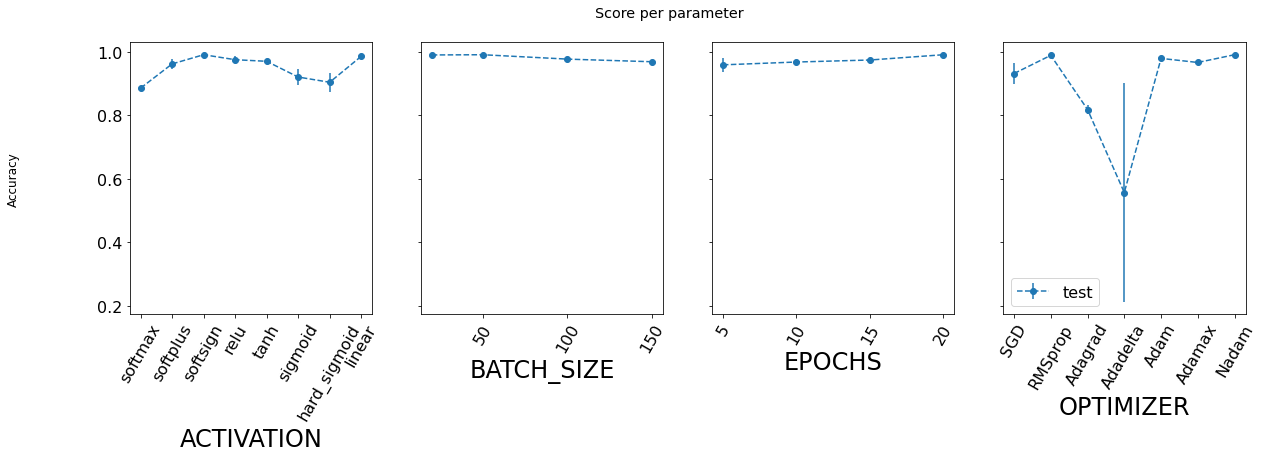

In [12]:
plot_search_results(grid_result)

# Number of Layers and Depth Tuning

In [13]:
import math
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment 
    return layers

In [14]:
def create_model(n_layers, first_layer_nodes, last_layer_nodes):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(L.Dense(first_layer_nodes, input_dim=input_dim, activation='softsign'))
        else:
            model.add(L.Dense(n_nodes[i-1], activation='softsign'))        
    #Finally, the output layer should have a single node in binary classification
    model.add(L.Dense(4, activation='softmax'))
    model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics = ["accuracy"]) #note: metrics could also be 'mse'
    return model

adam_model = KerasClassifier(create_model, epochs=20, batch_size=20,verbose=1)
n_layers=[1,2,3,4]
first_layer_nodes = [4,6,8,10,12,14]
last_layer_nodes = [2,4,6,8]
param_grid = dict(n_layers=n_layers, first_layer_nodes = first_layer_nodes,
                  last_layer_nodes = last_layer_nodes)

grid = GridSearchCV(estimator=adam_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(org_train_x, org_train_y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_15527/2309053266.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model = KerasClassifier(create_model, epochs=20, batch_size=20,verbose=1)
2022-12-04 16:47:38.641297: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 16:47:38.641325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebui

Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7144 - accuracy: 0.8172
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss: 1.0461 - accuracy: 0.4852
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss: 0.8840 - accuracy: 0.8140
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss: 1.0463 - accuracy: 0.6266
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7638 - accuracy: 0.8149
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss: 0.9872 - accuracy: 0.7636
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss: 0.9984 - accuracy: 0.7315
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.8724
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.8140
Epoch 3/20
237/237 [===

237/237 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8925
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9310
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.8870
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.8887
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9268
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.9022
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9695
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9329
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8921
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8984
Ep

237/237 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9458
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9336
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.9365
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9283
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.8883
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.8883
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
237/237 [==============================] - 1s 2ms/step - loss: 1.1320 - accuracy: 0.6115
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss: 1.2835 - accuracy: 0.3823
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss: 1.0034 - accuracy: 0.7897
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss:

237/237 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.9033
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.8864
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8915
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9291
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9260
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8864
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9296
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.9152
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9353
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.8883
Epoch 1

237/237 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9388
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9695
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.9001
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1649 - accuracy: 0.9435
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9738
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9748
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9450
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9695
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9071
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9750
Ep

237/237 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8792
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8921
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.9302
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8917
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.8363
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8830
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.8868
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.8477
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8739
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9126
Epoch 8/20


237/237 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9513
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9581
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9247
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.8872
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9367
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9382
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9367
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9524
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9662
Epoch 17/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1723 - accuracy: 0.9372
Ep

237/237 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8746
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8140
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8826
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8777
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2891 - accuracy: 0.8898
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8597
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.8111
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8887
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.9080
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8553
Epoch 6/20


237/237 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8836
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9336
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9268
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8849
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8853
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8911
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9596
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9314
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9334
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9334
Ep

237/237 [==============================] - 1s 2ms/step - loss: 0.8674 - accuracy: 0.7998
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8765
Epoch 3/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7161 - accuracy: 0.8612
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.9080
Epoch 20/20
237/237 [==============================] - 1s 2ms/step - loss: 0.8055 - accuracy: 0.8146
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.8512
Epoch 3/20
237/237 [==============================] - 1s 2ms/step - loss: 0.8065 - accuracy: 0.8151
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8860
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8794
Epoch 3/20
237/237 [==============================] - 1s 2ms/step - loss: 0.8375 - accuracy: 0.8077
Epoch 2/20

237/237 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9528
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.9314
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9276
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9247
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9185
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9748
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.9285
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9302
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9314
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9520
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.9714
Epoch 20/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1389 - accuracy: 0.9729
Epoch 20/20
119/119 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9666
Epoch 1/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1425 - accuracy: 0.9691
Epoch 18/20
126/237 [==============>...............] - ETA: 0s - loss: 0.1476 - accuracy: 0.9687Epoch 1/20
Epoch 1/20
237/237 [==============================] - 1s 2ms/step - loss: 1.3322 - accuracy: 0.3884
Epoch 2/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.9693
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.8151
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9689
Epoch 20/20
237/237 [==============================] - 1s 2ms/step - loss: 1.0474 - accuracy: 0.7078


237/237 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9327
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.9065
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9427
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9228
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9314
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9310
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9496
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.9056
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9327
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9111
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9700
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9846
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9287
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9744
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9706
Epoch 19/20
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9471
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9706
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9348
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9797
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1300 - accurac

237/237 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9714
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9221
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.8887
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8659
Epoch 3/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.9412
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9315
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9266
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.9289
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9719
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.8980
Epoch 9

237/237 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9664
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9416
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.9613
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9869
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9255
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9742
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9566
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9416
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9856
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9315
Ep

237/237 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.9638
Epoch 9/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.9276
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.8887
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9549
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8864
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9367
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9344
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9731
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8887
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9515
Epoch 9/20

237/237 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9729
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.9738
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.9304
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8820
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9552
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9886
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9628
Epoch 9/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.9731
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9738
Epo

237/237 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8644
Epoch 4/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7778 - accuracy: 0.7904
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9750
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9310
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8929
Epoch 6/20
237/237 [==============================] - 1s 2ms/step - loss: 0.6786 - accuracy: 0.7776
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8828
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.8443
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9499
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9752
Epoch 20/

237/237 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9458
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9733
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9291
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9452
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9397
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9750
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.8923
Epoch 7/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9461
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9744
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9298
Epoc

237/237 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.9169
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9477
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9858
Epoch 6/20
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8989
Epoch 5/20
237/237 [==============================] - 1s 2ms/step - loss: 1.1601 - accuracy: 0.4985
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9287
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9841
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.9082
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.8301
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.92

237/237 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8691
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9716
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.9291
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9704
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1503 - accuracy: 0.9541
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8864
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9748
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8849
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9249
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9714
Epoch

237/237 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.9475
Epoch 13/20
237/237 [==============================] - 1s 2ms/step - loss: 0.5114 - accuracy: 0.8748
Epoch 2/20
237/237 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8502
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9710
Epoch 19/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9848
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9380
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8754
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9632
Epoch 14/20
237/237 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8830
Epoch 5/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9784
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8934
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.9268
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.9041
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9750
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9708
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8498
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9245
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9767
Epoch 16/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9721
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9291
Epoch 

Epoch 12/20
237/237 [==============================] - 1s 2ms/step - loss: 1.0994 - accuracy: 0.5662
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9695
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1318 - accuracy: 0.9719
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9727
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.8157
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8781
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9731
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9700
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9731
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 

237/237 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9839
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.9750
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9636
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9433
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9499
Epoch 13/20
237/237 [==============================] - 1s 2ms/step - loss: 0.8172 - accuracy: 0.5959
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9750
Epoch 14/20
237/237 [==============================] - 1s 2ms/step - loss: 0.8313 - accuracy: 0.6921
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9681
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9448
Epoch 

237/237 [==============================] - 1s 2ms/step - loss: 0.1482 - accuracy: 0.9477
Epoch 10/20
237/237 [==============================] - 1s 2ms/step - loss: 0.2169 - accuracy: 0.9456
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9714
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9306
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9736
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9501
Epoch 11/20
237/237 [==============================] - 1s 2ms/step - loss: 0.5853 - accuracy: 0.8288
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9774
Epoch 19/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7885 - accuracy: 0.7842
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9731
Epoch

237/237 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9467
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9691
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9805
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9750
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.9160
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9805
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9697
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.9700
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9748
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9348
Epo

237/237 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9882
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9700
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.9439
Epoch 6/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9700
Epoch 17/20
237/237 [==============================] - 1s 2ms/step - loss: 0.2173 - accuracy: 0.9334
Epoch 9/20
237/237 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.8166
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9719
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9598
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9329
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9702
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.8445
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9731
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9750
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8930
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9746
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9697
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9778
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9750
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9232
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9744
Epoch 1

237/237 [==============================] - 1s 2ms/step - loss: 1.1308 - accuracy: 0.6457
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9600
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.9490
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9712
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9372
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1066 - accuracy: 0.9708
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1318 - accuracy: 0.9740
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.9480
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9524
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9714
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8373
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9748
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9738
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9746
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9433
Epoch 6/20
Epoch 1/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9717
Epoch 5/20
237/237 [==============================] - 1s 2ms/step - loss: 0.2915 - accuracy: 0.8978
Epoch 4/20
237/237 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9727
Epoch 19/20
237/237 [==============================] - 1s 2ms/step - loss: 0.2059 - accuracy: 0.9454
Epoch 13/20
Epoch 7/20
237/237 [==============================] - 1s 2ms/step - loss: 0.0816 - a

237/237 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9875
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9700
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9607
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9750
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9748
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9738
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9710
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9674
Epoch 7/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7908 - accuracy: 0.6562
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9750
Epoch

237/237 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9395
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9873
Epoch 19/20
237/237 [==============================] - 1s 3ms/step - loss: 0.2942 - accuracy: 0.8967
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8295
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9803
Epoch 16/20
237/237 [==============================] - 1s 2ms/step - loss: 0.1833 - accuracy: 0.9469
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9399
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9888
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9630
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9287
Epoch 

237/237 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9562
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9708
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.9778
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1213 - accuracy: 0.9727
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9812
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8887
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9587
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9642
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.9418
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9837
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9150
Epoch 9/20
237/237 [==============================] - 1s 2ms/step - loss: 0.6054 - accuracy: 0.8075
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9374
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9264
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9882
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9892
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8872
Epoch 3/20
237/237 [==============================] - 1s 2ms/step - loss: 0.1957 - accuracy: 0.9219
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.9378
Epoch 8/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2275 - accuracy: 0.9334
Epoch 7/

237/237 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9670
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.9086
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9626
Epoch 19/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9700
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9323
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9355
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9736
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9706
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9609
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9700
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9738
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9725
Epoch 6/20
237/237 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8551
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9882
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9697
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9731
Epoch 5/20
237/237 [==============================] - 1s 2ms/step - loss: 0.8583 - accuracy: 0.6784
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9725
Epoch 15/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.9012
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9752
Epoch 7

237/237 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9750
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9719
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.9329
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9841
Epoch 20/20
237/237 [==============================] - 1s 1ms/step - loss: 0.8972 - accuracy: 0.6499
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9748
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9721
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.9750
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9721
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9367
Epoch 

Epoch 3/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9727
Epoch 19/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1794 - accuracy: 0.9452
Epoch 8/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.9551
Epoch 17/20
237/237 [==============================] - 1s 2ms/step - loss: 0.6509 - accuracy: 0.8358
Epoch 2/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0835 - accuracy: 0.9750
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.8771
Epoch 4/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9727
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9505
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.9228
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9

237/237 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9441
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9738
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9757
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9435
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9723
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9640
Epoch 8/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1492 - accuracy: 0.9554
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9752
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9786
Epoch 13/20
237/237 [==============================] - 1s 2ms/step - loss: 0.6251 - accuracy: 0.8292
Epoch 2/

237/237 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9733
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9894
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9702
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9706
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9700
Epoch 18/20
237/237 [==============================] - 1s 2ms/step - loss: 0.8453 - accuracy: 0.7586
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9537
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9729
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9712
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9905
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9695
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9884
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9736
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.8887
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9573
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.9154
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9289
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9697
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9733
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9854
Epoch 1

237/237 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9744
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.9750
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8559
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9708
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9738
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9860
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9750
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9744
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.9414
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9706
Epoch

237/237 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.9664
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9697
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9788
Epoch 18/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7740 - accuracy: 0.7165
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.9183
Epoch 3/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1671 - accuracy: 0.9596
Epoch 7/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9719
Epoch 9/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9816
Epoch 19/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9716
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.9304
Epoch 3

237/237 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.9723
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9507
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9903
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0775 - accuracy: 0.9784
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9706
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9738
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9721
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9697
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0663 - accuracy: 0.9733
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9850
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9700
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9748
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9852
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9721
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9706
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9733
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9700
Epoch 12/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9723
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9702
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9746
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9833
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9867
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9721
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9382
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9746
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9843
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9634
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9846
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9862
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9611
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9750
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.9750
Epoch 18/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9903
Epoch 20/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9746
Epoch 10/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1994 - accuracy: 0.9374
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9744
Epoch 15/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9750
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9843
Epoch 18/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.9748
Epoch 19/20
237/237 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9750
Epo

237/237 [==============================] - 1s 2ms/step - loss: 0.5714 - accuracy: 0.8331
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9710
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9154
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9649
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9681
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9733
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8991
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9395
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.9738
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9827
Epoch 17/2

237/237 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9748
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9653
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9744
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9748
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9784
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9852
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9757
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.9217
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9702
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9752
Epoch

237/237 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9733
Epoch 13/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9484
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9750
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8492
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.9027
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9733
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9759
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9704
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.9632
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9509
Epoch 5

237/237 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 0.9772
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9782
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9268
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1170 - accuracy: 0.9714
Epoch 12/20
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9759
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9723
Epoch 8/20
237/237 [==============================] - 1s 2ms/step - loss: 1.0867 - accuracy: 0.5463
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9776
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9807
Epoch 14/20
159/237 [===================>..........] - ETA: 0s - loss: 0.3296 - accuracy: 0.895

237/237 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.9702
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9827
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9882
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9255
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.9702
Epoch 12/20
237/237 [==============================] - 1s 2ms/step - loss: 0.6635 - accuracy: 0.7546
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9750
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9901
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9501
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9700
Epoch

237/237 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9723
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9706
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9744
Epoch 9/20
237/237 [==============================] - 1s 2ms/step - loss: 0.6117 - accuracy: 0.8386
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9729
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9721
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9750
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9700
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9772
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.9205
Epoch 3

237/237 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9871
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9896
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9877
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9717
Epoch 9/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7609 - accuracy: 0.7467
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9879
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9750
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9886
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9892
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9805
Epoc

237/237 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9733
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.9752
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9905
Epoch 19/20
237/237 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.9243
Epoch 4/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7709 - accuracy: 0.7552
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9727
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9708
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9725
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9750
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9399
Epoch 5

237/237 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9750
Epoch 6/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9765
Epoch 9/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9884
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.9738
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9892
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9795
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9799
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9854
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9750
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9884
Epoch

237/237 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9890
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9860
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9909
Epoch 16/20
237/237 [==============================] - 1s 2ms/step - loss: 0.7198 - accuracy: 0.7715
Epoch 2/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.9738
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9700
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9505
Epoch 5/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9837
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9903
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8851
Epoch 

237/237 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9721
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9917
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9717
Epoch 10/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9700
Epoch 7/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9850
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8792
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9733
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9712
Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9702
Epoch 18/20
Epoch 8/20
237/237 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 

237/237 [==============================] - 0s 1ms/step - loss: 0.0452 - accuracy: 0.9867
Epoch 18/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9750
Epoch 14/20
Epoch 9/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9873
Epoch 19/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9723
Epoch 7/20
237/237 [==============================] - 0s 996us/step - loss: 0.0707 - accuracy: 0.9799
Epoch 15/20
Epoch 10/20
237/237 [==============================] - 0s 884us/step - loss: 0.0430 - accuracy: 0.9869
Epoch 20/20
237/237 [==============================] - 0s 956us/step - loss: 0.0715 - accuracy: 0.9795
Epoch 8/20
237/237 [==============================] - 0s 967us/step - loss: 0.0702 - accuracy: 0.9719
Epoch 16/20
237/237 [==============================] - 0s 973us/step - loss: 0.0586 - accuracy: 0.9841
Epoch 11/20
237/237 [==============================] - 0s 950us/step - l

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
72 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/Users/jaminurislam/opt/anaconda3/envs/detection/lib/pyt

355/355 [==============================] - 1s 637us/step - loss: 0.5899 - accuracy: 0.8141
Epoch 2/20
355/355 [==============================] - 0s 599us/step - loss: 0.2706 - accuracy: 0.9250
Epoch 3/20
355/355 [==============================] - 0s 602us/step - loss: 0.1918 - accuracy: 0.9653
Epoch 4/20
355/355 [==============================] - 0s 598us/step - loss: 0.1396 - accuracy: 0.9702
Epoch 5/20
355/355 [==============================] - 0s 619us/step - loss: 0.1070 - accuracy: 0.9704
Epoch 6/20
355/355 [==============================] - 0s 606us/step - loss: 0.0885 - accuracy: 0.9729
Epoch 7/20
355/355 [==============================] - 0s 592us/step - loss: 0.0785 - accuracy: 0.9738
Epoch 8/20
355/355 [==============================] - 0s 599us/step - loss: 0.0712 - accuracy: 0.9733
Epoch 9/20
355/355 [==============================] - 0s 597us/step - loss: 0.0669 - accuracy: 0.9725
Epoch 10/20
355/355 [==============================] - 0s 597us/step - loss: 0.0612 - accurac

In [15]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.990127 using {'first_layer_nodes': 14, 'last_layer_nodes': 4, 'n_layers': 3}
nan (nan) with: {'first_layer_nodes': 4, 'last_layer_nodes': 2, 'n_layers': 1}
0.940619 (0.033070) with: {'first_layer_nodes': 4, 'last_layer_nodes': 2, 'n_layers': 2}
0.939070 (0.005892) with: {'first_layer_nodes': 4, 'last_layer_nodes': 2, 'n_layers': 3}
0.927645 (0.038528) with: {'first_layer_nodes': 4, 'last_layer_nodes': 2, 'n_layers': 4}
nan (nan) with: {'first_layer_nodes': 4, 'last_layer_nodes': 4, 'n_layers': 1}
0.954301 (0.010201) with: {'first_layer_nodes': 4, 'last_layer_nodes': 4, 'n_layers': 2}
0.969958 (0.003500) with: {'first_layer_nodes': 4, 'last_layer_nodes': 4, 'n_layers': 3}
0.952467 (0.012294) with: {'first_layer_nodes': 4, 'last_layer_nodes': 4, 'n_layers': 4}
nan (nan) with: {'first_layer_nodes': 4, 'last_layer_nodes': 6, 'n_layers': 1}
0.947957 (0.018498) with: {'first_layer_nodes': 4, 'last_layer_nodes': 6, 'n_layers': 2}
0.922989 (0.012372) with: {'first_layer_nodes': 4, 'las

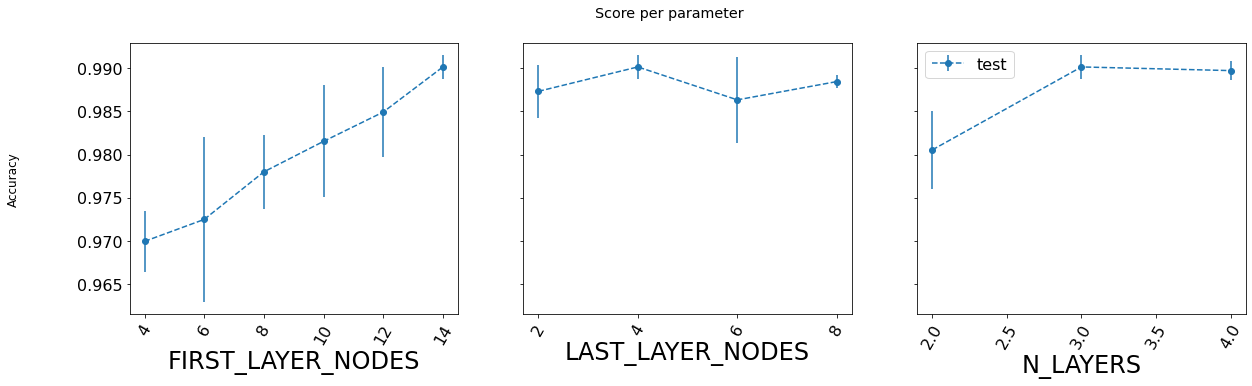

In [17]:
plot_search_results(grid_result)